#### 1. Bibliotheken und Dataset einlesen

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express import line

In [29]:
df = pd.read_csv('compact_official_countries_only.csv')
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Kazakhstan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20034612.0,7.421052,29.348,69.3622,26093.2950,0.017695,6.6,99.009834,6.06,0.802
2,Finland,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5569299.0,18.323215,42.526,82.0381,49275.1520,0.021343,6.1,NaN,3.61,0.942
3,Andorra,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79722.0,169.621280,42.832,80.3684,NaN,NaN,9.7,NaN,NaN,0.884
4,France,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66277412.0,121.042030,41.567,82.4988,45904.4100,0.056357,5.3,NaN,5.91,0.910


#### 2. Überblick der Daten

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343740 entries, 0 to 343739
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     343740 non-null  object 
 1   date                                        343740 non-null  object 
 2   total_cases                                 341052 non-null  float64
 3   new_cases                                   339074 non-null  float64
 4   new_cases_smoothed                          338124 non-null  float64
 5   total_cases_per_million                     341052 non-null  float64
 6   new_cases_per_million                       339074 non-null  float64
 7   new_cases_smoothed_per_million              338124 non-null  float64
 8   total_deaths                                341052 non-null  float64
 9   new_deaths                                  339606 non-null  float64
 

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,3.410520e+05,3.390740e+05,3.381240e+05,341052.000000,339074.000000,338124.000000,3.410520e+05,339606.000000,338649.000000,341052.000000,...,3.437400e+05,341975.000000,343740.000000,341982.000000,322961.000000,278515.000000,338824.000000,190398.000000,263071.000000,335301.000000
mean,2.278275e+06,2.279716e+03,2.285989e+03,100936.869811,100.054825,100.325705,2.515977e+04,20.782801,20.839904,864.723607,...,4.087451e+07,309.019996,29.908731,71.336003,21503.198447,11.177760,8.730653,58.204562,3.174695,0.723788
std,8.812926e+06,9.208459e+04,3.478921e+04,155305.182613,1175.553432,435.133481,9.167542e+04,337.639217,126.330022,1204.023570,...,1.490936e+08,1459.606872,9.609445,7.663630,22194.415153,18.523547,4.998819,31.939340,2.592208,0.154479
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,5.130000e+02,2.173997,14.298000,52.525400,708.178300,0.000000,1.100000,3.440189,0.300000,0.380000
25%,1.001375e+04,0.000000e+00,0.000000e+00,1746.768800,0.000000,0.000000,1.200000e+02,0.000000,0.000000,26.891360,...,1.840236e+06,36.265860,20.965000,65.673400,4963.160000,0.242221,5.600000,25.097641,1.320000,0.602000
50%,1.009730e+05,0.000000e+00,1.414286e+01,24296.453000,0.000000,2.203174,1.405000e+03,0.000000,0.000000,234.744900,...,9.089742e+06,89.133330,29.086000,71.798000,13531.396000,1.318269,7.100000,69.543660,2.570000,0.741000
75%,9.313098e+05,0.000000e+00,2.977143e+02,128012.020000,0.000000,42.622098,1.059500e+04,0.000000,3.000000,1322.372000,...,3.043726e+07,218.659930,37.997000,76.936000,33176.184000,15.723551,10.700000,87.229550,4.200000,0.847000
max,1.034368e+08,4.047548e+07,5.782211e+06,767015.700000,226617.450000,32373.922000,1.206141e+06,47687.000000,6812.428700,6601.109400,...,1.425423e+09,18689.541000,59.875000,85.946300,117746.990000,80.730060,30.800000,100.000000,13.800000,0.967000


In [6]:
df.shape

(343740, 61)

#### 3. Datenbereinigung

**3.1 Überprüfung auf fehlende Werte und Duplikate**

In [7]:
df.isna().sum()

country                            0
date                               0
total_cases                     2688
new_cases                       4666
new_cases_smoothed              5616
                               ...  
extreme_poverty                65225
diabetes_prevalence             4916
handwashing_facilities        153342
hospital_beds_per_thousand     80669
human_development_index         8439
Length: 61, dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

**3.2 Verteilung der Daten in Country**

In [30]:
# Verteilung der Länder in der Spalte 'country'
country_distribution = df['country'].value_counts()

# Anzeigen der Verteilung
print(country_distribution)

country
Spain                   1771
Bulgaria                1771
Hungary                 1771
United Kingdom          1771
Iceland                 1771
                        ... 
Micronesia (country)    1758
Tuvalu                  1758
Vatican                 1758
Comoros                 1758
Taiwan                  1393
Name: count, Length: 195, dtype: int64


**3.3 Dataset df gruppieren nach Country (df_grouped)**

In [10]:
df.dtypes

country                        object
date                           object
total_cases                   float64
new_cases                     float64
new_cases_smoothed            float64
                               ...   
extreme_poverty               float64
diabetes_prevalence           float64
handwashing_facilities        float64
hospital_beds_per_thousand    float64
human_development_index       float64
Length: 61, dtype: object

**Datum konvertieren und Plotten**

In [31]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Plot time series data
#plt.figure(figsize=(20, 8))
#plt.plot(df['date'], df['total_cases'], label='Total Cases')
#plt.plot(df['date'], df['total_deaths'], label='Total Deaths')
#plt.title('Total Cases and Total Deaths Over Time')
#plt.xlabel('Date')
#plt.ylabel('Count')
#plt.legend()
#plt.show()

In [32]:
#df_grouped = df.groupby('country', as_index=False).mean()
df_grouped = df.groupby('country', as_index=False).mean(numeric_only=True)# muss hier genutzt werden, da nur numerische Spalten gruppiert werden können
df_grouped

,country,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,1.511644e+05,133.796359,134.177980,3725.201212,3.297195,3.306599,5776.097270,4.549488,4.562464,...,40578846.0,62.215546,16.752,61.9824,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Albania,2.184107e+05,191.806030,192.351644,77242.005936,67.833149,68.026108,2629.811718,2.052332,2.058186,...,2827615.0,103.197624,35.943,76.4626,15492.0670,0.021277,10.2,NaN,2.89,0.789
2,Algeria,1.958427e+05,154.819681,155.261266,4306.374369,3.404322,3.414032,5112.213879,3.914107,3.925271,...,45477391.0,19.094180,27.983,76.3767,11198.2330,0.000000,7.1,84.804100,1.90,0.745
3,Andorra,3.018783e+04,27.312287,27.390188,378663.707233,342.594100,343.571264,125.815700,0.090444,0.090702,...,79722.0,169.621280,42.832,80.3684,NaN,NaN,9.7,NaN,NaN,0.884
4,Angola,7.023313e+04,61.138794,61.313177,1970.901464,1.715694,1.720587,1355.060296,1.101820,1.104963,...,35635028.0,28.583483,16.390,61.6434,5906.1157,31.122005,4.6,27.094194,NaN,0.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,3.805501e+05,314.388510,315.285223,13488.459430,11.143385,11.175169,4097.769625,3.331058,3.340559,...,28213016.0,31.985733,28.810,70.5536,NaN,NaN,9.6,NaN,0.87,0.699
191,Vietnam,6.385231e+06,6612.059158,6630.918347,64056.869144,66.332420,66.521616,26685.677474,24.576792,24.646891,...,99680656.0,318.032650,31.938,73.6181,11396.5310,0.963795,6.1,88.711780,2.60,0.726
192,Yemen,8.519149e+03,6.794653,6.814033,222.880878,0.177764,0.178271,1591.546075,1.228100,1.231603,...,38222880.0,72.395935,18.118,63.7534,NaN,19.802757,5.4,48.612970,0.71,0.424
193,Zambia,2.292499e+05,199.028441,199.596121,11375.507409,9.875904,9.904073,2871.901593,2.319681,2.326298,...,20152934.0,27.109505,17.288,61.2234,3365.8738,64.349754,11.9,18.154615,NaN,0.569


**Länder mit keinem Inhalt rauslöschen**

In [33]:
df_grouped2 = df_grouped[df_grouped['country'].str.contains('North Korea|Taiwan|Turkmenistan') == False]
df_grouped2.shape

(192, 58)

#### 4. neue Spalten erstellen

In [35]:
# Inzidenzrate pro 100.000 Einwohner
df_grouped2['inzidenzrate_pro_100000'] = (df_grouped2['total_cases'] / df_grouped2['population']) * 100000

# Todesrate (Case Fatality Rate)
df_grouped2['todesrate'] = (df_grouped2['total_deaths'] / df_grouped2['total_cases']) * 100

# Wachstumsrate der Fälle (im Vergleich zum Vortag)
df_grouped2['wachstumsrate'] = df_grouped2['new_cases'].pct_change() * 100

# Anteil der Geimpften
df_grouped2['anteil_geimpfter'] = (df_grouped2['total_vaccinations'] / df_grouped2['population']) * 100

# Anzahl der aktiven Fälle
if 'total_recoveries' in df_grouped2.columns:
    df_grouped2['aktive_faelle'] = df_grouped2['total_cases'] - (df_grouped2['total_deaths'] + df_grouped2['total_recoveries'])
else:
    # Wenn keine Genesungsdaten vorhanden sind = aktiven Fälle weglassen
    df_grouped2['aktive_faelle'] = np.nan

df_grouped2.head()

/var/folders/1k/gzrlf3f10w9fdlpn36dljwfc0000gn/T/ipykernel_24356/402525308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped2['inzidenzrate_pro_100000'] = (df_grouped2['total_cases'] / df_grouped2['population']) * 100000
/var/folders/1k/gzrlf3f10w9fdlpn36dljwfc0000gn/T/ipykernel_24356/402525308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped2['todesrate'] = (df_grouped2['total_deaths'] / df_grouped2['total_cases']) * 100
/var/folders/1k/gzrlf3f10w9fdlpn36dljwfc0000gn/T/ipykernel_

,country,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index,inzidenzrate_pro_100000,todesrate,wachstumsrate,anteil_geimpfter,aktive_faelle
0,Afghanistan,151164.366894,133.796359,134.177980,3725.201212,3.297195,3.306599,5776.097270,4.549488,4.562464,...,NaN,10.9,48.214695,0.39,0.462,372.520123,3.821071,NaN,27.452268,NaN
1,Albania,218410.654152,191.806030,192.351644,77242.005936,67.833149,68.026108,2629.811718,2.052332,2.058186,...,0.021277,10.2,NaN,2.89,0.789,7724.200577,1.204068,43.356688,49.582459,NaN
2,Algeria,195842.670648,154.819681,155.261266,4306.374369,3.404322,3.414032,5112.213879,3.914107,3.925271,...,0.000000,7.1,84.804100,1.90,0.745,430.637436,2.610368,-19.283204,23.433721,NaN
3,Andorra,30187.827645,27.312287,27.390188,378663.707233,342.594100,343.571264,125.815700,0.090444,0.090702,...,NaN,9.7,NaN,NaN,0.884,37866.370193,0.416776,-82.358647,114.582941,NaN
4,Angola,70233.128555,61.138794,61.313177,1970.901464,1.715694,1.720587,1355.060296,1.101820,1.104963,...,31.122005,4.6,27.094194,NaN,0.591,197.090146,1.929375,123.850880,37.060611,NaN


##### 5. Boxplots plotten um Outliners zu sehen

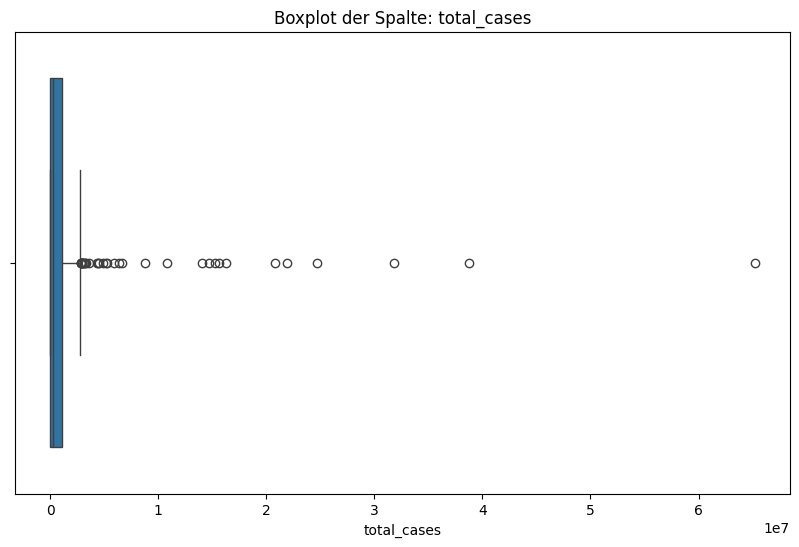

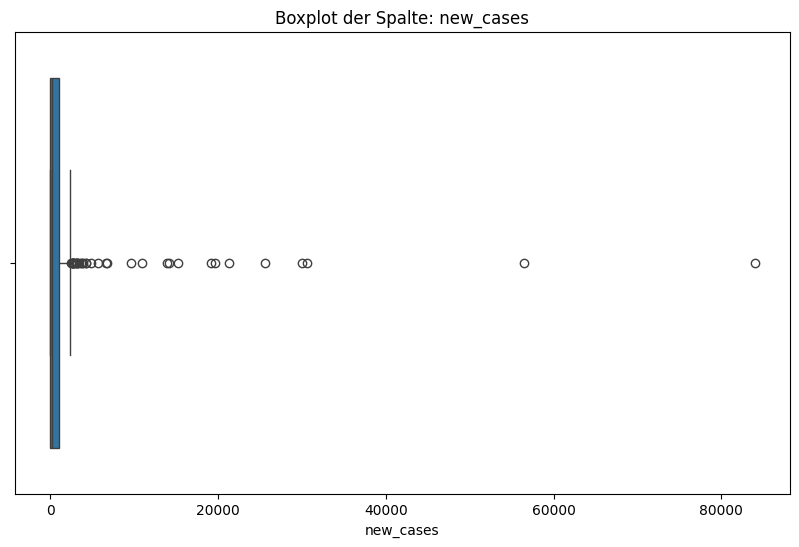

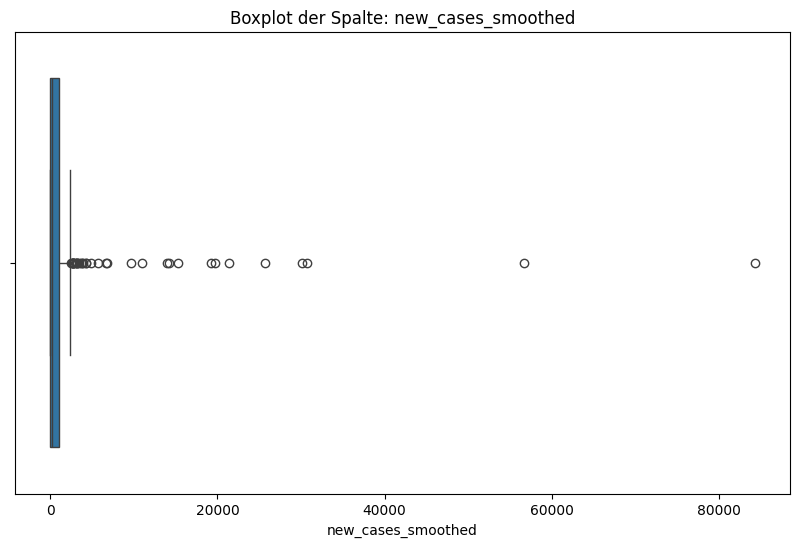

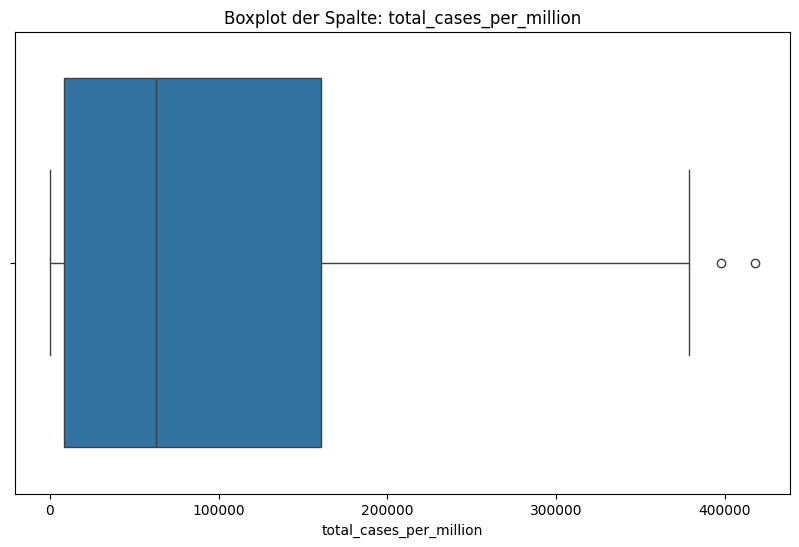

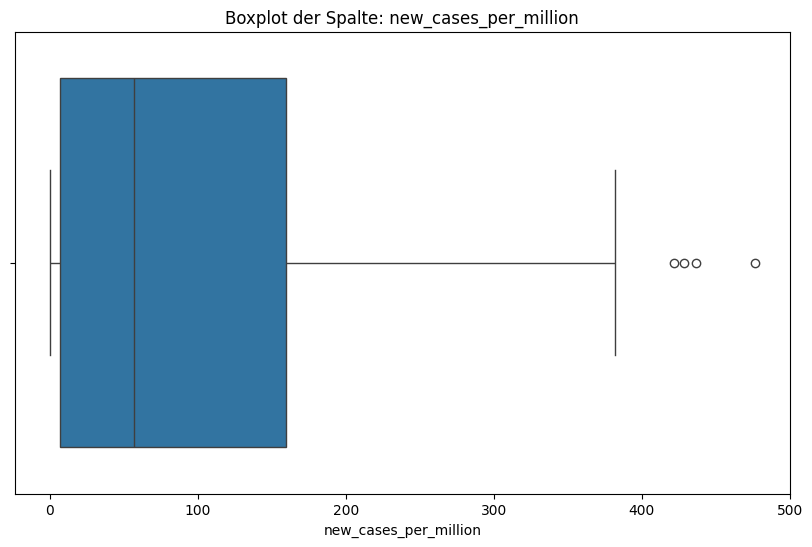

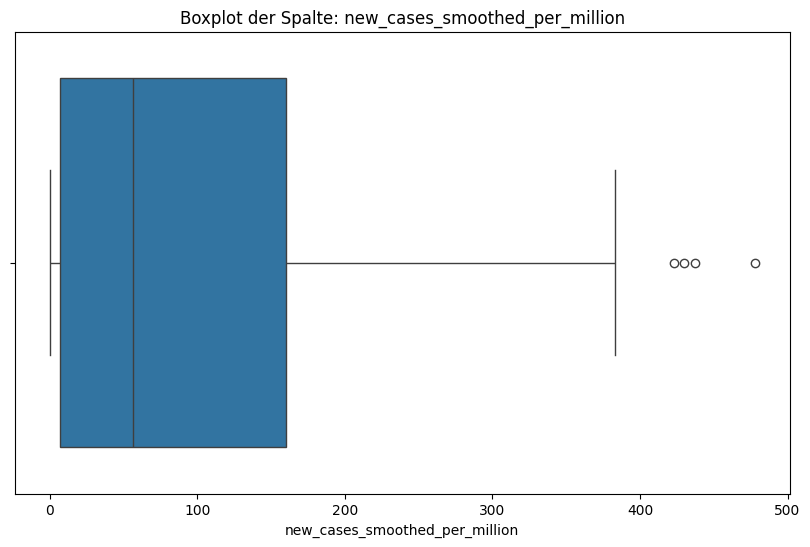

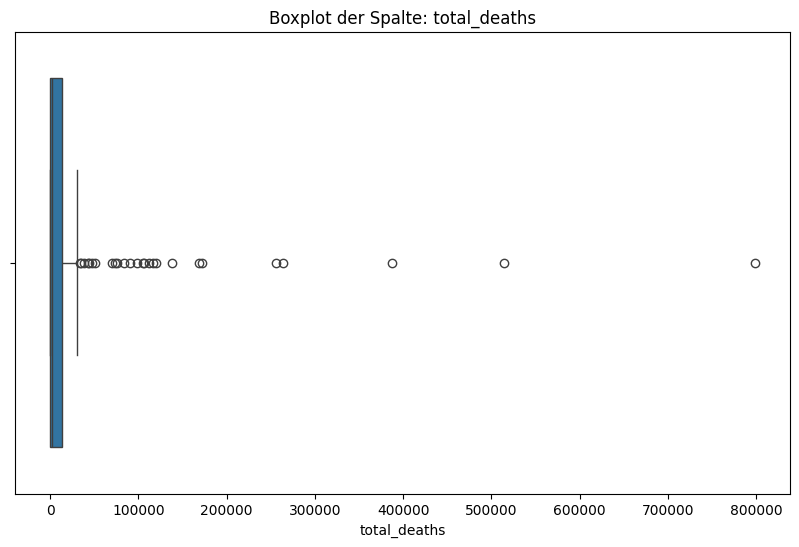

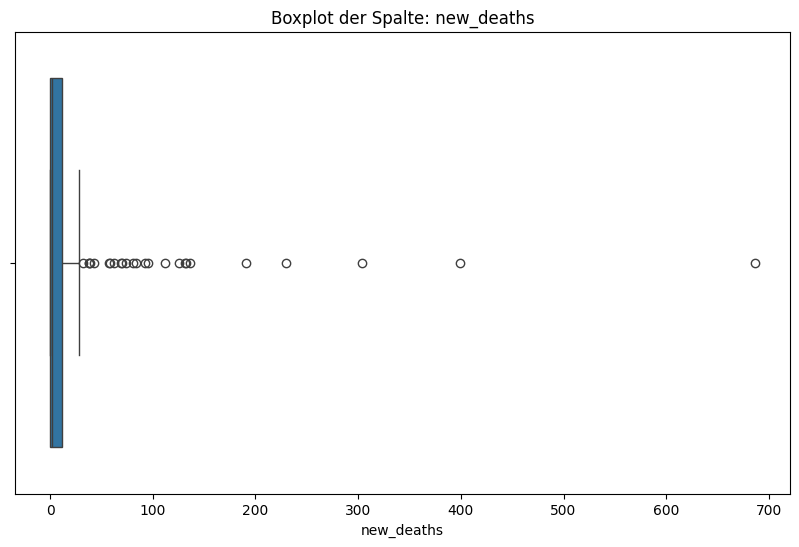

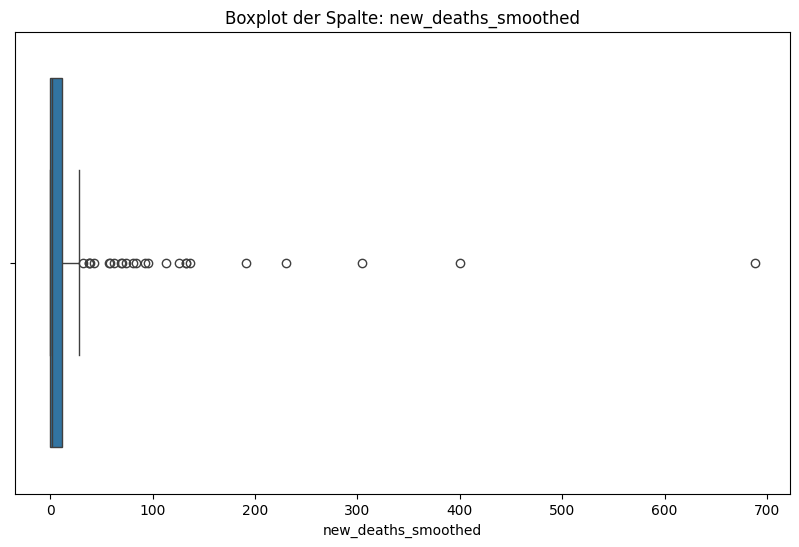

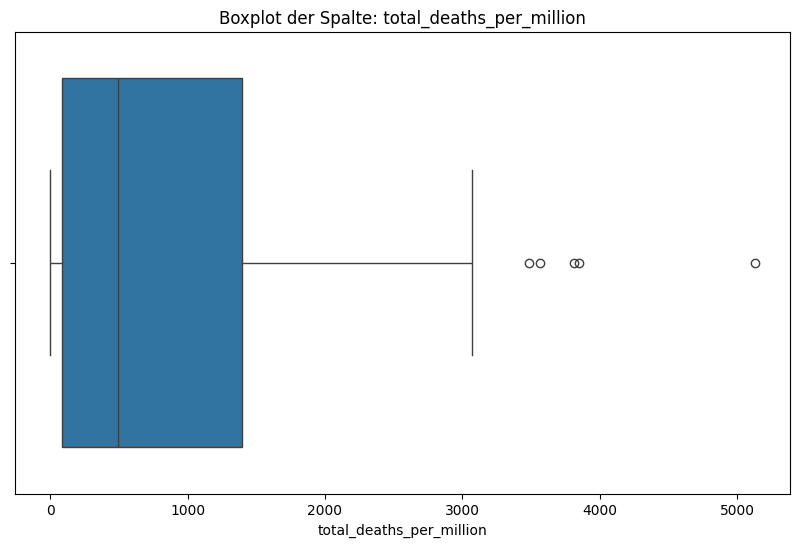

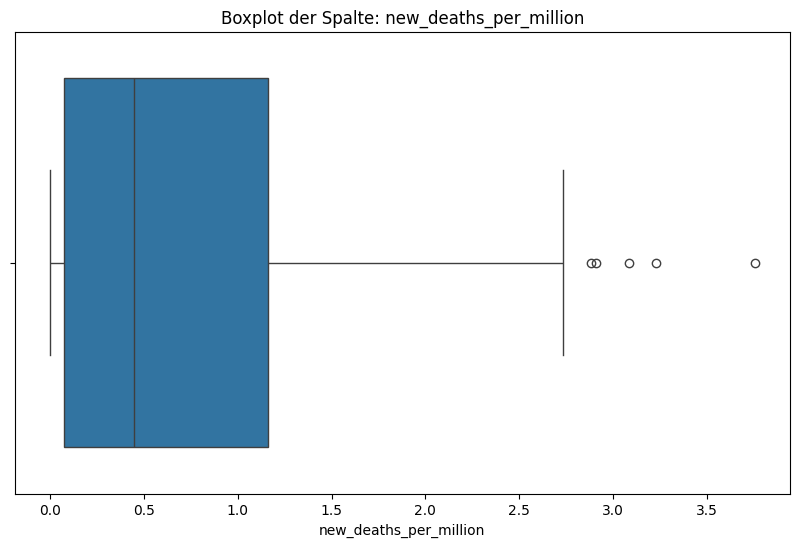

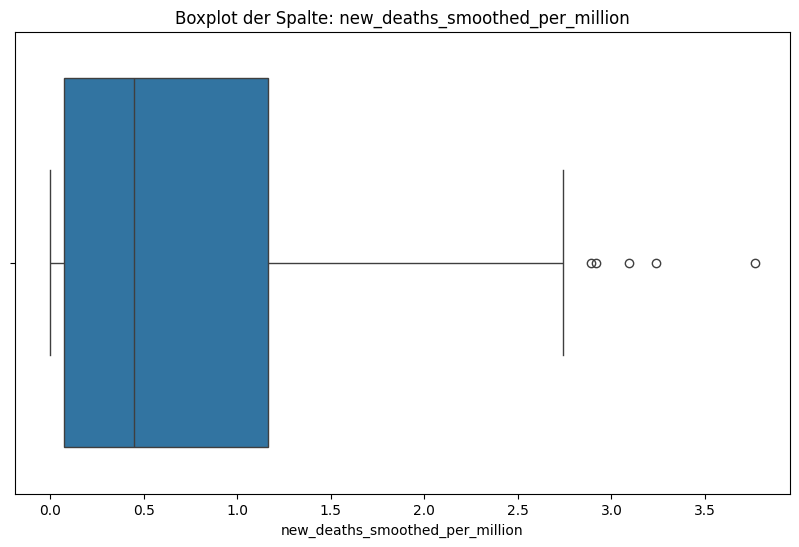

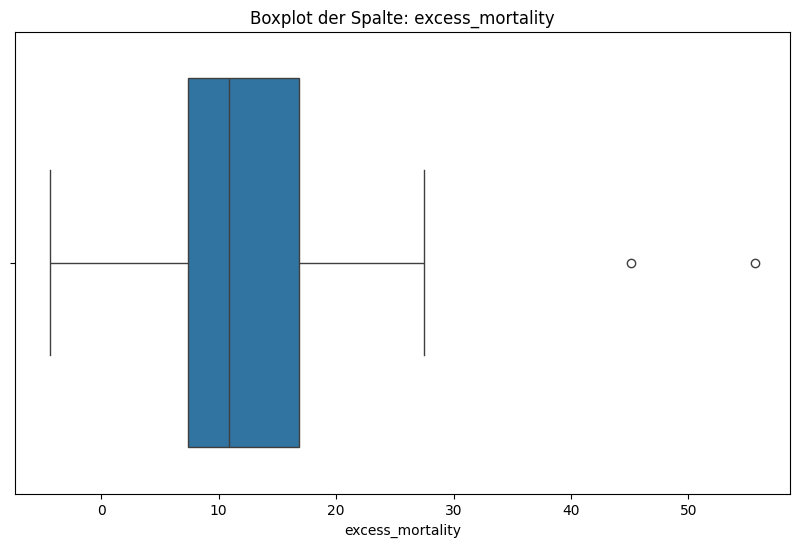

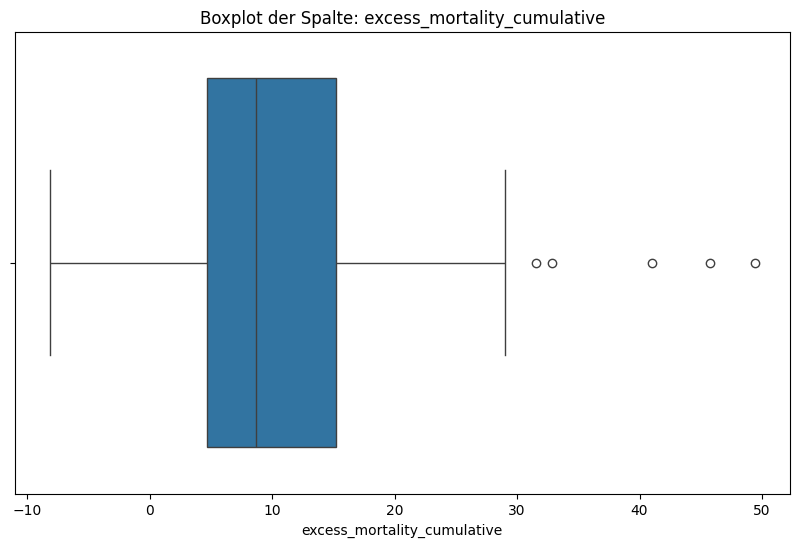

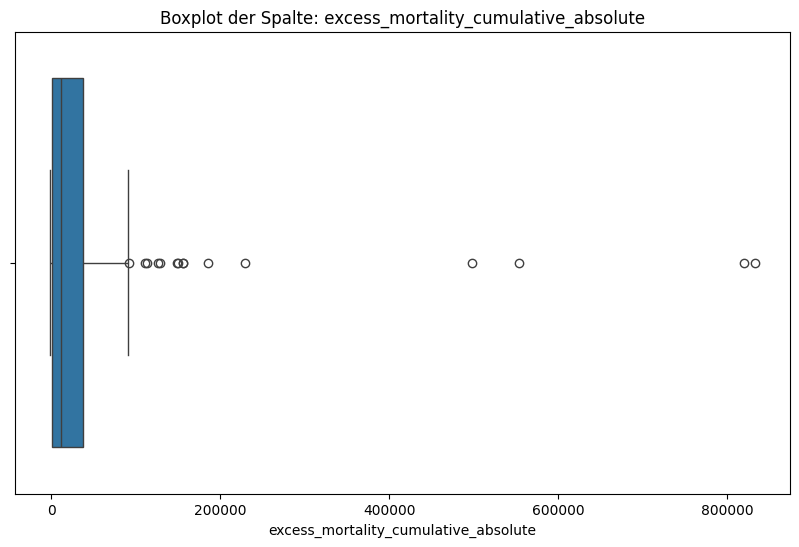

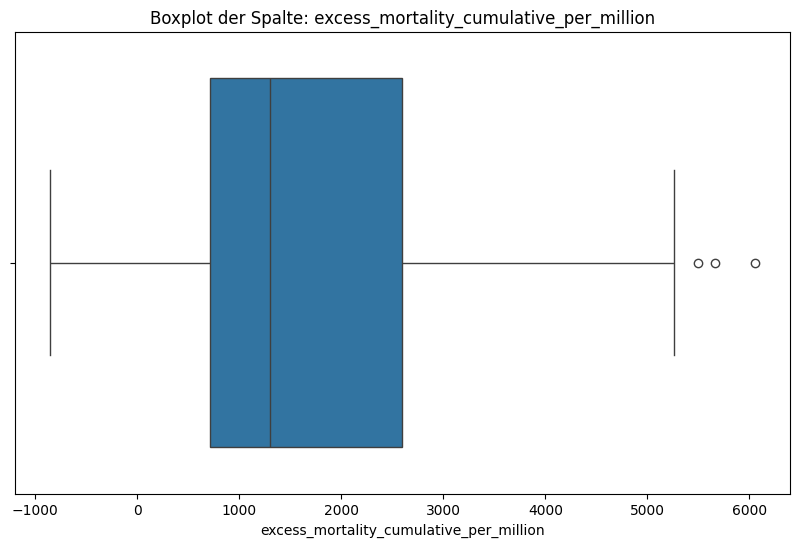

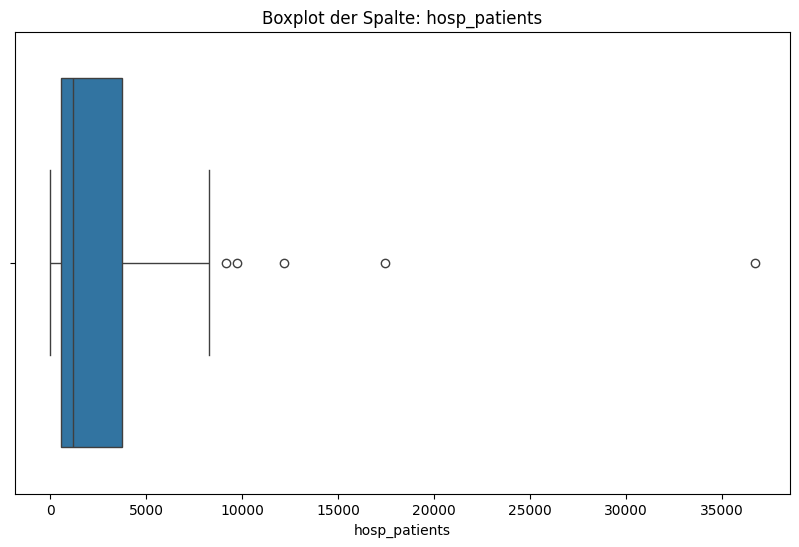

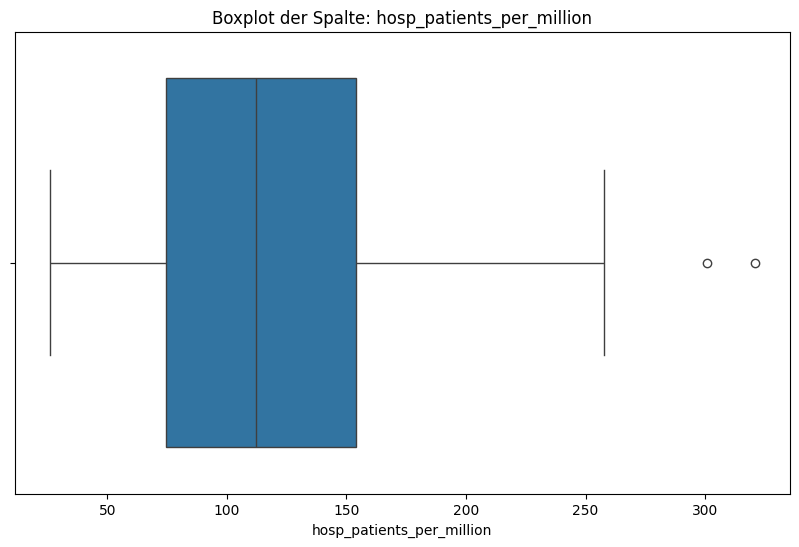

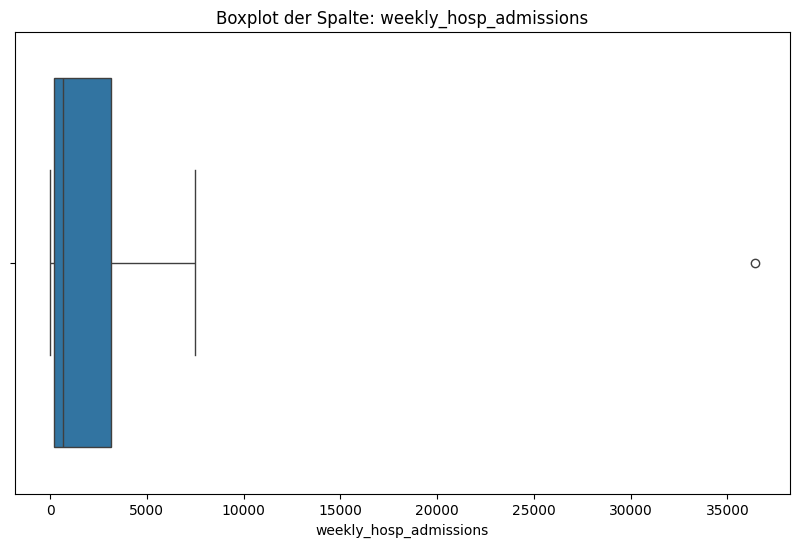

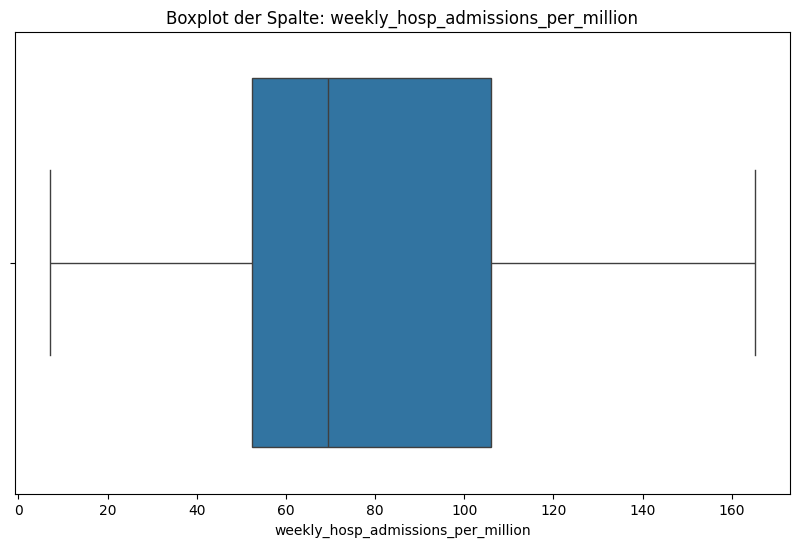

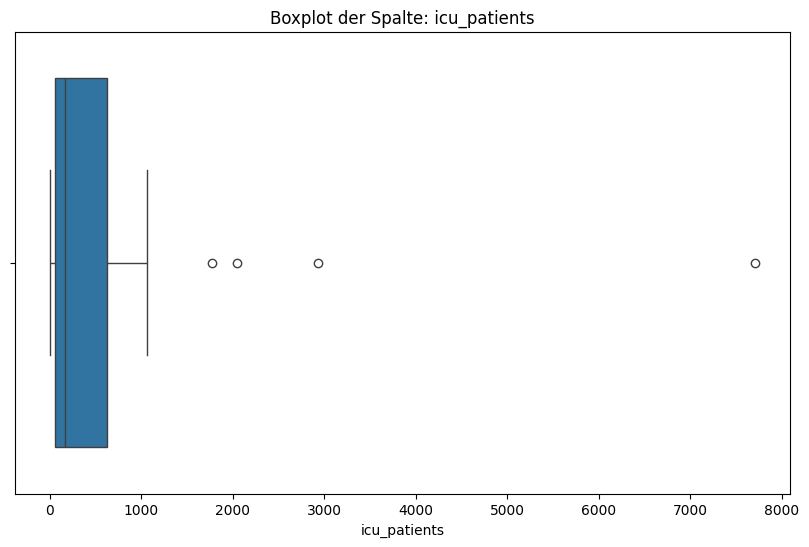

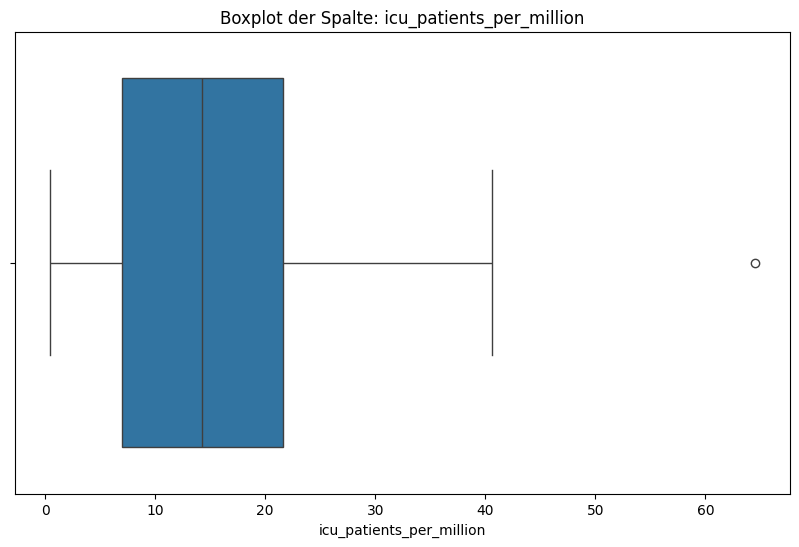

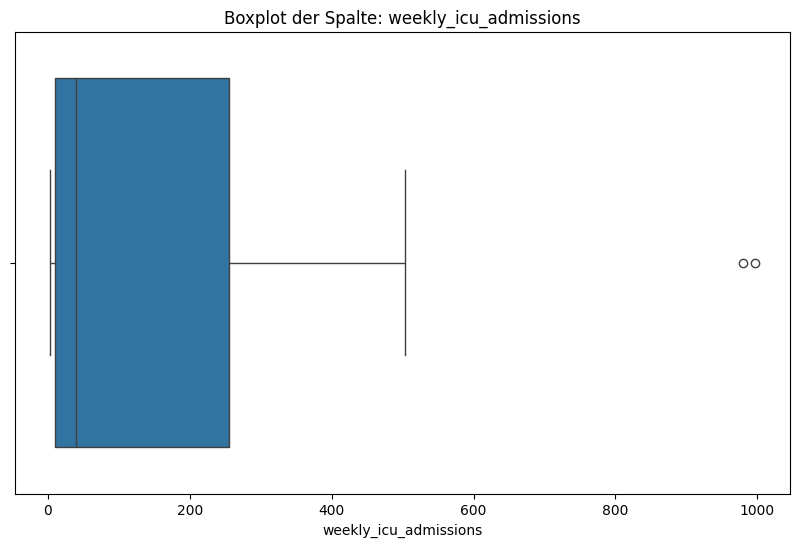

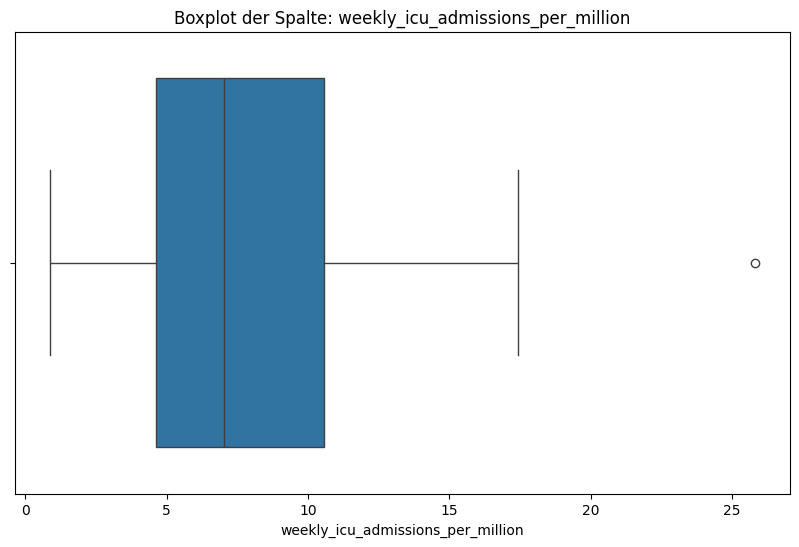

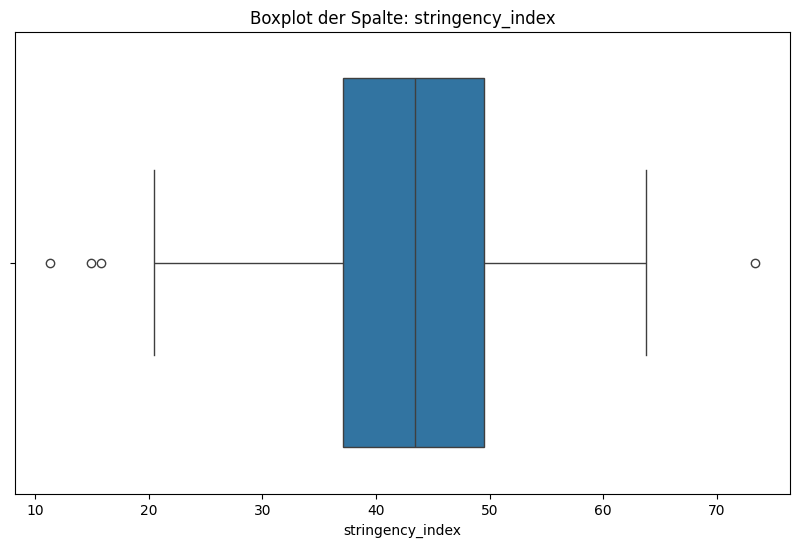

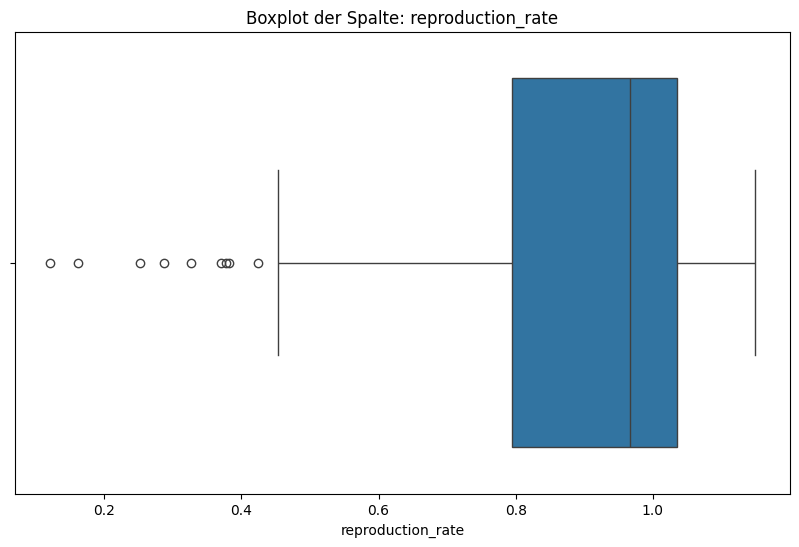

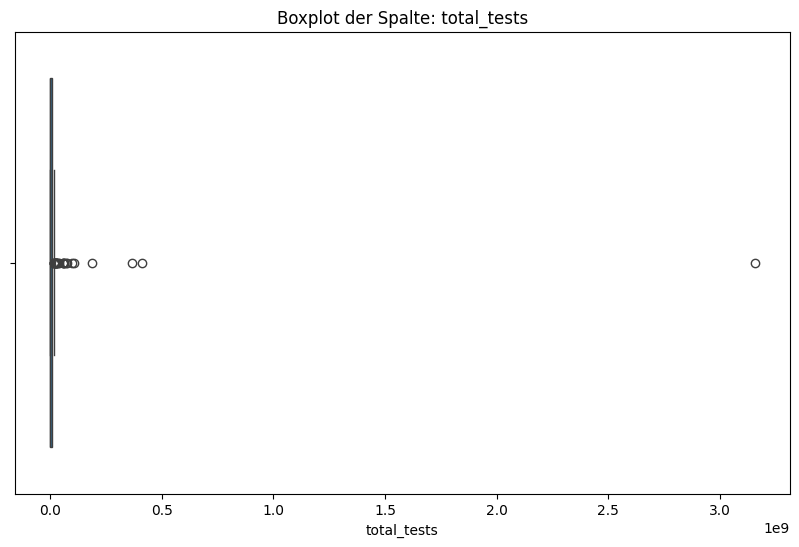

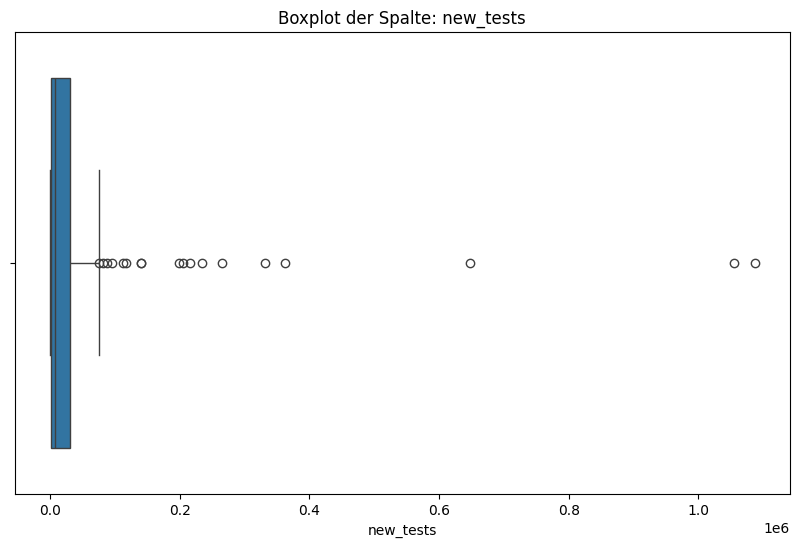

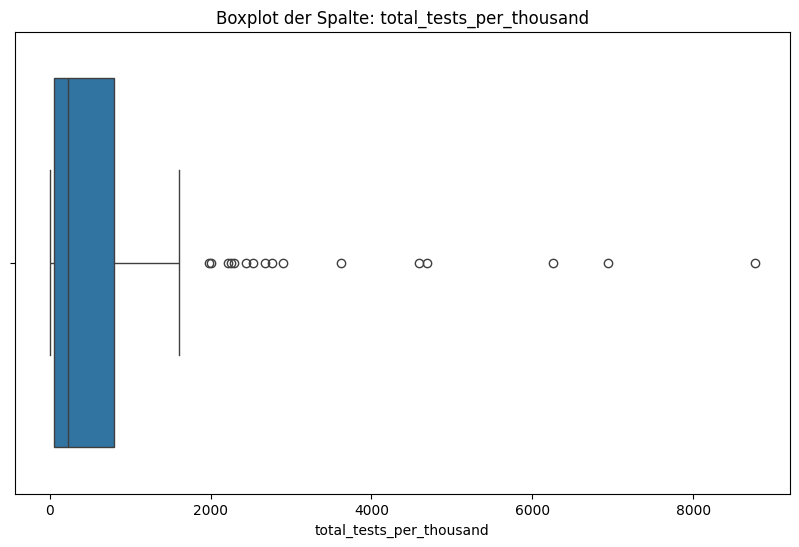

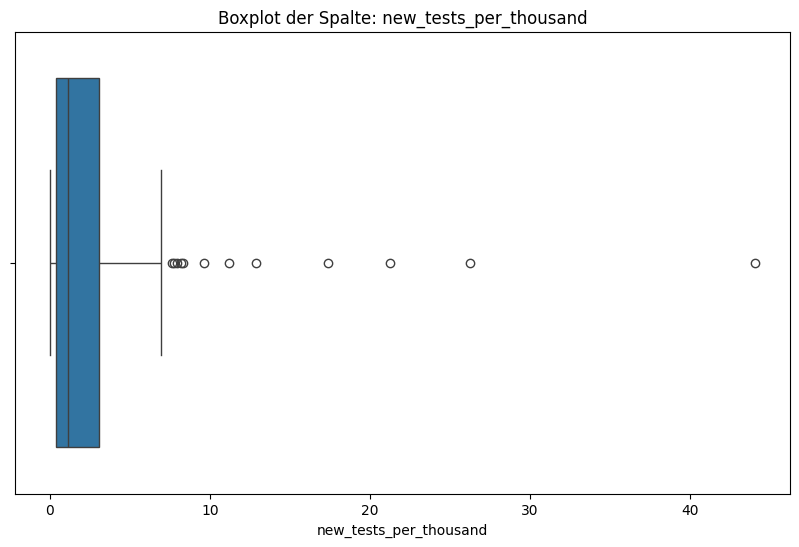

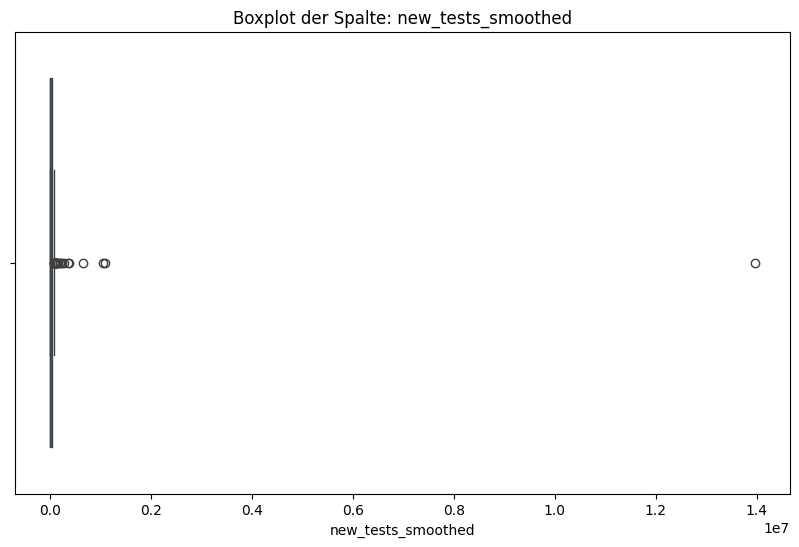

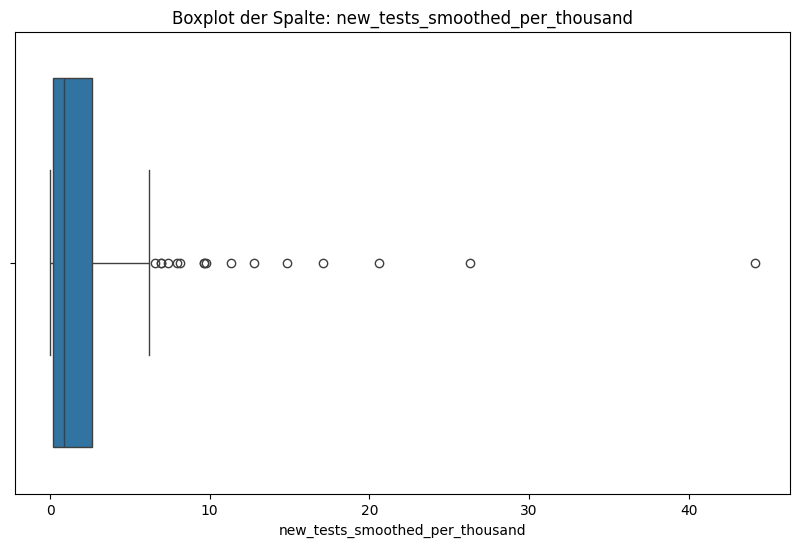

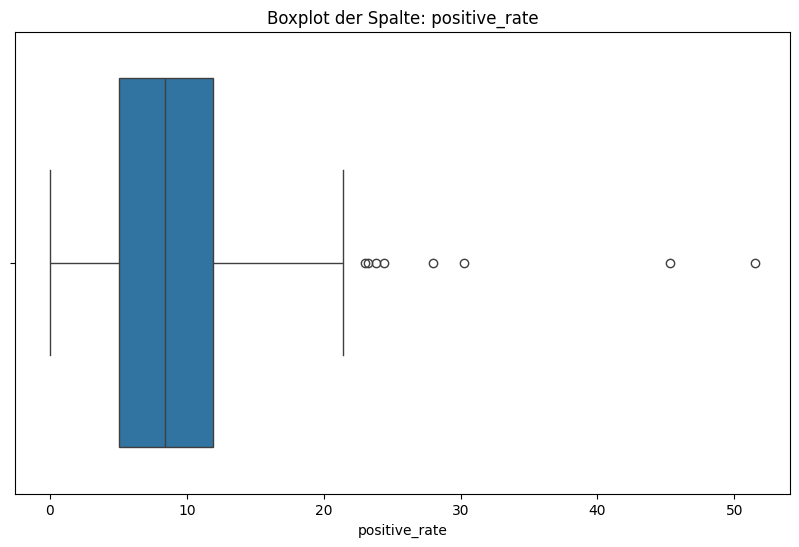

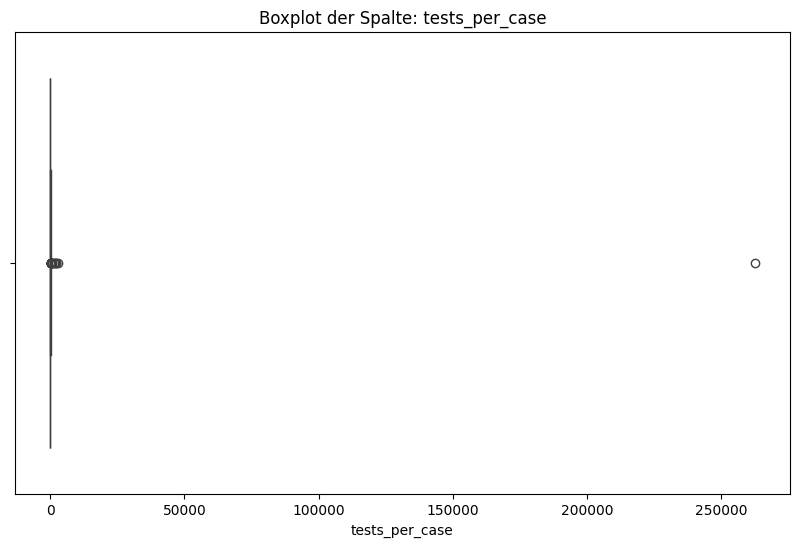

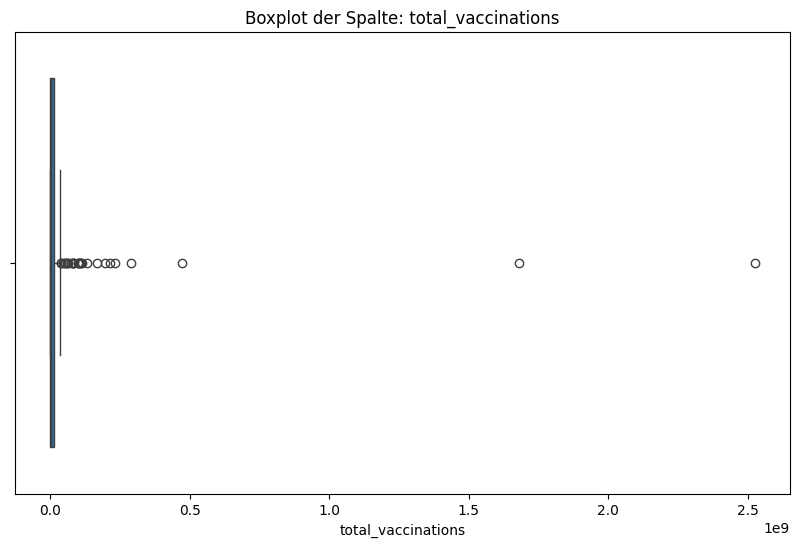

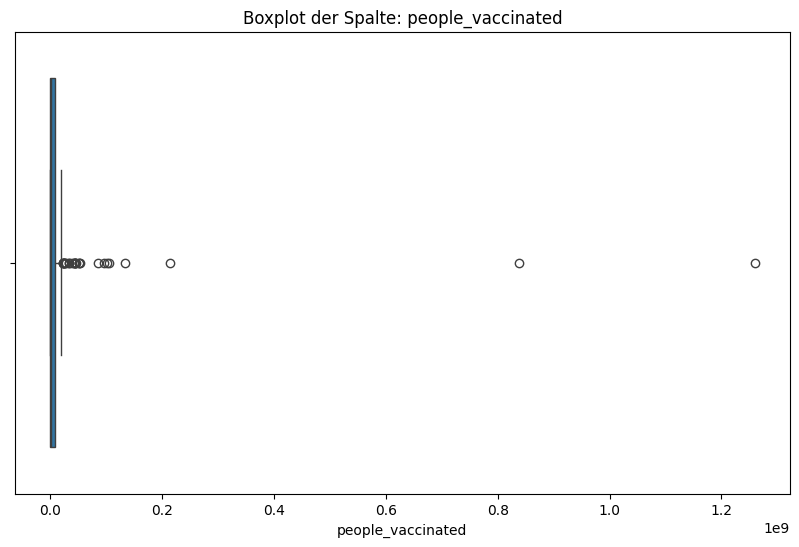

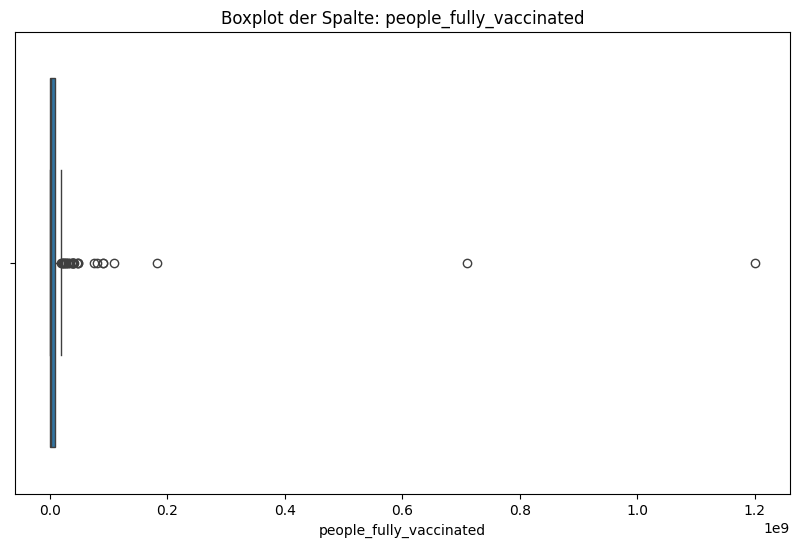

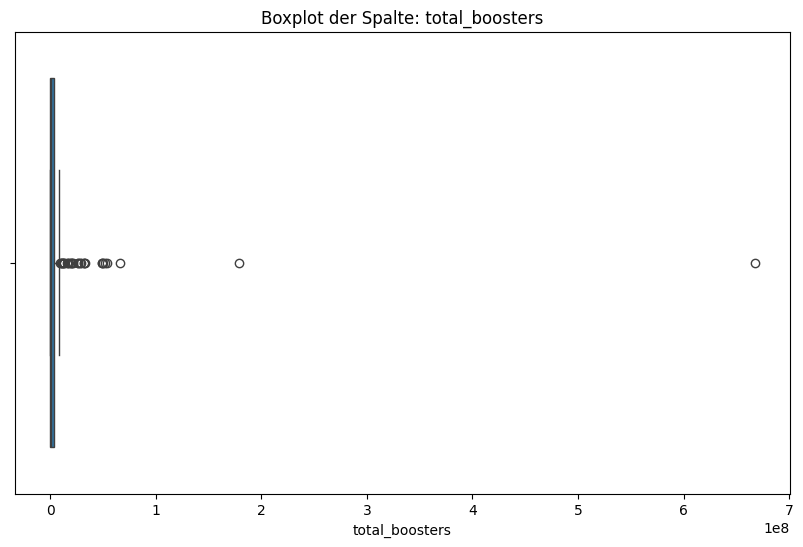

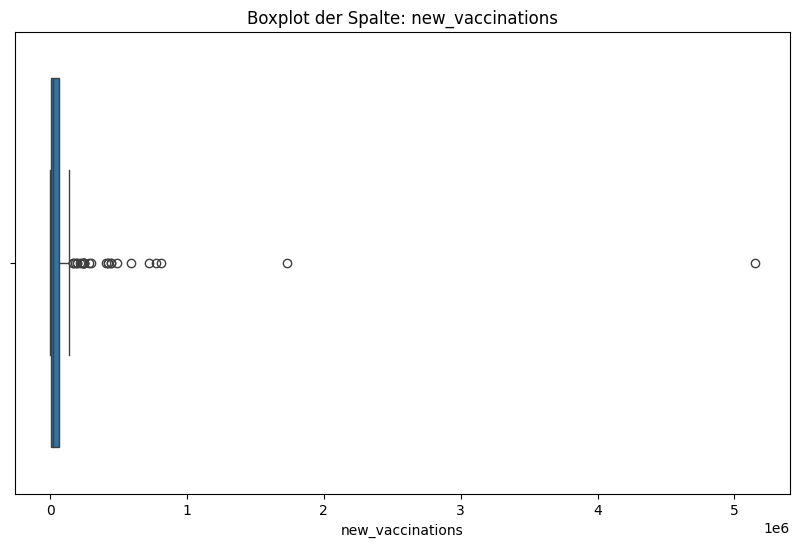

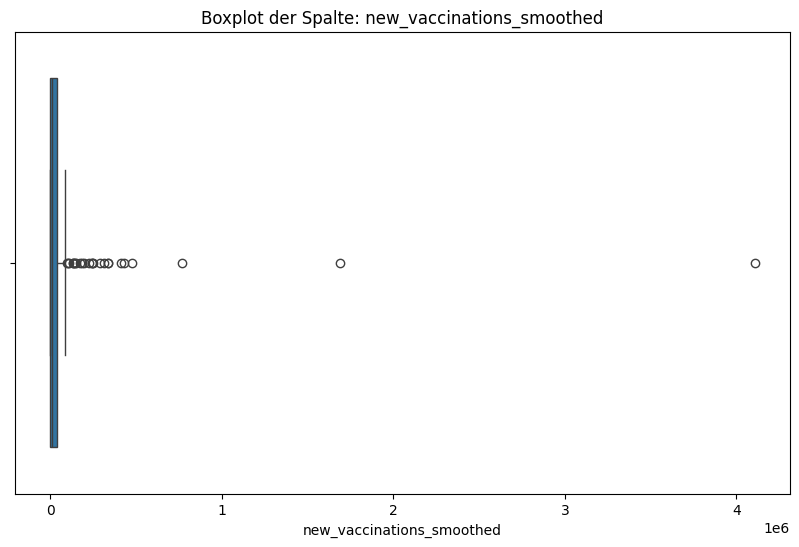

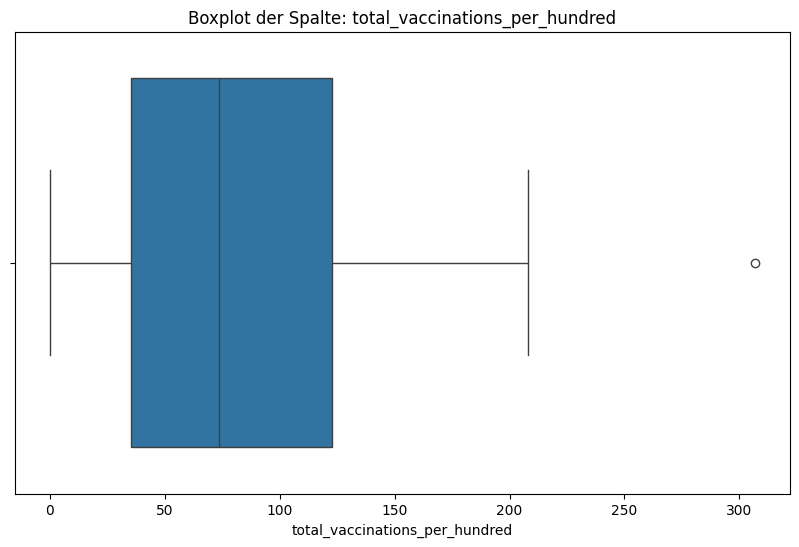

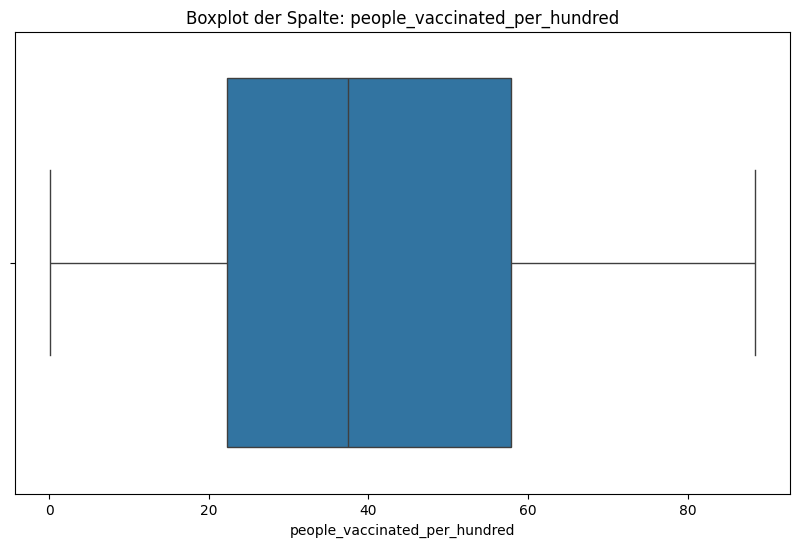

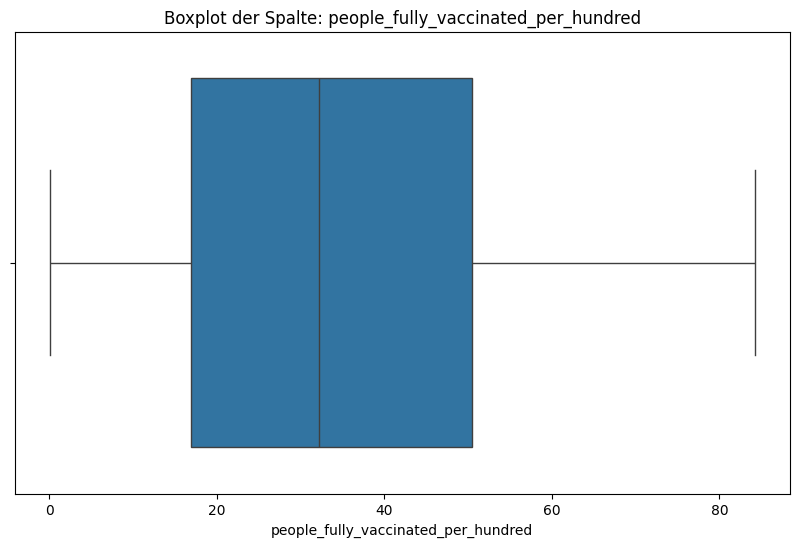

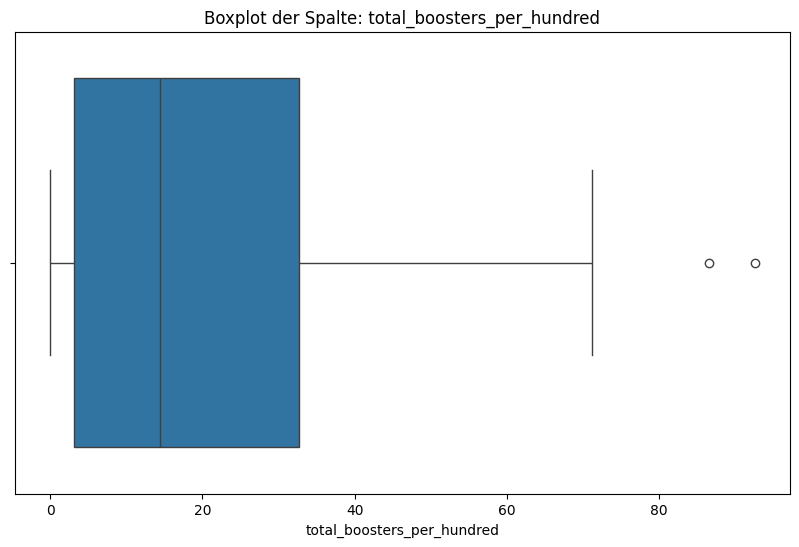

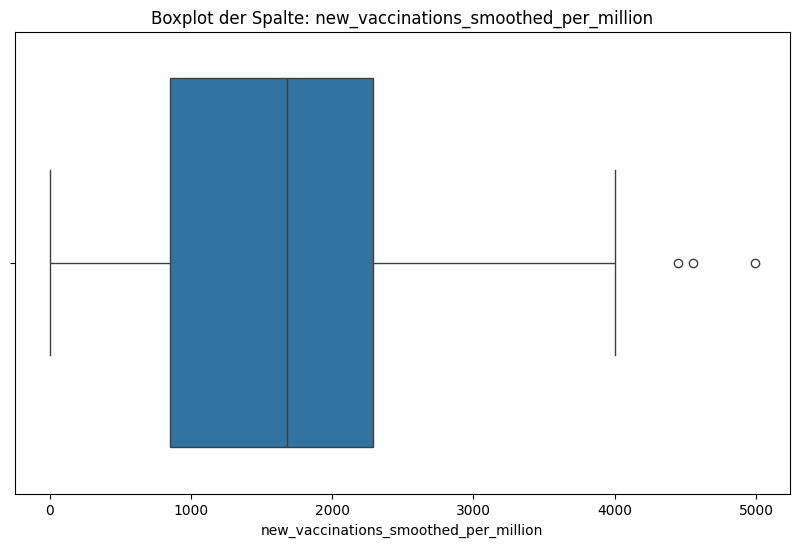

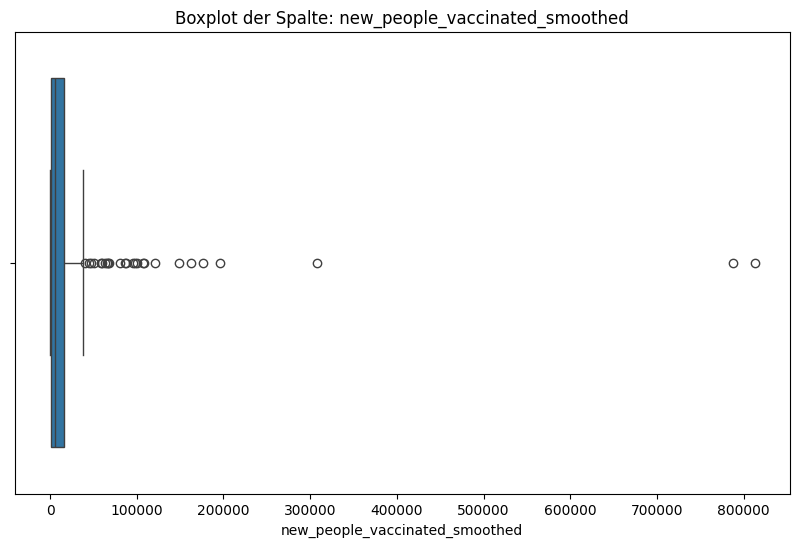

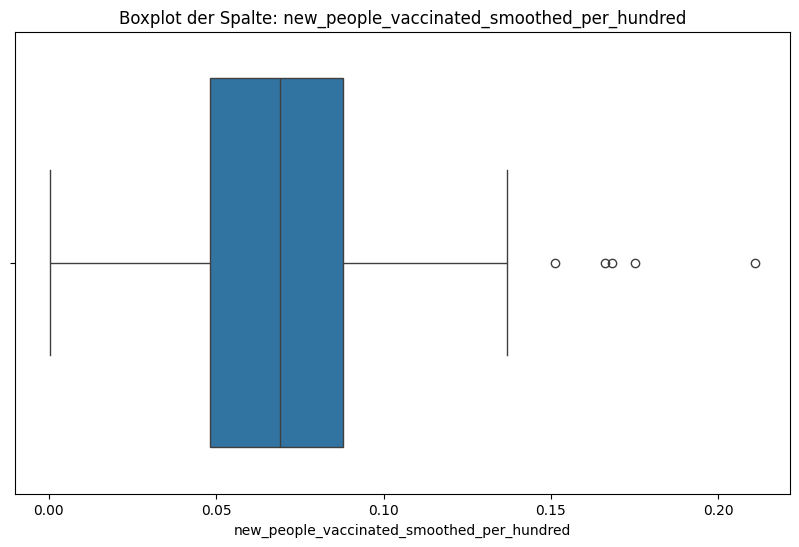

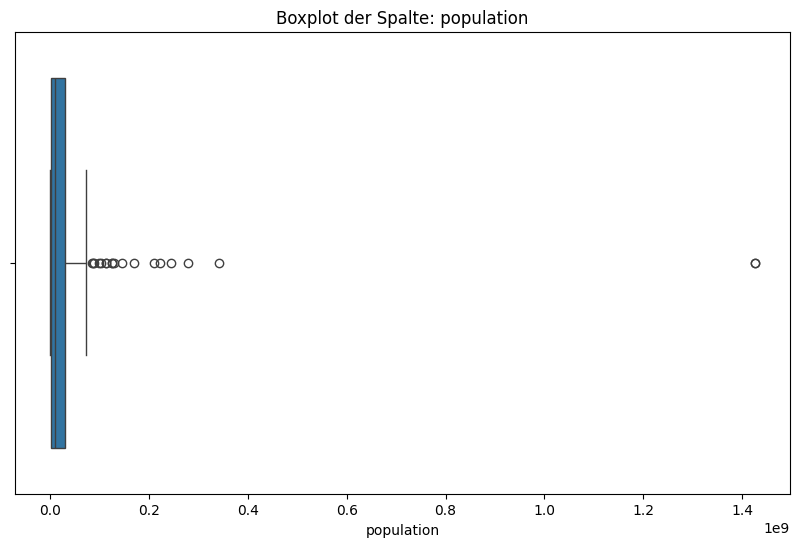

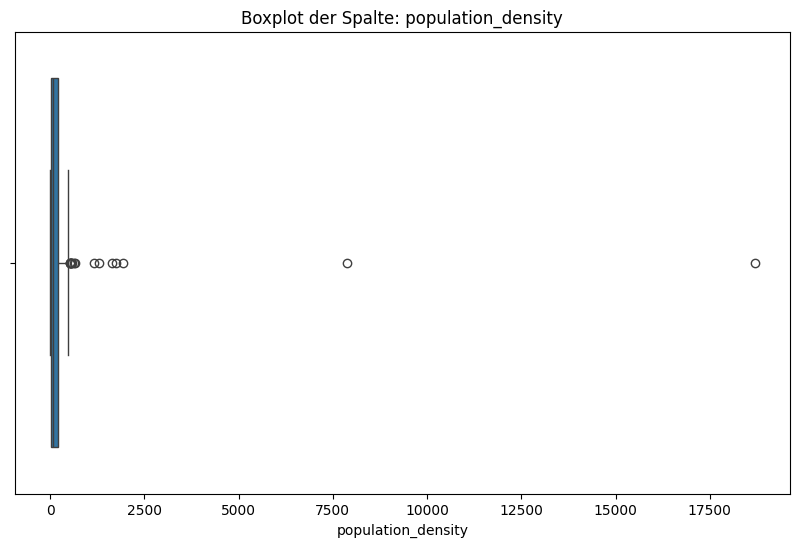

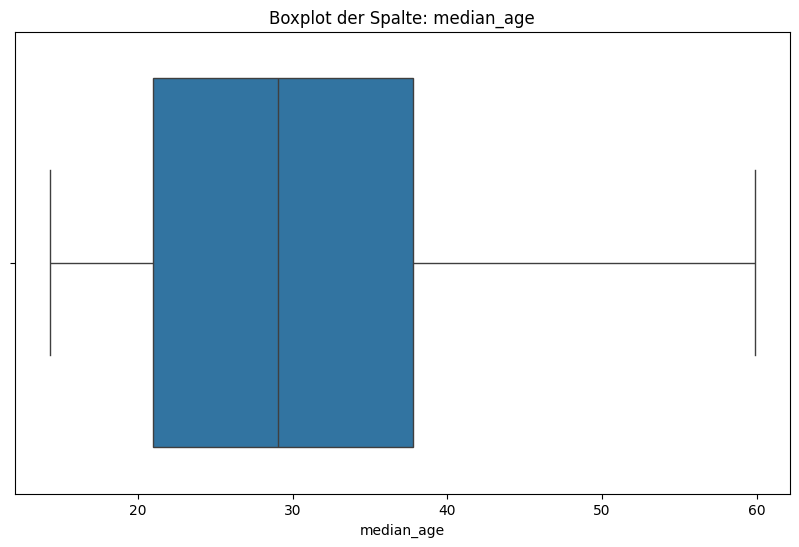

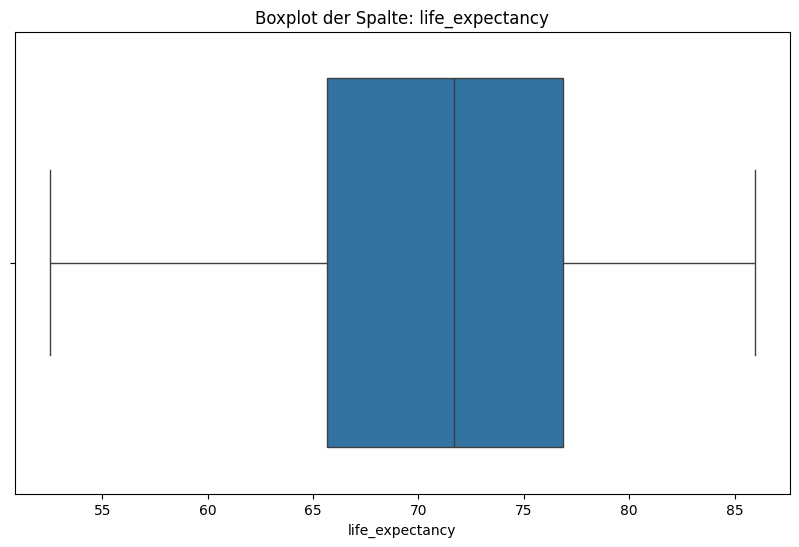

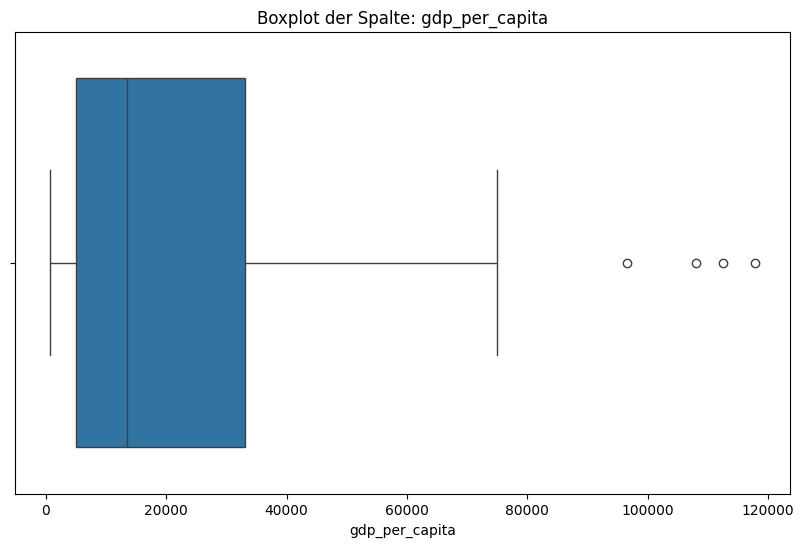

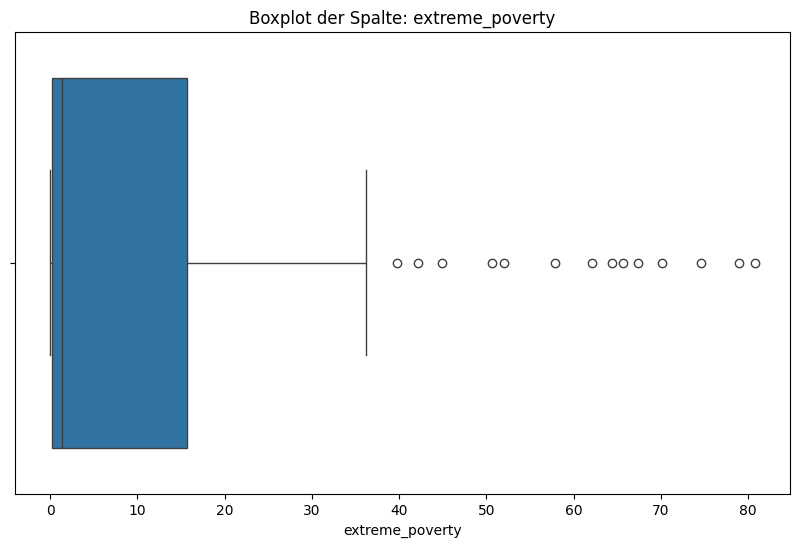

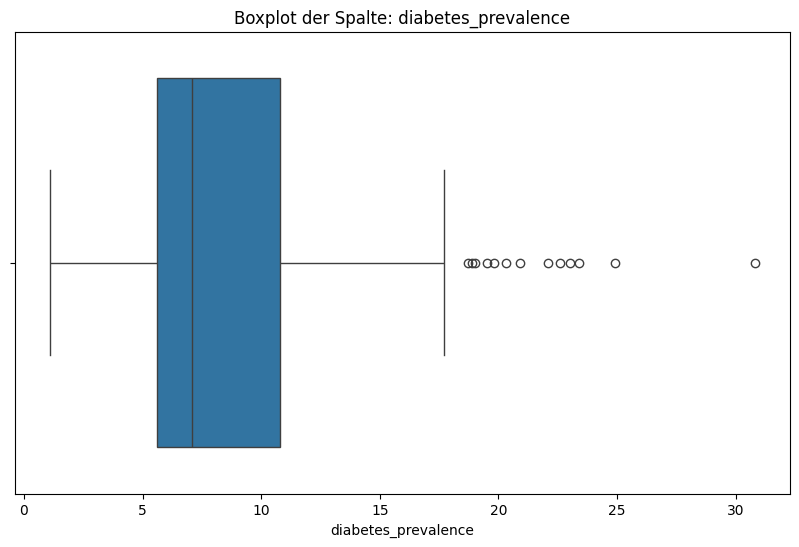

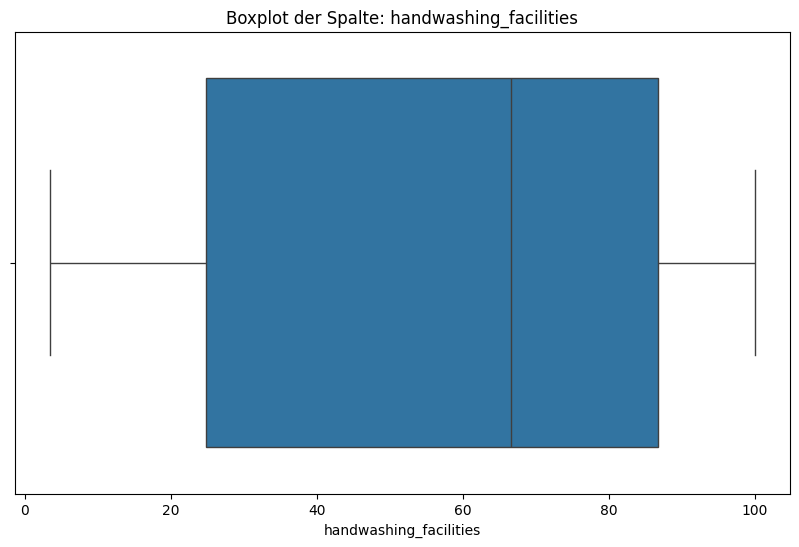

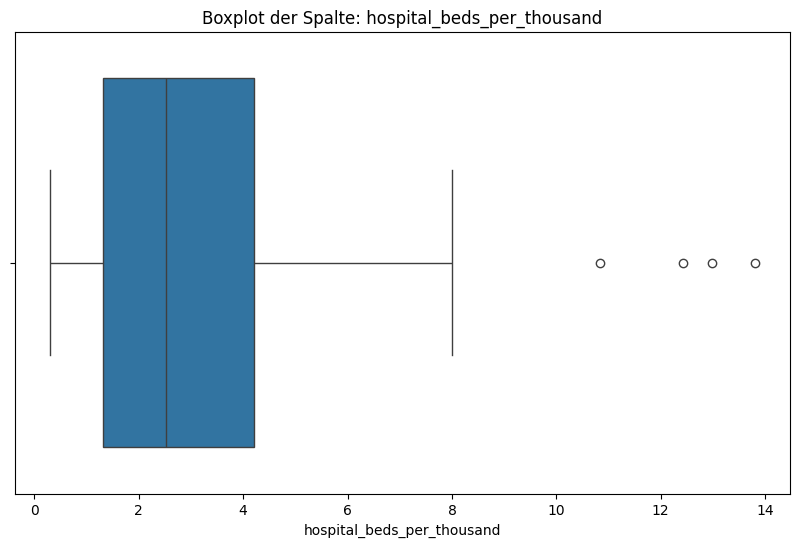

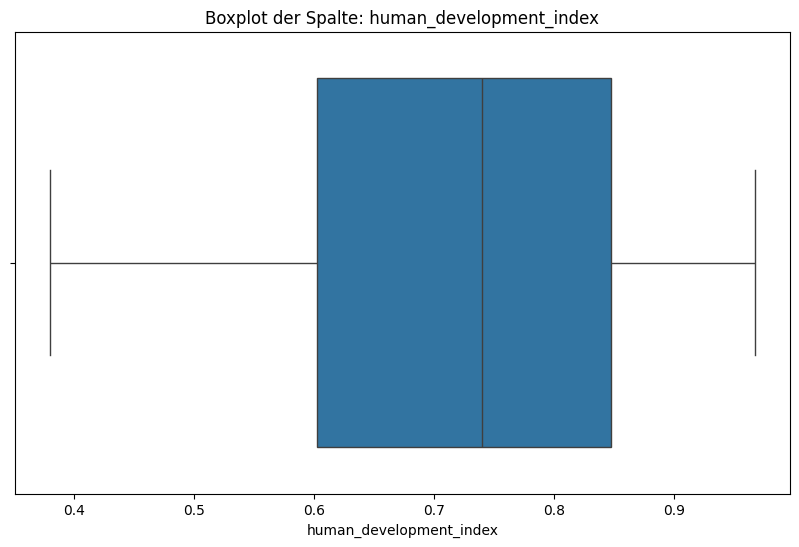

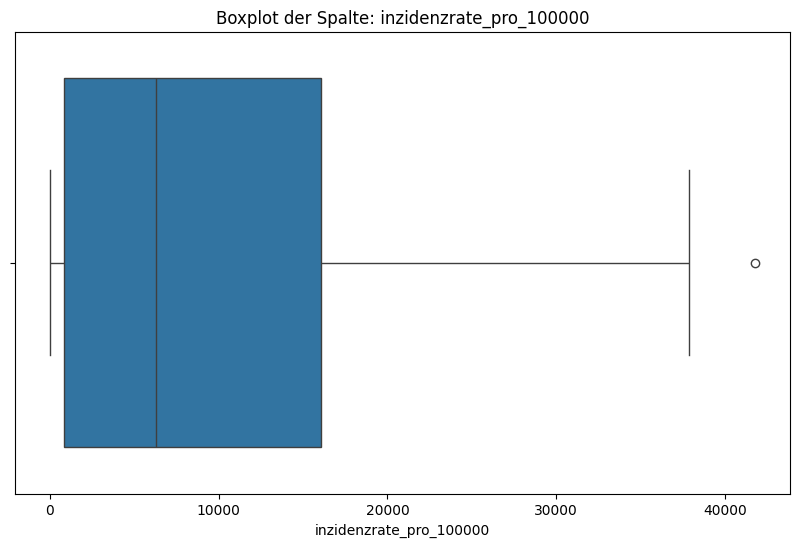

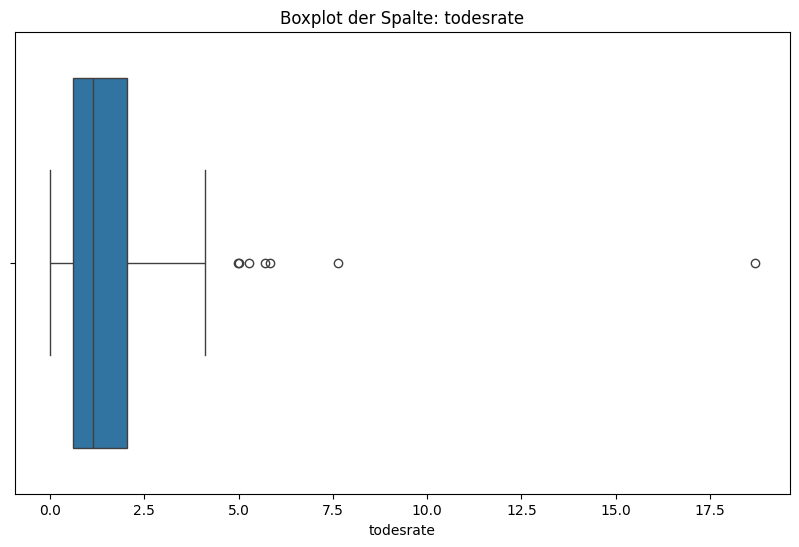

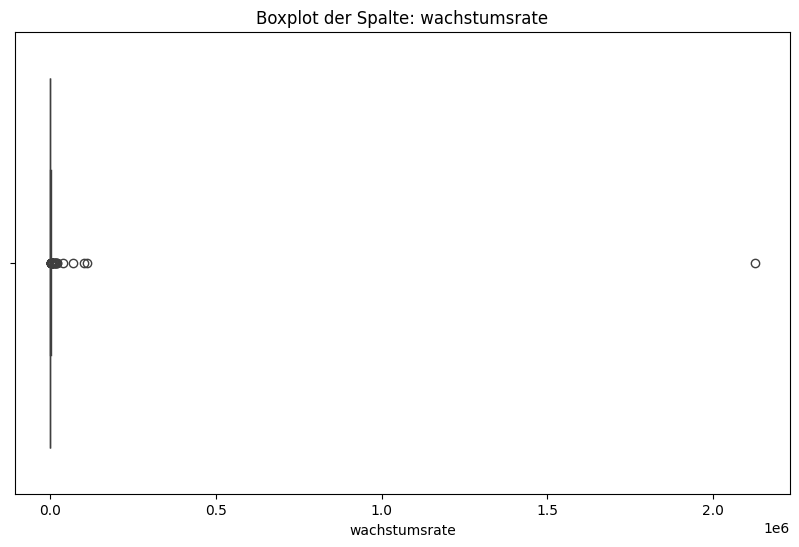

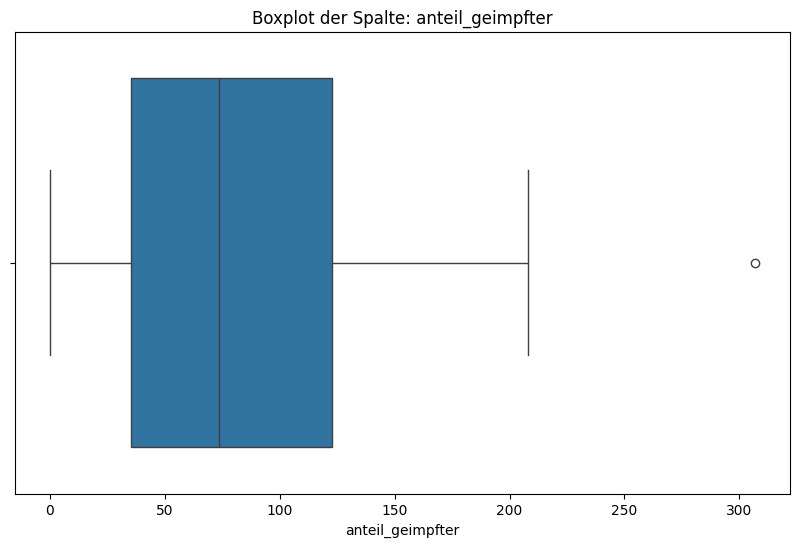

ValueError: List of boxplot statistics and `positions` values must have same the length

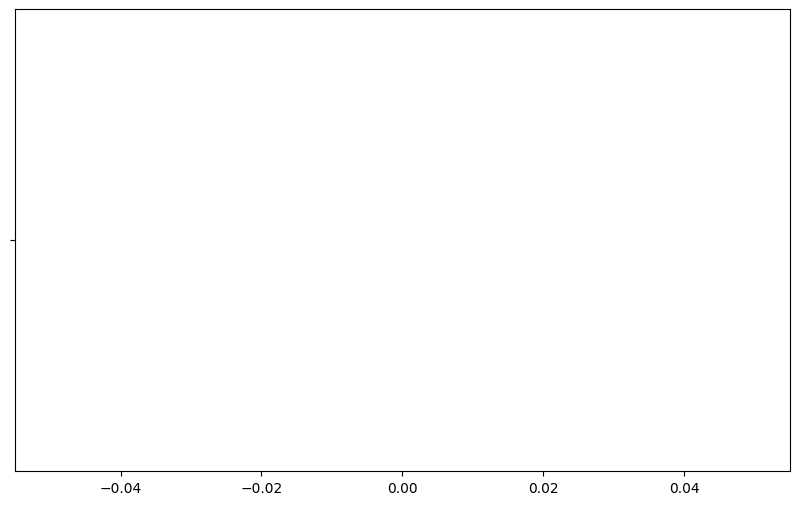

In [36]:
# Boxplots für jede numerische Spalte erstellen
for column in df_grouped2.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_grouped2[column])
    plt.title(f'Boxplot der Spalte: {column}')
    plt.xlabel(column)
    plt.show()

**Spalten die Angepasst werden müssen (Normalisierung, Daten näher bringen...):**

  total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, excess_mortality_cumulative_absolute, total_tests, new_tests, total_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_per_case, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, new_people_vaccinated_smoothed, population, population_density, wachstumsrate

In [37]:
df1 = df_grouped2[[ 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'excess_mortality_cumulative_absolute', 'total_tests', 
          'new_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'total_vaccinations', 
          'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'new_people_vaccinated_smoothed', 'population', 
          'population_density', 'wachstumsrate']]
df1

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,excess_mortality_cumulative_absolute,total_tests,new_tests,total_tests_per_thousand,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,population_density,wachstumsrate
0,1.511644e+05,133.796359,134.177980,5776.097270,4.549488,4.562464,NaN,9.246452e+05,NaN,23.058800,...,1.113981e+07,9.916527e+06,9.731219e+06,1.662878e+06,9784.375000,22013.608325,18362.443323,40578846.0,62.215546,NaN
1,2.184107e+05,191.806030,192.351644,2629.811718,2.052332,2.058186,11410.673252,5.596443e+05,2241.486111,196.042425,...,1.402001e+06,8.515603e+05,7.601208e+05,2.151696e+05,8242.389535,3174.808020,1386.886554,2827615.0,103.197624,4.335669e+01
2,1.958427e+05,154.819681,155.261266,5112.213879,3.914107,3.925271,90945.817292,2.305530e+05,NaN,5.219000,...,1.065704e+07,5.908922e+06,5.136519e+06,3.550903e+05,56928.666667,26193.618170,13457.038501,45477391.0,19.094180,-1.928320e+01
3,3.018783e+04,27.312287,27.390188,125.815700,0.090444,0.090702,90.199999,1.814961e+05,NaN,2296.431171,...,9.134781e+04,4.286883e+04,3.947115e+04,3.902735e+04,2401.000000,161.206308,59.191442,79722.0,169.621280,-8.235865e+01
4,7.023313e+04,61.138794,61.313177,1355.060296,1.101820,1.104963,NaN,1.428346e+06,5627.200000,41.396833,...,1.320656e+07,8.417522e+06,4.904946e+06,1.392860e+06,NaN,26874.303306,15991.600567,35635028.0,28.583483,1.238509e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3.805501e+05,314.388510,315.285223,4097.769625,3.331058,3.340559,NaN,NaN,NaN,NaN,...,1.335134e+07,8.310643e+06,7.169059e+06,1.915968e+05,NaN,57539.690343,33673.790657,28213016.0,31.985733,2.125650e+06
191,6.385231e+06,6612.059158,6630.918347,26685.677474,24.576792,24.646891,NaN,7.007362e+07,216251.103704,718.939579,...,1.021429e+08,4.299468e+07,3.849326e+07,4.945714e+07,426162.428571,315369.893016,107062.848901,99680656.0,318.032650,2.003149e+03
192,8.519149e+03,6.794653,6.814033,1591.546075,1.228100,1.231603,NaN,3.332645e+05,NaN,10.104500,...,7.985933e+05,6.526001e+05,4.126140e+05,4.566605e+04,NaN,1368.128980,1105.243335,38222880.0,72.395935,-9.989724e+01
193,2.292499e+05,199.028441,199.596121,2871.901593,2.319681,2.326298,NaN,1.566342e+06,4501.762533,80.436080,...,2.504451e+06,9.221710e+05,1.575582e+06,3.749415e+05,18375.875912,13737.965236,11818.722716,20152934.0,27.109505,2.829192e+03


In [38]:
df1.to_csv('df1.csv', index=False)# neues Dataset df1 für die neuen Boxplots zur Normalisierung

**Daten testen, ob sie Normalverteilt sind**

In [39]:
# mit Saphiro-Wilk-Test
from scipy.stats import shapiro

# Nur numerische Spalten auswählen
numeric_cols = df1.select_dtypes(include='number').columns

# Shapiro-Wilk-Test für jede numerische Spalte
normality_results = {}
for col in numeric_cols:
    stat, p_value = shapiro(df1[col].dropna())  # NaN-Werte ausschließen
    normality_results[col] = {'Teststatistik': stat, 'p-Wert': p_value}

# Ergebnisse anzeigen
for col, result in normality_results.items():
    print(f"{col}: Teststatistik = {result['Teststatistik']:.4f}, p-Wert = {result['p-Wert']:.4f}")
    if result['p-Wert'] < 0.05:
        print("  => Nicht normalverteilt") # alle Daten in den Spalten sind nicht Normalverteilt
    else:
        print("  => Normalverteilt")

total_cases: Teststatistik = 0.3535, p-Wert = 0.0000
  => Nicht normalverteilt
new_cases: Teststatistik = 0.3050, p-Wert = 0.0000
  => Nicht normalverteilt
new_cases_smoothed: Teststatistik = 0.3050, p-Wert = 0.0000
  => Nicht normalverteilt
total_deaths: Teststatistik = 0.3214, p-Wert = 0.0000
  => Nicht normalverteilt
new_deaths: Teststatistik = 0.3262, p-Wert = 0.0000
  => Nicht normalverteilt
new_deaths_smoothed: Teststatistik = 0.3262, p-Wert = 0.0000
  => Nicht normalverteilt
excess_mortality_cumulative_absolute: Teststatistik = 0.4120, p-Wert = 0.0000
  => Nicht normalverteilt
total_tests: Teststatistik = 0.0974, p-Wert = 0.0000
  => Nicht normalverteilt
new_tests: Teststatistik = 0.3477, p-Wert = 0.0000
  => Nicht normalverteilt
total_tests_per_thousand: Teststatistik = 0.5682, p-Wert = 0.0000
  => Nicht normalverteilt
new_tests_smoothed: Teststatistik = 0.0837, p-Wert = 0.0000
  => Nicht normalverteilt
new_tests_smoothed_per_thousand: Teststatistik = 0.4951, p-Wert = 0.0000
  

**Daten normalisieren**

Sowohl Z-Score-Normalisierung als auch Min-Max-Skalierung sind nützliche Techniken zur Datennormalisierung, aber ihre Eignung hängt vom spezifischen Anwendungsfall und den Eigenschaften der Daten ab. Hier ist ein Vergleich der beiden Methoden:

## Z-Score-Normalisierung

### Vorteile:
1. Bewahrt Ausreißer und extreme Werte
2. Nützlich für Daten, die annähernd normalverteilt sind
3. Resultiert in Daten mit Mittelwert 0 und Standardabweichung 1

### Nachteile:
1. Nicht geeignet für Daten, die nicht normalverteilt sind
2. Kann zu Problemen führen, wenn die Standardabweichung sehr klein ist

## Min-Max-Skalierung

### Vorteile:
1. Skaliert Daten in einen festen Bereich (typischerweise [0, 1])
2. Bewahrt die ursprüngliche Verteilung der Daten
3. Nützlich für Daten, die nicht normalverteilt sind

### Nachteile:
1. Anfällig für Ausreißer, die die Skalierung stark beeinflussen können
2. Kann Informationen über die ursprüngliche Verteilung verlieren

## Wann welche Methode verwenden?

1. **Z-Score-Normalisierung** ist besser, wenn:
   - Die Daten annähernd normalverteilt sind
   - Ausreißer wichtige Informationen enthalten
   - Sie Merkmale mit unterschiedlichen Mittelwerten und Standardabweichungen vergleichen möchten

2. **Min-Max-Skalierung** ist besser, wenn:
   - Sie Daten in einen bestimmten Bereich bringen müssen (z.B. für neuronale Netze)
   - Die Verteilung nicht normalverteilt ist
   - Sie die relative Verteilung der Daten beibehalten möchten

## Fazit

Die Wahl zwischen Z-Score-Normalisierung und Min-Max-Skalierung hängt von Ihren spezifischen Daten und Anforderungen ab. In der Praxis ist es oft sinnvoll, beide Methoden auszuprobieren und die Ergebnisse zu vergleichen.

Für maschinelles Lernen kann die Z-Score-Normalisierung vorteilhaft sein, da sie hilft, dass Modelle schneller konvergieren und besser mit Merkmalen unterschiedlicher Skalen umgehen können. Allerdings kann die Min-Max-Skalierung in Situationen, wo eine feste Skalierung erforderlich ist, wie bei bestimmten neuronalen Netzarchitekturen, die bessere Wahl sein.

In [40]:
# 1. mit Min-Max-Skalierung, um diese Daten zu normalisieren (um die Werte in einem vergleichbaren Bereich zu bringen)
# Min-Max-Skalierung, da die Daten nicht Normalverteilt sind
from sklearn.preprocessing import MinMaxScaler

# Min-Max-Skalierer initialisieren
scaler = MinMaxScaler()

# Nur numerische Spalten auswählen
numeric_cols = df1.select_dtypes(include='number').columns

# Min-Max-Skalierung anwenden
df_minmax = df1.copy()
df_minmax[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

# Ergebnis anzeigen
df_minmax.head()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,excess_mortality_cumulative_absolute,total_tests,new_tests,total_tests_per_thousand,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,population_density,wachstumsrate
0,0.002318,0.001593,0.001593,0.007237,0.006631,0.006633,NaN,0.000293,NaN,0.002057,...,0.004409,0.007869,0.008104,0.002492,0.001901,0.005352,0.022580,0.028468,0.003213,NaN
1,0.003350,0.002284,0.002283,0.003295,0.002991,0.002992,0.015150,0.000177,0.001997,0.021810,...,0.000550,0.000671,0.000629,0.000322,0.001601,0.000764,0.001692,0.001983,0.005406,0.000067
2,0.003004,0.001844,0.001843,0.006405,0.005705,0.005707,0.110561,0.000073,NaN,0.000020,...,0.004217,0.004687,0.004276,0.000532,0.011060,0.006370,0.016544,0.031904,0.000905,0.000038
3,0.000463,0.000325,0.000325,0.000158,0.000132,0.000132,0.001570,0.000057,NaN,0.261653,...,0.000031,0.000029,0.000029,0.000058,0.000466,0.000030,0.000059,0.000056,0.008960,0.000008
4,0.001077,0.000728,0.000728,0.001698,0.001606,0.001606,NaN,0.000453,0.005113,0.004151,...,0.005227,0.006679,0.004083,0.002087,NaN,0.006536,0.019663,0.024999,0.001413,0.000105


In [ ]:
#2. Z-Score-Normalisierung
#from sklearn.preprocessing import StandardScaler

# StandardScaler initialisieren
#scaler = StandardScaler()

# Z-Score Normalisierung anwenden
#df_zscore = df1.copy()
#df_zscore[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

# Ergebnis anzeigen
#df_zscore.head()

**neue Boxplots plotten mit den normalisierten Daten in df_minmax**

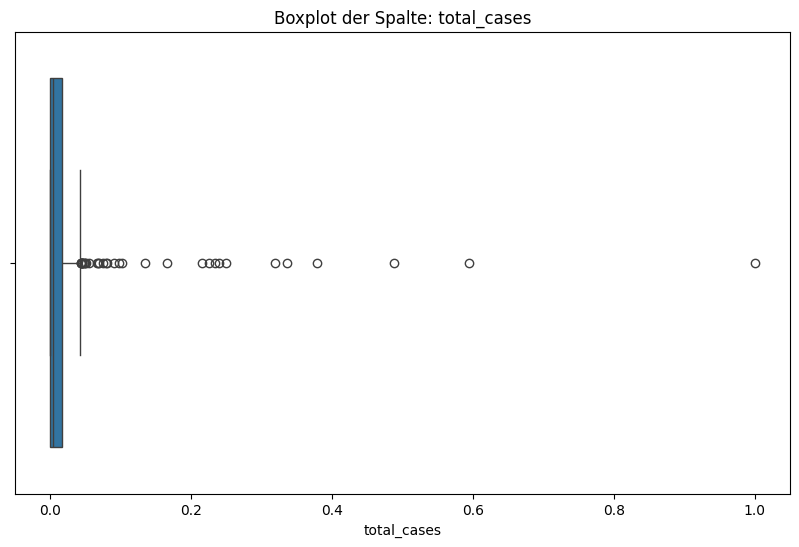

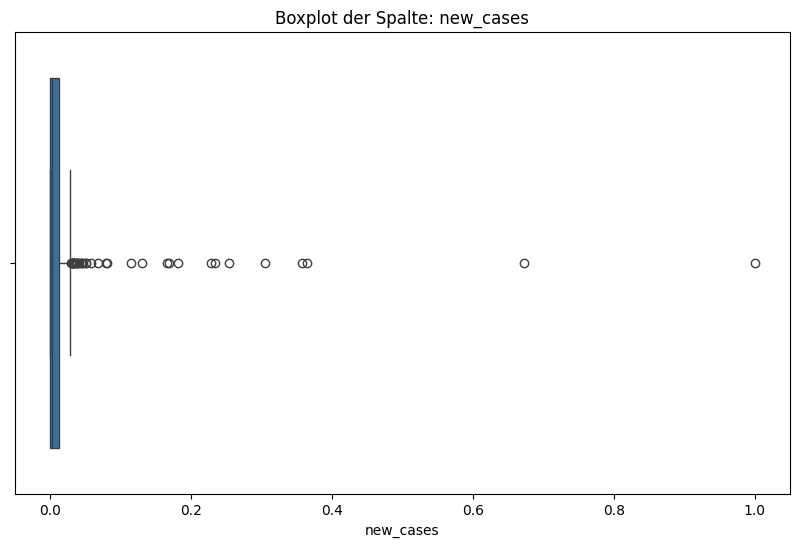

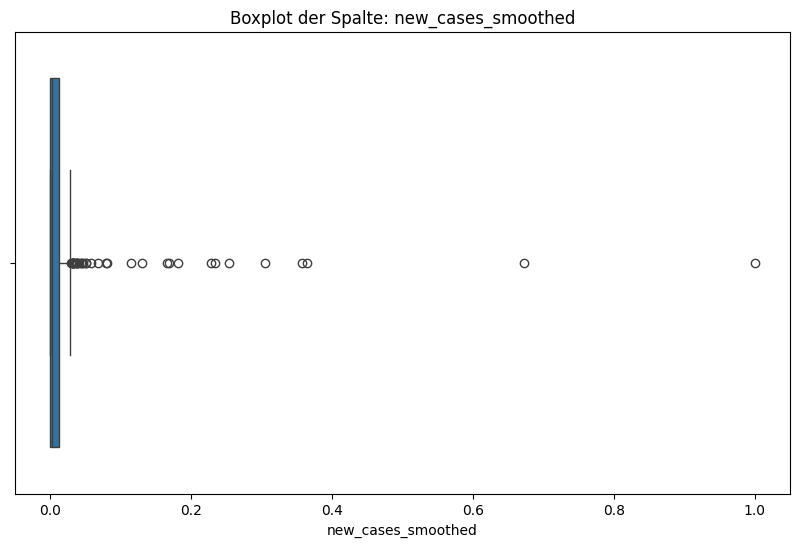

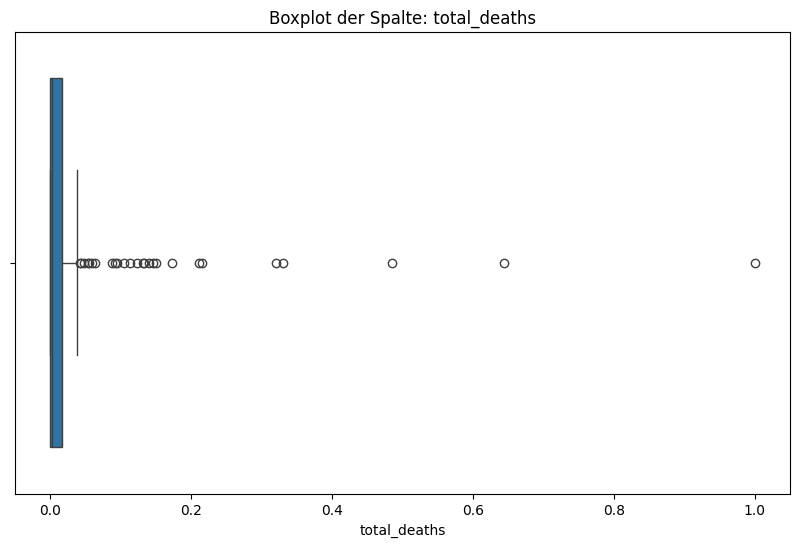

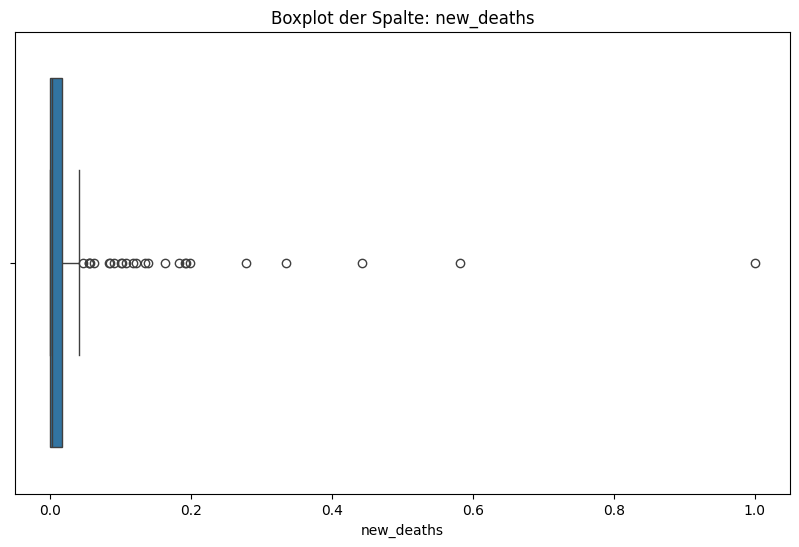

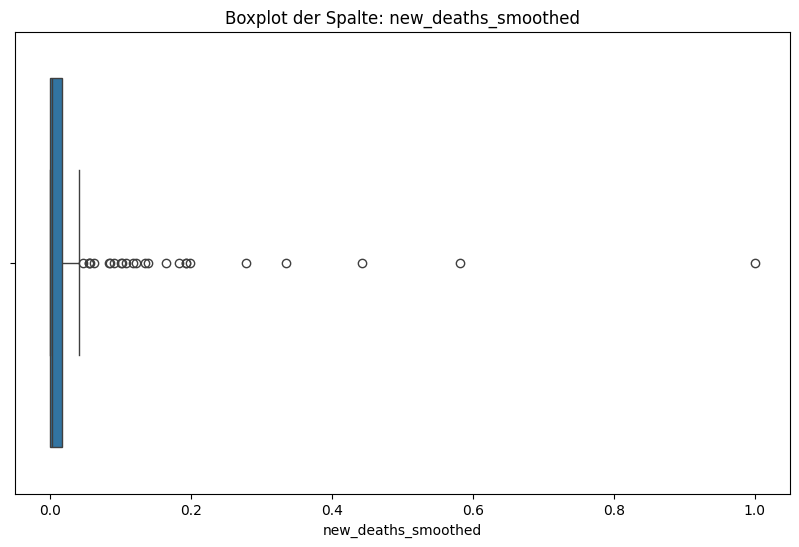

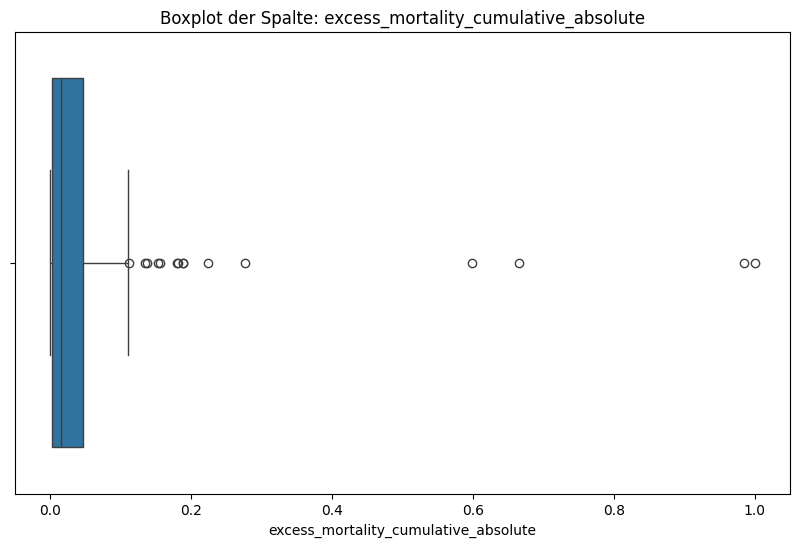

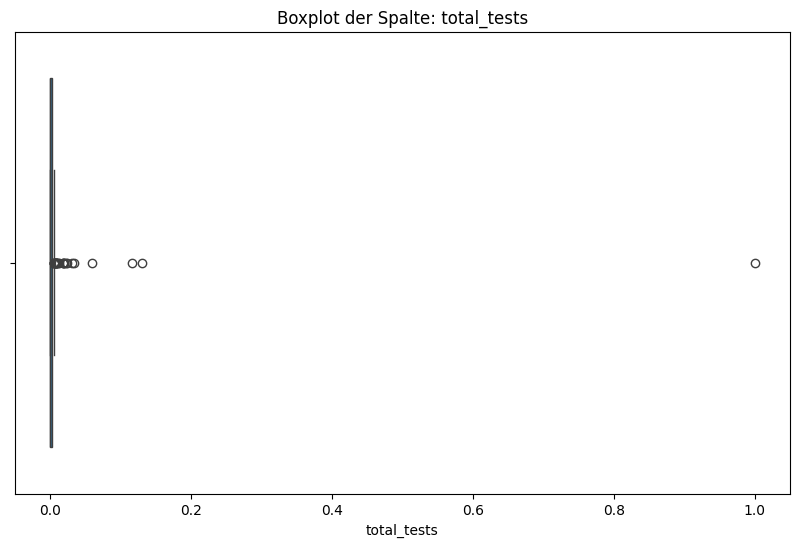

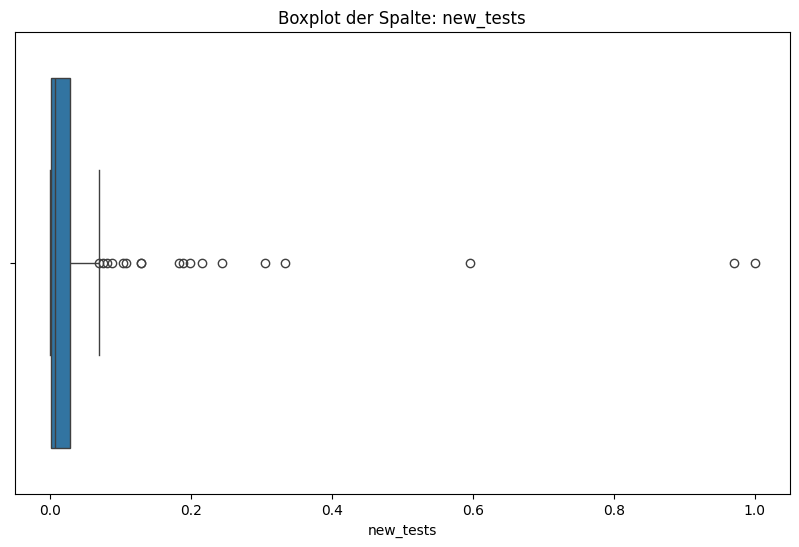

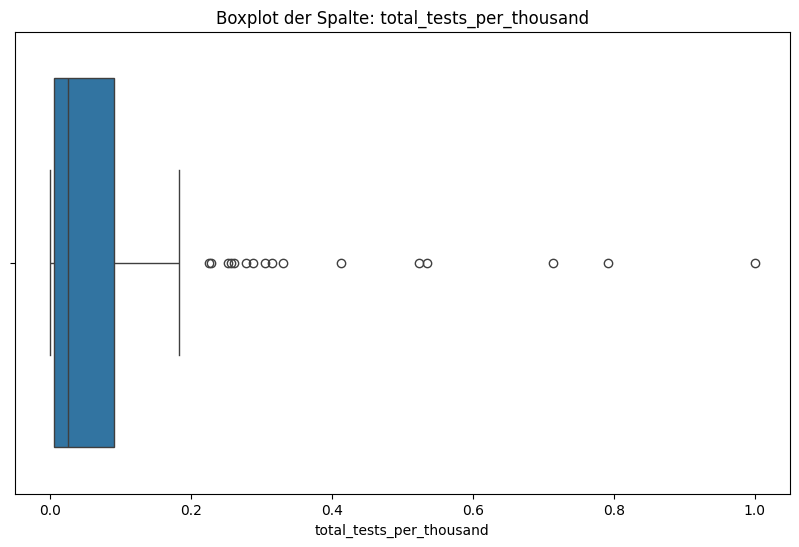

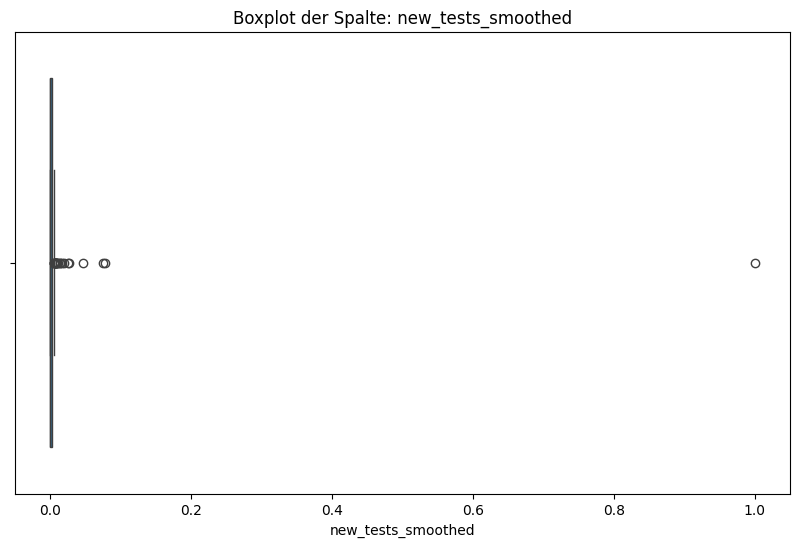

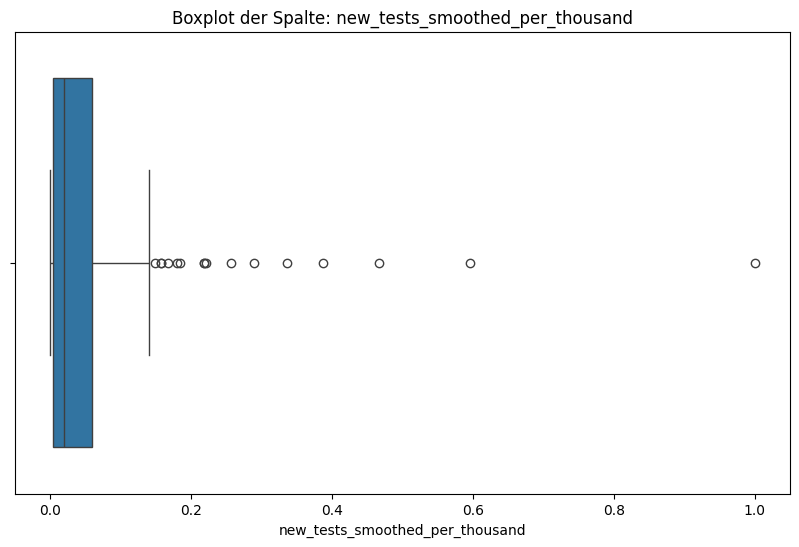

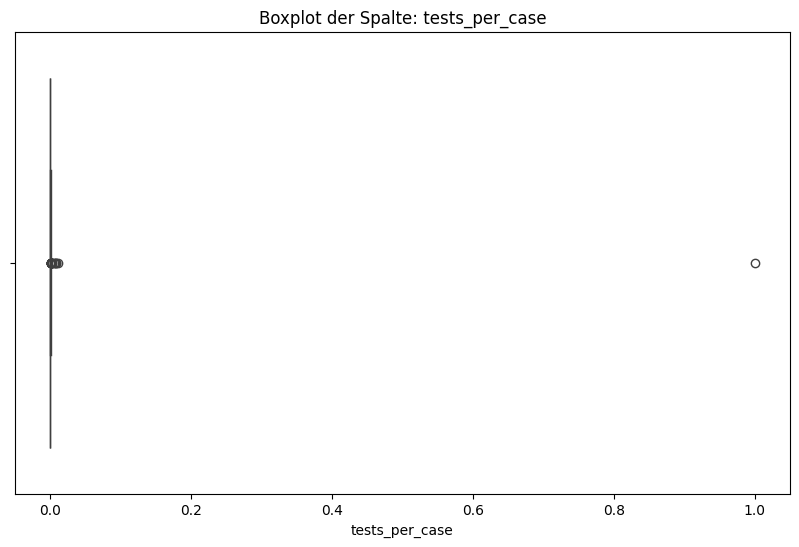

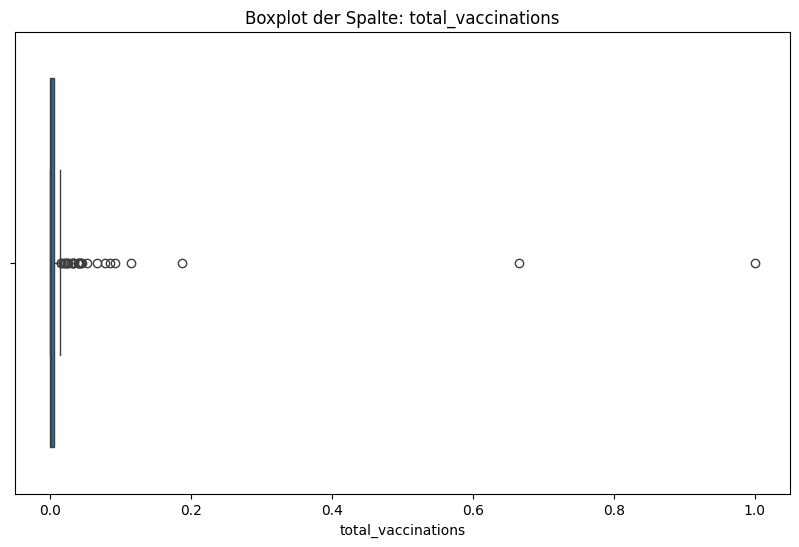

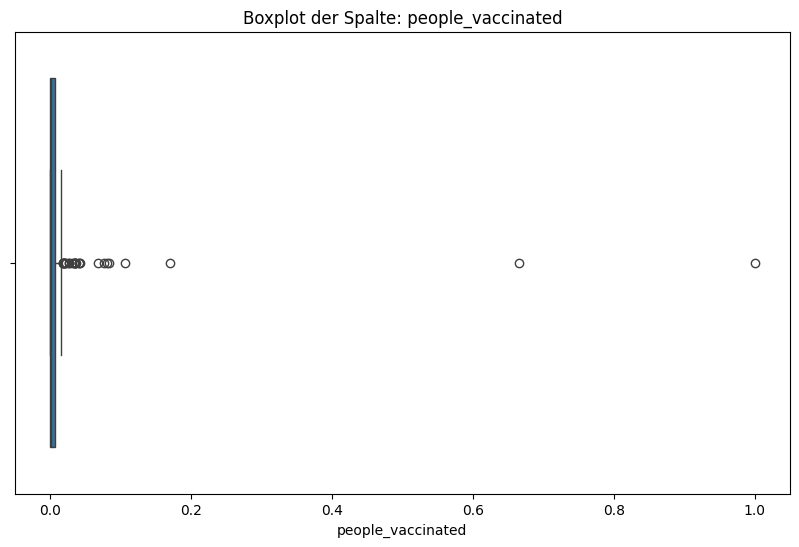

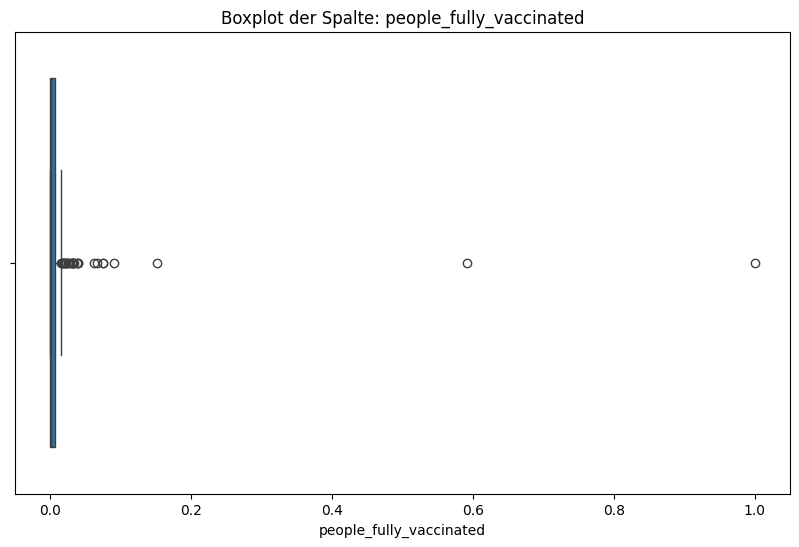

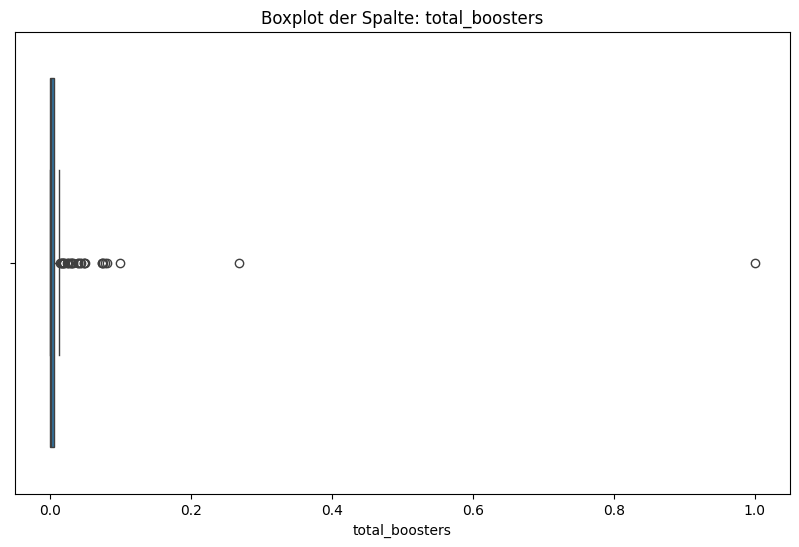

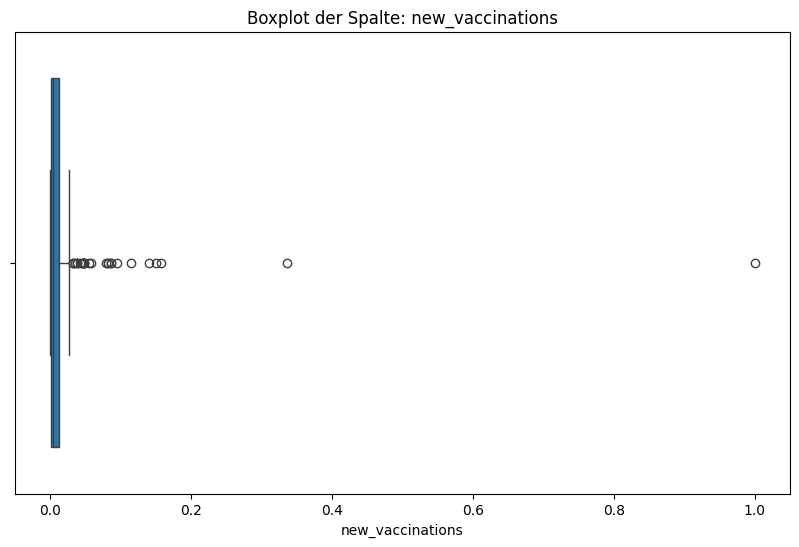

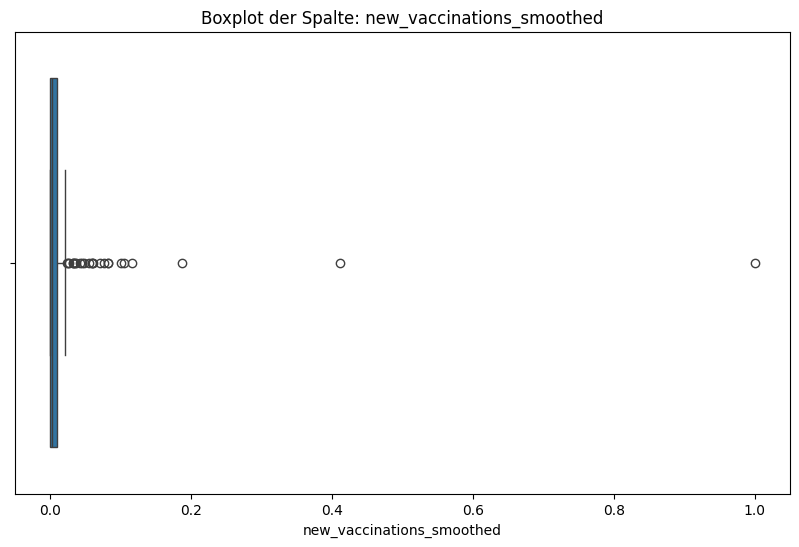

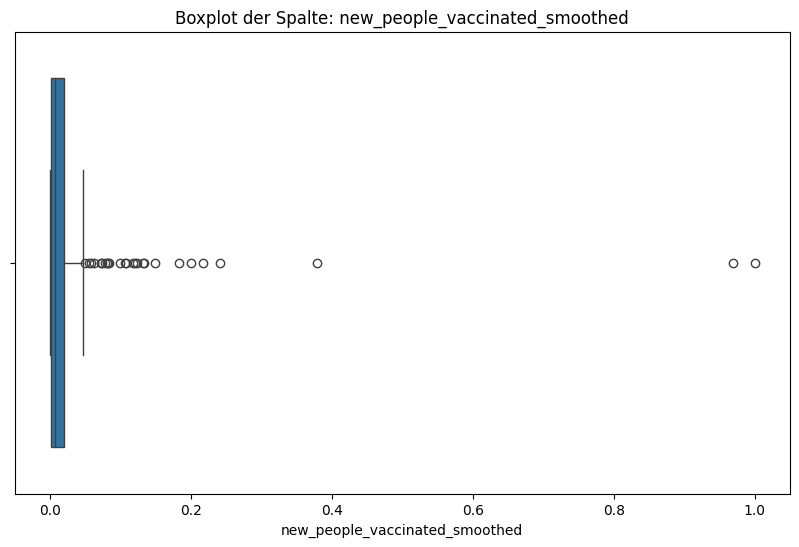

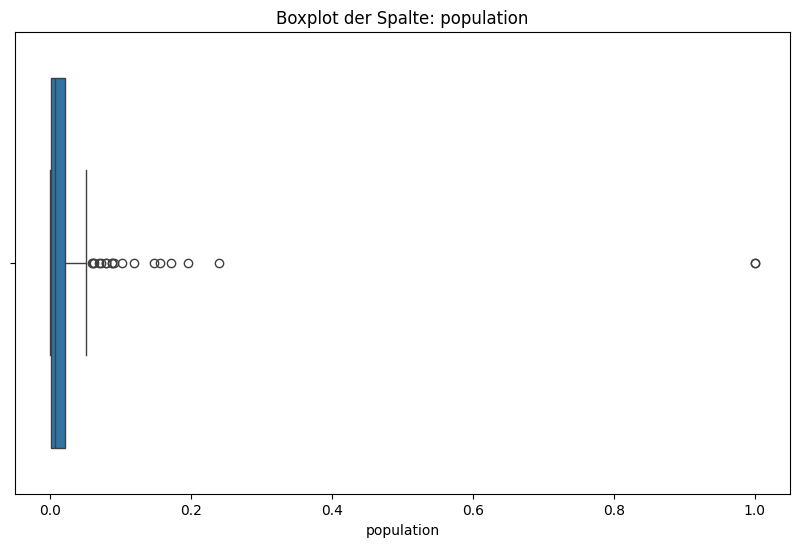

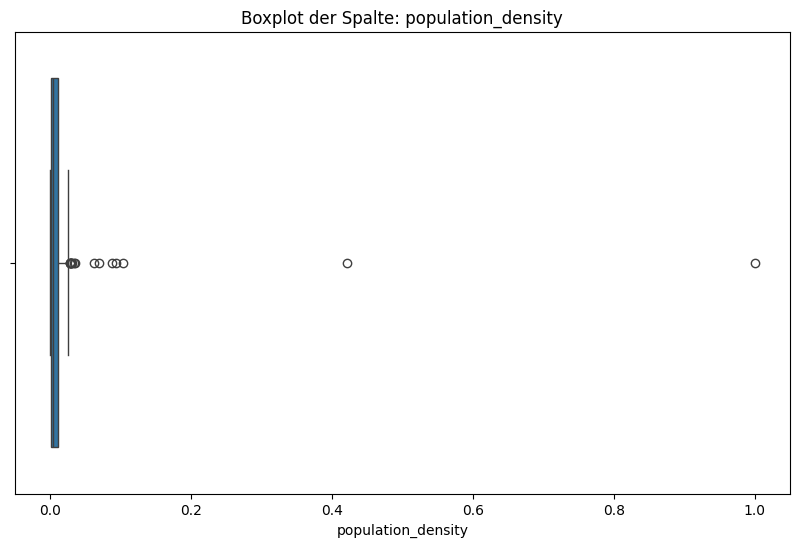

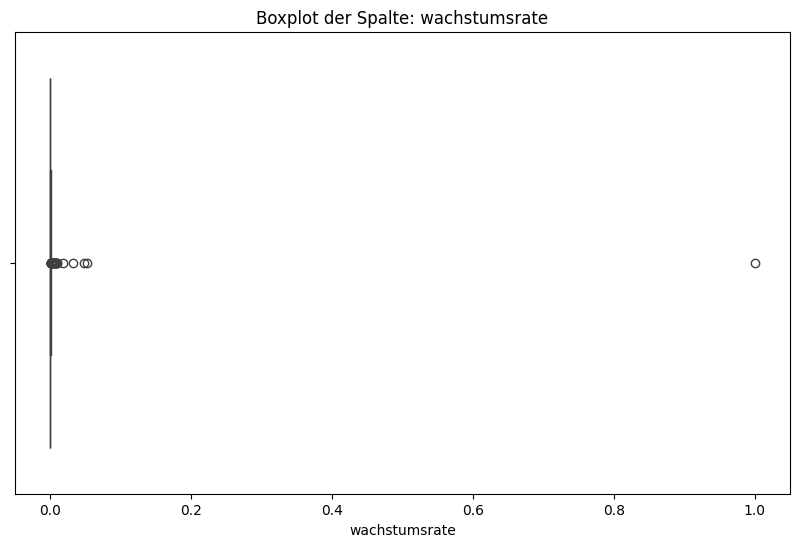

In [41]:
# Boxplots für jede numerische Spalte erstellen
for column in df_minmax.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_minmax[column])
    plt.title(f'Boxplot der Spalte: {column}')
    plt.xlabel(column)
    plt.show()

**Ausreißer entfernen**

- Ausreißer könne entweder mit über den Z-Score oder mit Interquartilsabstand entfernt werden
  
- mit Z-Score: Werte, deren Z-Scores über einem bestimmten Schwellenwert liegen (z. B. |Z-Score| > 3), werden als Ausreißer betrachtet. (allerdings haben wie keine Normalverteilung)

In [ ]:
#from scipy.stats import zscore

# Z-Score für jede numerische Spalte berechnen und extremere Ausreißer entfernen (z.B., Z-Score > 3)
    #z_scores = df[numeric_cols].apply(zscore)

# Bedingung für die Zeilen, die keine extremen Ausreißer enthalten
    #df_no_outliers_z = df[(z_scores < 3).all(axis=1)]

# Ergebnis anzeigen
    #df_no_outliers_z.head()

In [44]:
# Interquartilsabstand (IQR)

# Funktion zur Berechnung und Entfernung von Ausreißern mit IQR
def remove_outliers_iqr(df_minmax, cols):
    df_filtered = df_minmax.copy()
    for col in cols:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        # Filter: Werte innerhalb des IQR-Bereichs behalten
        df_filtered = df_filtered[(df_filtered[col] >= (Q1 - 1.5 * IQR)) & 
                                  (df_filtered[col] <= (Q3 + 1.5 * IQR))]
    return df_filtered

# Ausreißer entfernen
df_no_outliers_iqr = remove_outliers_iqr(df_minmax, numeric_cols)

# Ergebnis anzeigen
df_no_outliers_iqr.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,excess_mortality_cumulative_absolute,total_tests,new_tests,total_tests_per_thousand,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,population_density,wachstumsrate
11,0.000386,0.000265,0.000265,0.000712,0.000704,0.000704,0.001813,0.000061,0.000372,0.053425,...,0.000080,0.000083,0.000076,0.000025,0.000600,0.000104,0.000259,0.000279,0.002009,2.192311e-06
14,0.000905,0.000737,0.000737,0.000417,0.000492,0.000492,0.001545,0.000200,0.000769,0.256294,...,0.000090,0.000097,0.000099,0.000094,0.000118,0.000081,0.000181,0.000198,0.035018,2.487560e-06
17,0.000667,0.000484,0.000484,0.000605,0.000570,0.000571,0.001820,0.000094,0.000832,0.083970,...,0.000098,0.000113,0.000109,0.000072,0.000448,0.000111,0.000294,0.000282,0.000828,6.795381e-07
144,0.000060,0.000045,0.000045,0.000035,0.000038,0.000038,0.001536,0.000017,0.000166,0.125865,...,0.000011,0.000013,0.000011,0.000002,0.000182,0.000015,0.000052,0.000032,0.009502,2.324096e-06
146,0.000092,0.000065,0.000065,0.000093,0.000103,0.000103,0.001490,0.000031,0.000000,0.105125,...,0.000015,0.000018,0.000016,0.000005,0.000098,0.000012,0.000033,0.000071,0.013888,1.501716e-05


**Neue Boxplots ohne Ausreißer plotten mit Dataset: df_no_outliers_iqr**

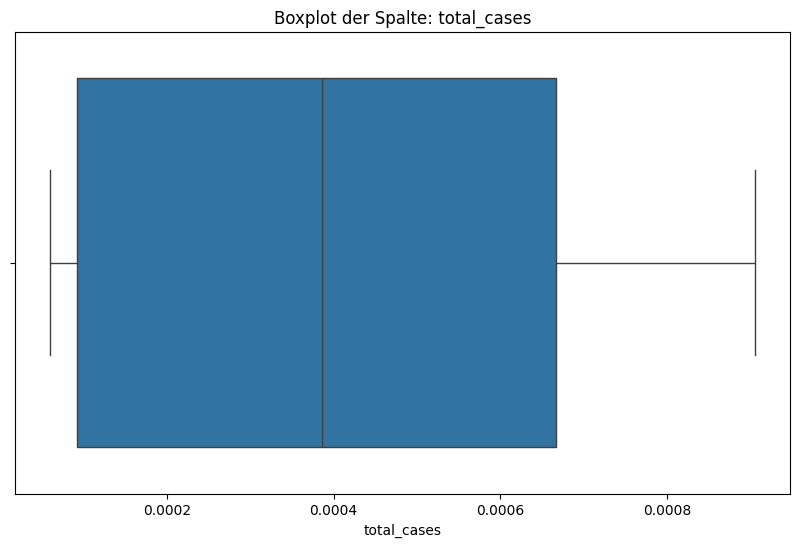

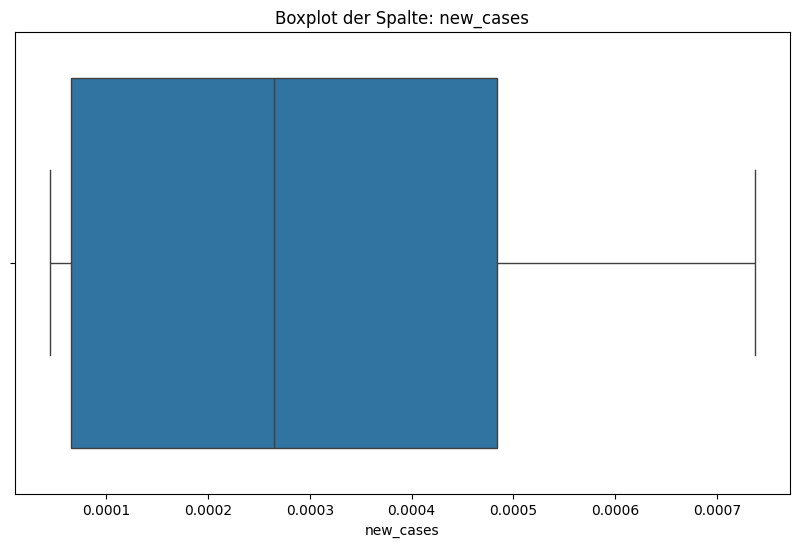

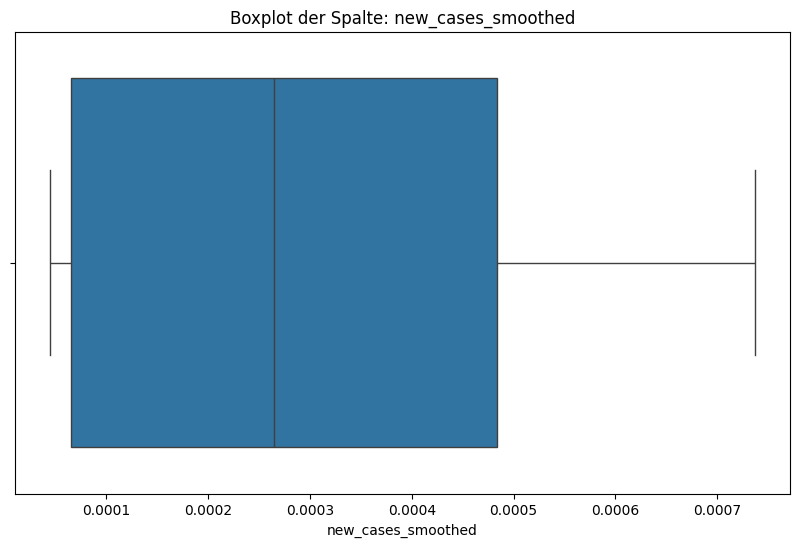

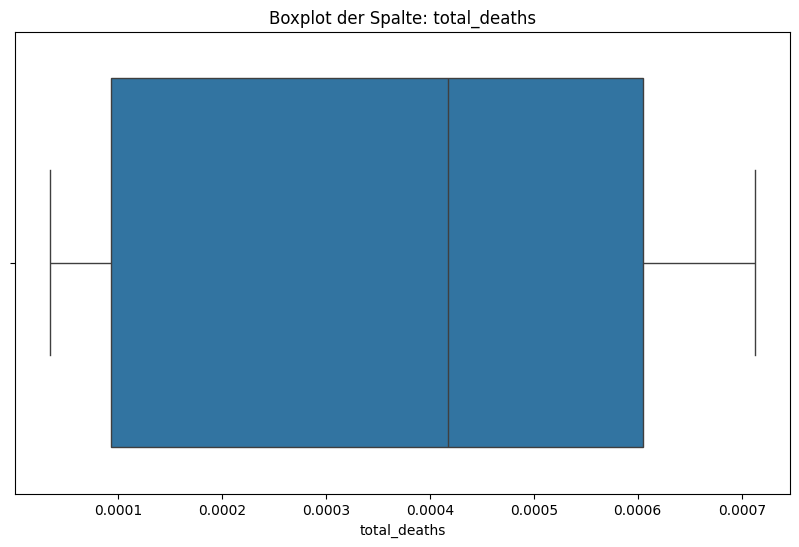

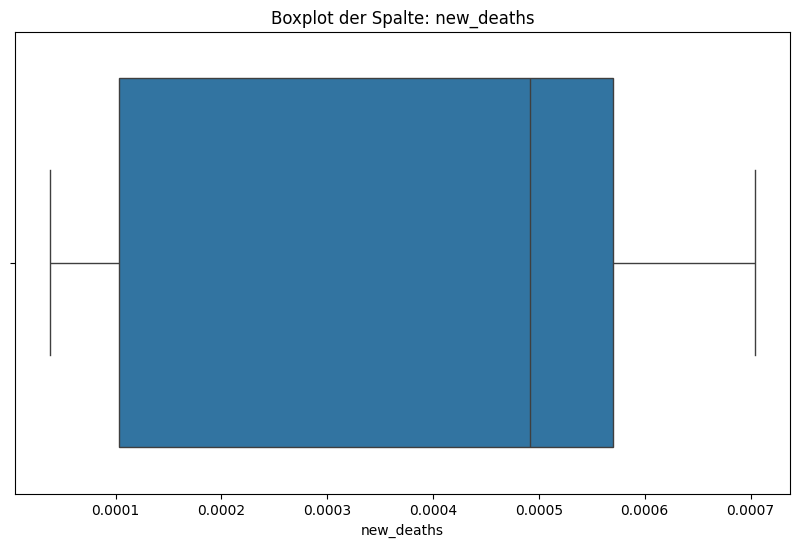

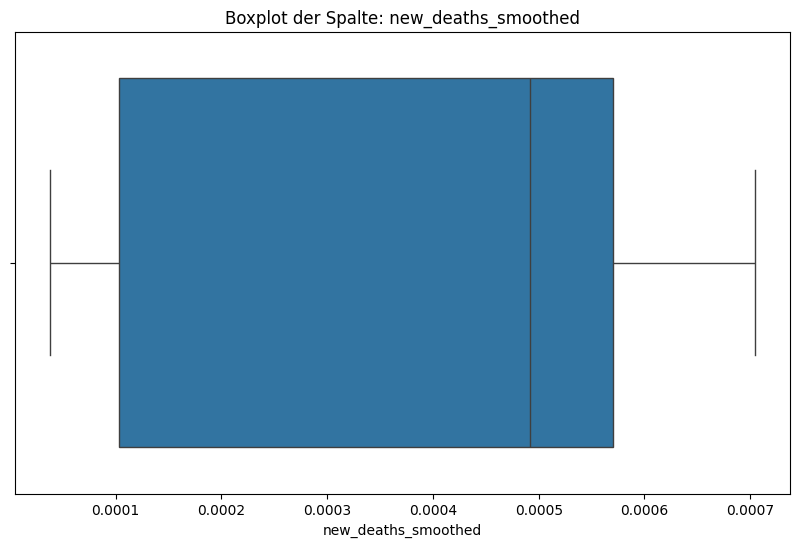

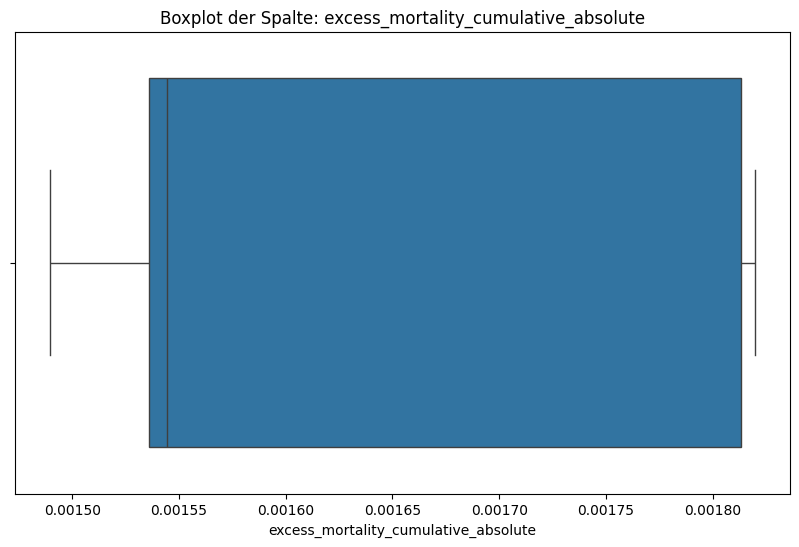

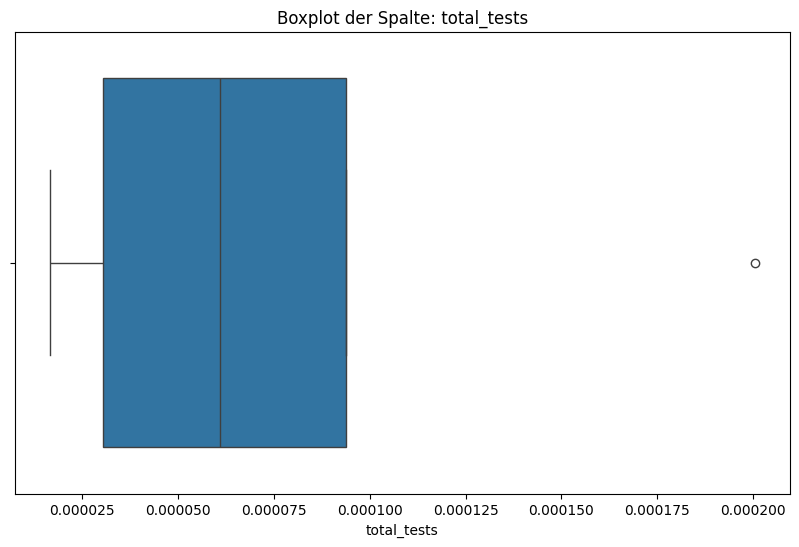

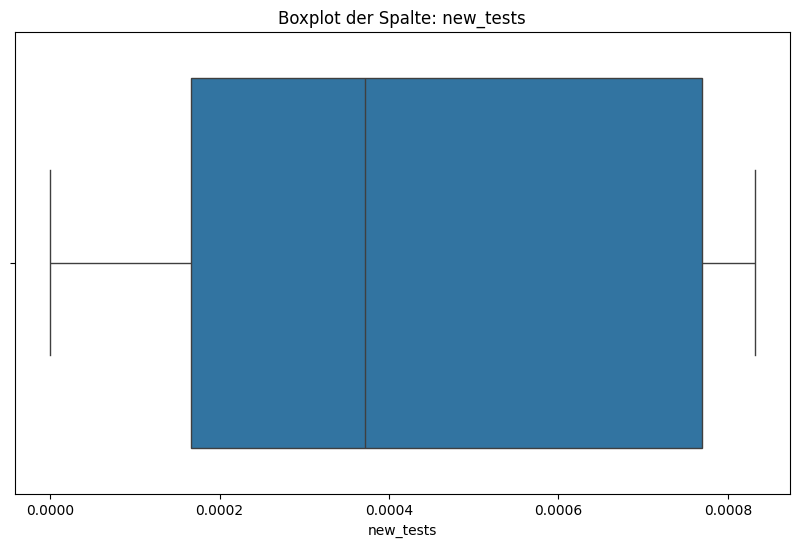

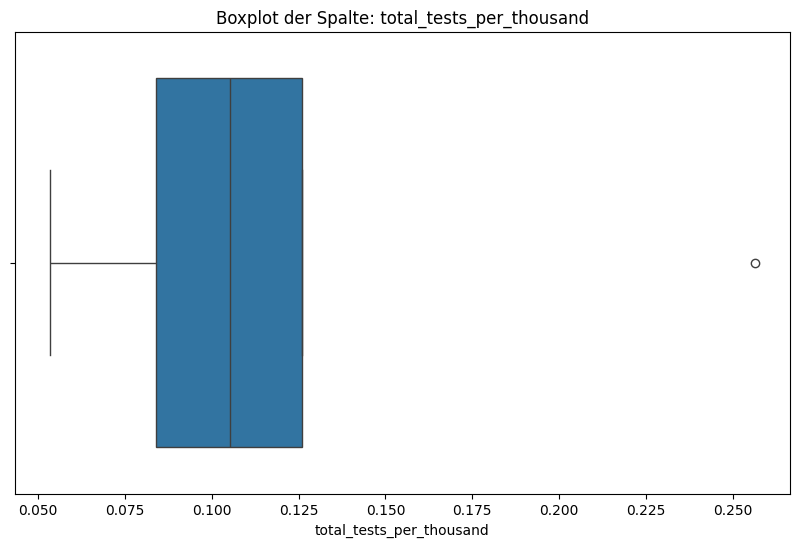

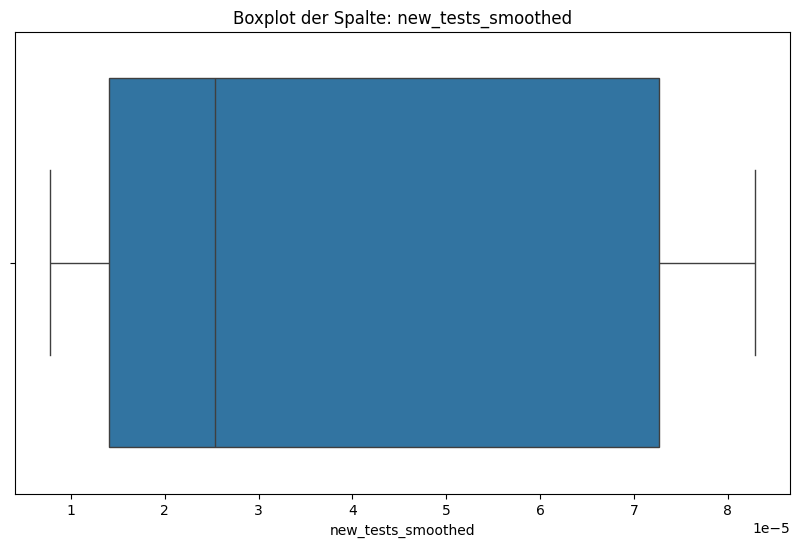

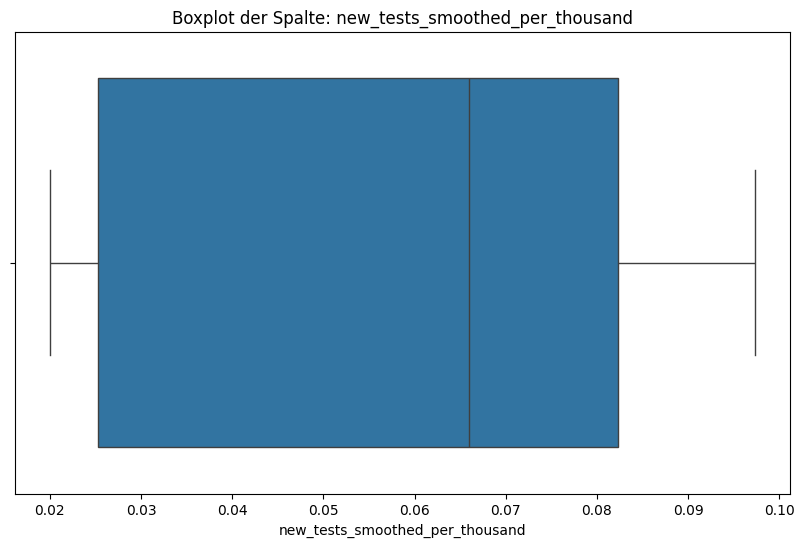

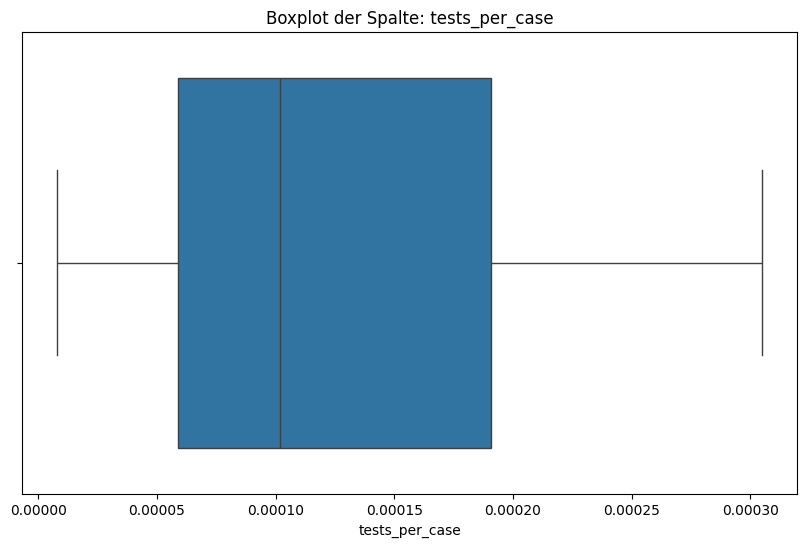

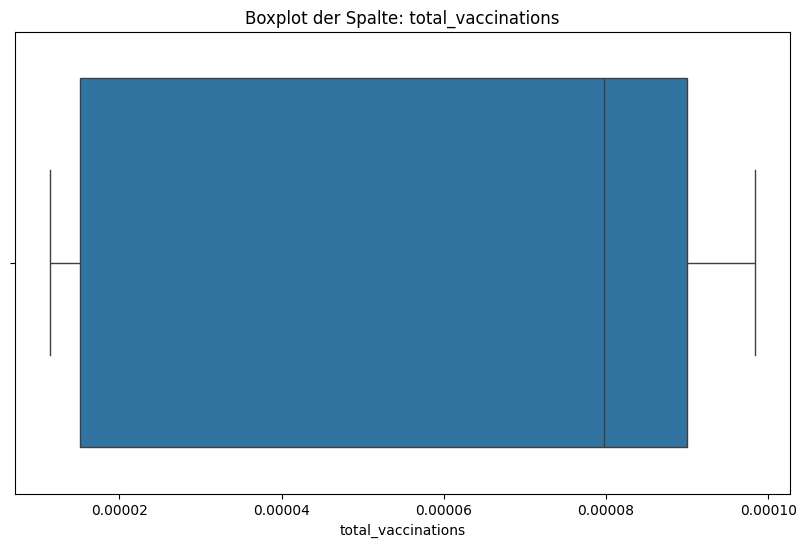

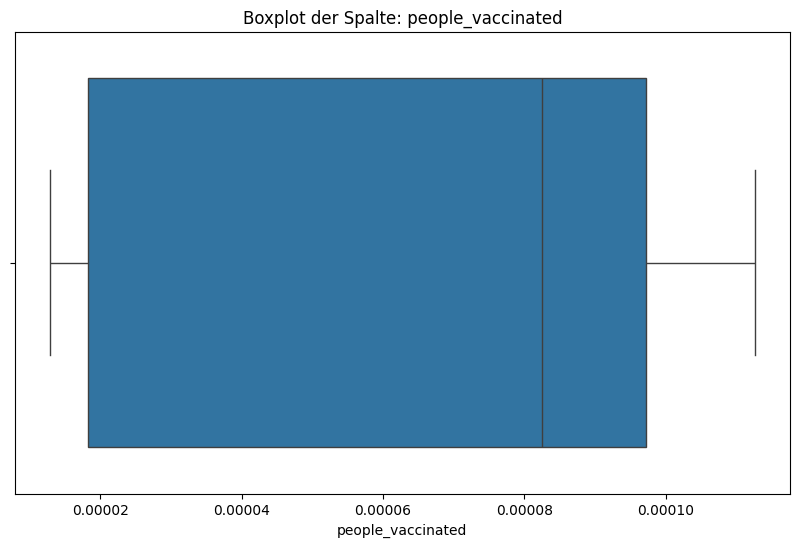

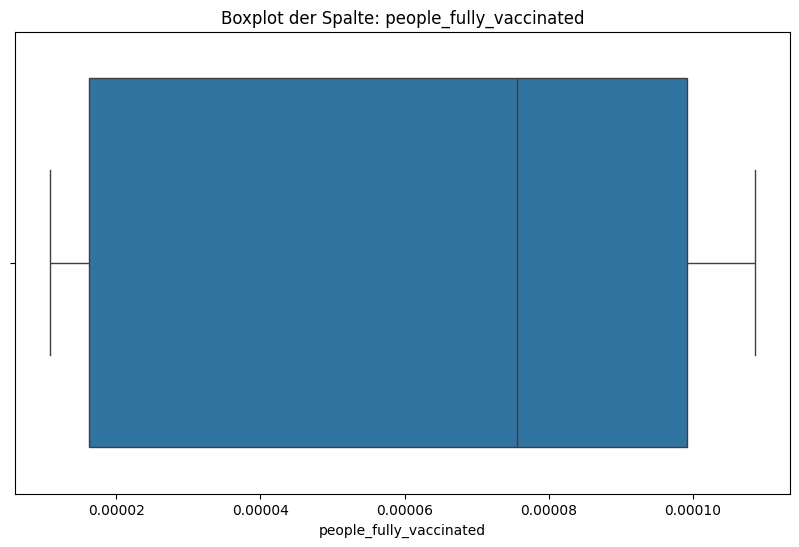

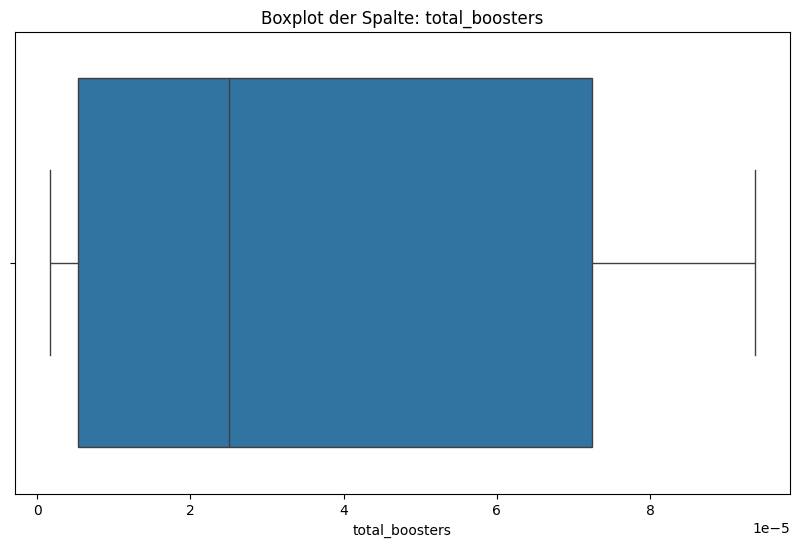

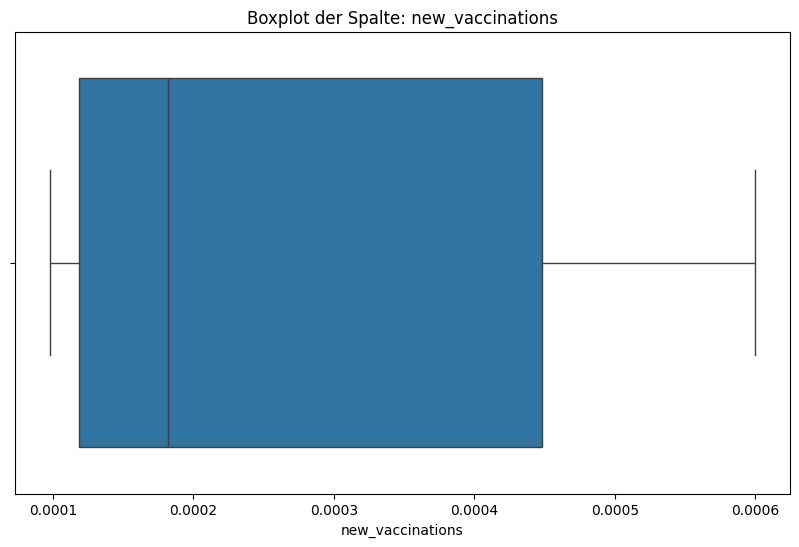

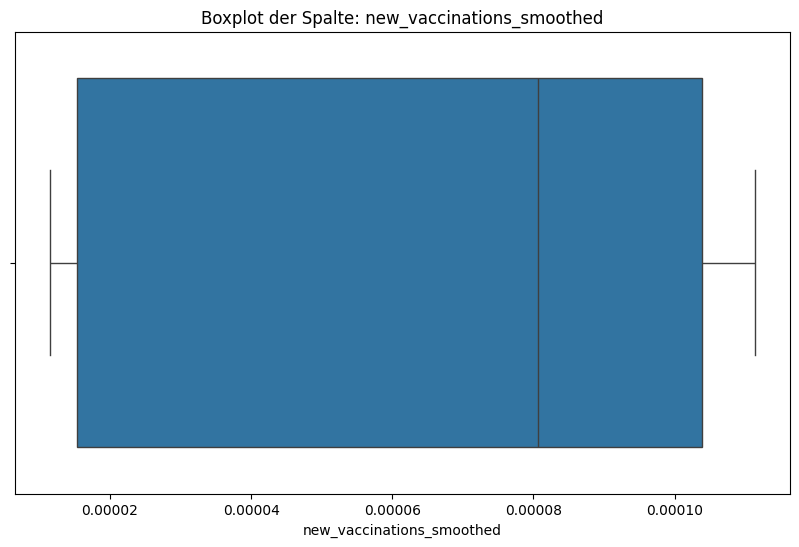

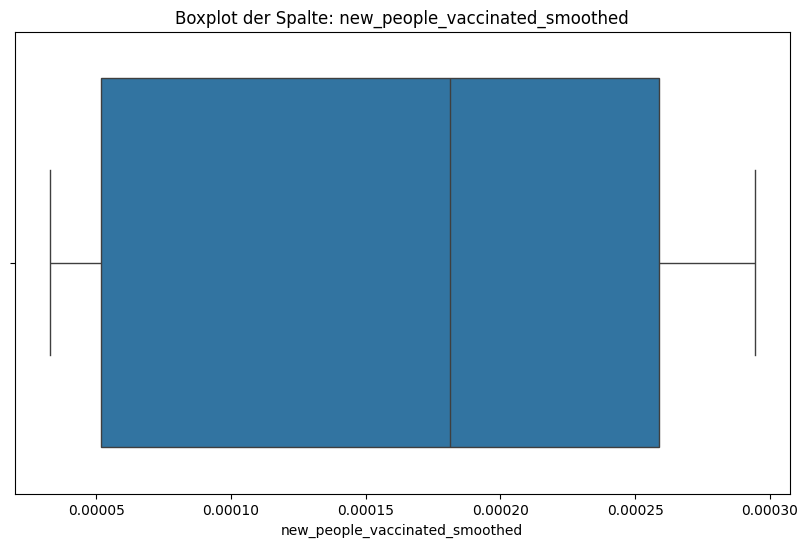

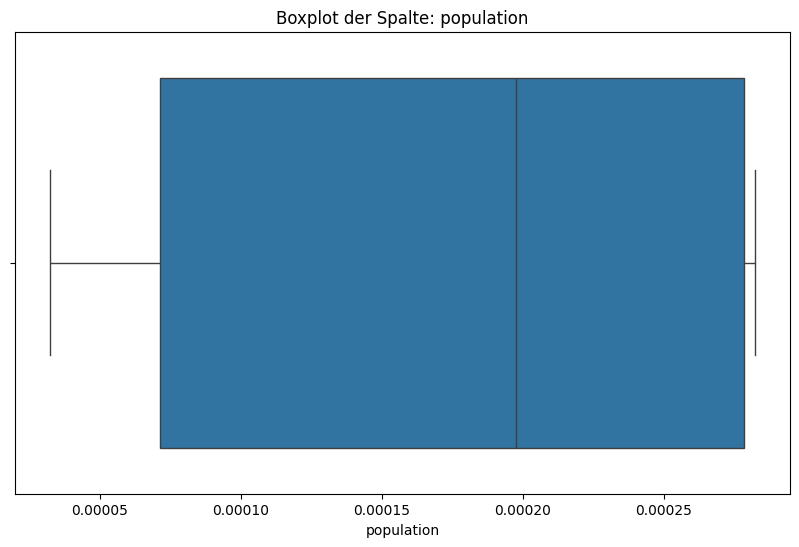

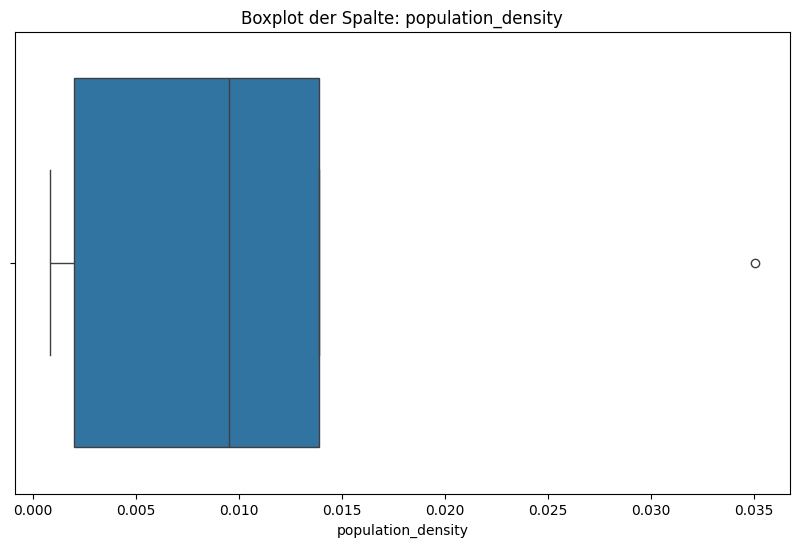

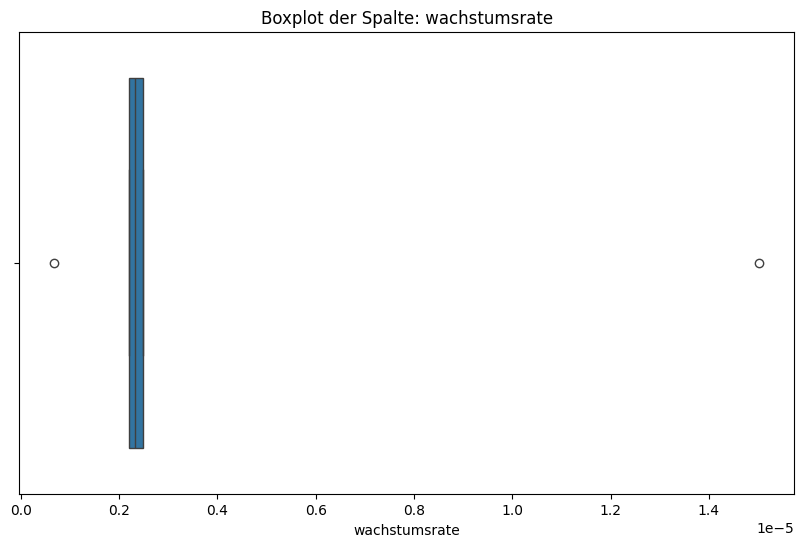

In [45]:
# Boxplots für jede numerische Spalte erstellen
for column in df_no_outliers_iqr.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_no_outliers_iqr[column])
    plt.title(f'Boxplot der Spalte: {column}')
    plt.xlabel(column)
    plt.show()

**Komplette Tabelle df_grouped2: Normalverteilung, Ausreißer entfernen und Boxplots**

Normalverteilung:

In [91]:
#Daten normalisieren 

# 1. mit Min-Max-Skalierung, um diese Daten zu normalisieren (um die Werte in einem vergleichbaren Bereich zu bringen)
# Min-Max-Skalierung, da die Daten nicht Normalverteilt sind
#from sklearn.preprocessing import MinMaxScaler

# Min-Max-Skalierer initialisieren
scaler2 = MinMaxScaler()

# Nur numerische Spalten auswählen
numeric_cols2 = df_grouped2.select_dtypes(include='number').columns

# Min-Max-Skalierung anwenden
df_minmax2 = df_grouped2.copy()
df_minmax2[numeric_cols2] = scaler.fit_transform(df_grouped2[numeric_cols2])

# Ergebnis anzeigen
df_minmax2.head()



/Users/alexandrapromper/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/alexandrapromper/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,country,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index,inzidenzrate_pro_100000,todesrate,wachstumsrate,anteil_geimpfter,aktive_faelle
0,Afghanistan,0.002318,0.001593,0.001593,0.008393,0.006553,0.006551,0.007237,0.006631,0.006633,...,NaN,0.329966,0.463697,0.006667,0.139693,0.008393,0.204532,NaN,0.089102,NaN
1,Albania,0.003350,0.002284,0.002283,0.184569,0.142120,0.142077,0.003295,0.002991,0.002992,...,0.000264,0.306397,NaN,0.191852,0.696763,0.184569,0.064451,0.000067,0.161308,NaN
2,Algeria,0.003004,0.001844,0.001843,0.009786,0.006778,0.006776,0.006405,0.005705,0.005707,...,0.000000,0.202020,0.842627,0.118519,0.621806,0.009786,0.139726,0.000038,0.075990,NaN
3,Andorra,0.000463,0.000325,0.000325,0.906897,0.719296,0.719083,0.000158,0.000132,0.000132,...,NaN,0.289562,NaN,NaN,0.858603,0.906897,0.022309,0.000008,0.373389,NaN
4,Angola,0.001077,0.000728,0.000728,0.004189,0.003231,0.003230,0.001698,0.001606,0.001606,...,0.385507,0.117845,0.244967,NaN,0.359455,0.004189,0.103275,0.000105,0.120452,NaN


In [90]:
#Ausreißer entfernen

# Interquartilsabstand (IQR)

# Funktion zur Berechnung und Entfernung von Ausreißern mit IQR
def remove_outliers_iqr(df_minmax2, cols):
    df_filtered2 = df_minmax2.copy()
    for col in cols:
        Q1 = df_filtered2[col].quantile(0.25)
        Q3 = df_filtered2[col].quantile(0.75)
        IQR = Q3 - Q1
        # Filter: Werte innerhalb des IQR-Bereichs behalten
        df_filtered2 = df_filtered2[(df_filtered2[col] >= (Q1 - 1.5 * IQR)) & 
                                  (df_filtered2[col] <= (Q3 + 1.5 * IQR))]
    return df_filtered2

# Ausreißer entfernen
df_no_outliers_iqr2 = remove_outliers_iqr(df_minmax2, numeric_cols2)

# Ergebnis anzeigen
df_no_outliers_iqr2.head()


,country,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index,inzidenzrate_pro_100000,todesrate,wachstumsrate,anteil_geimpfter,aktive_faelle


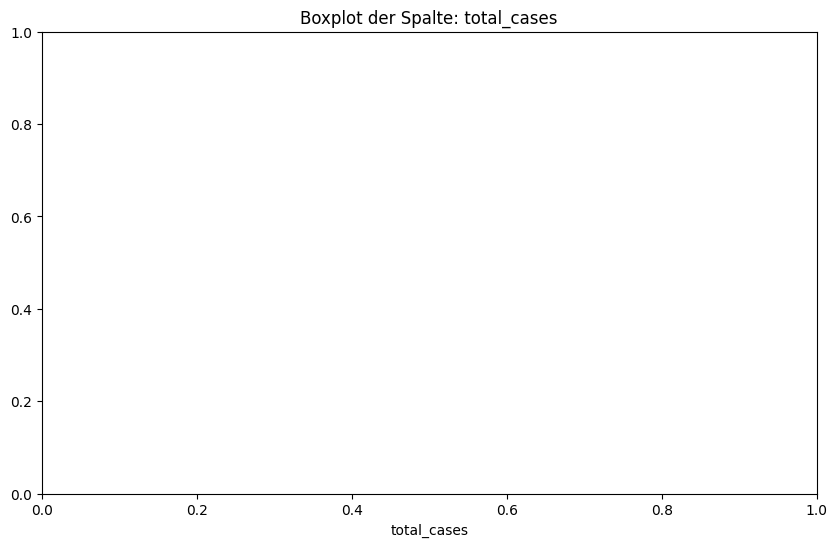

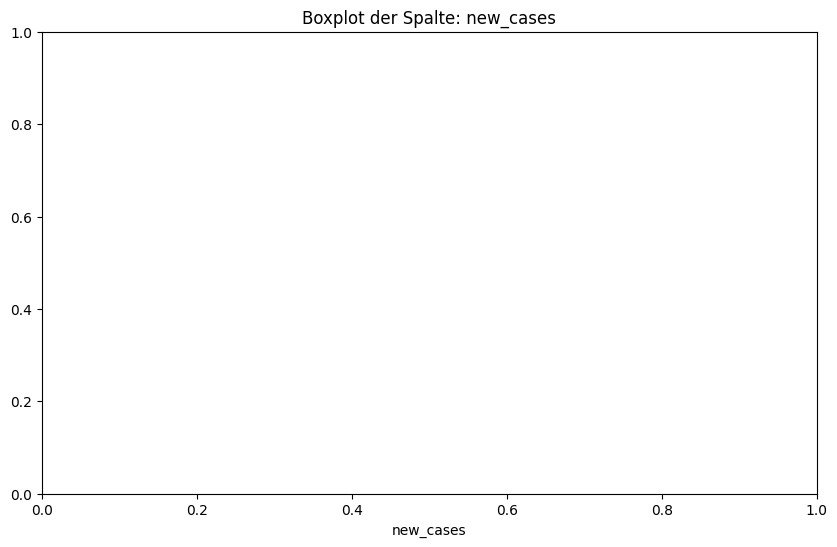

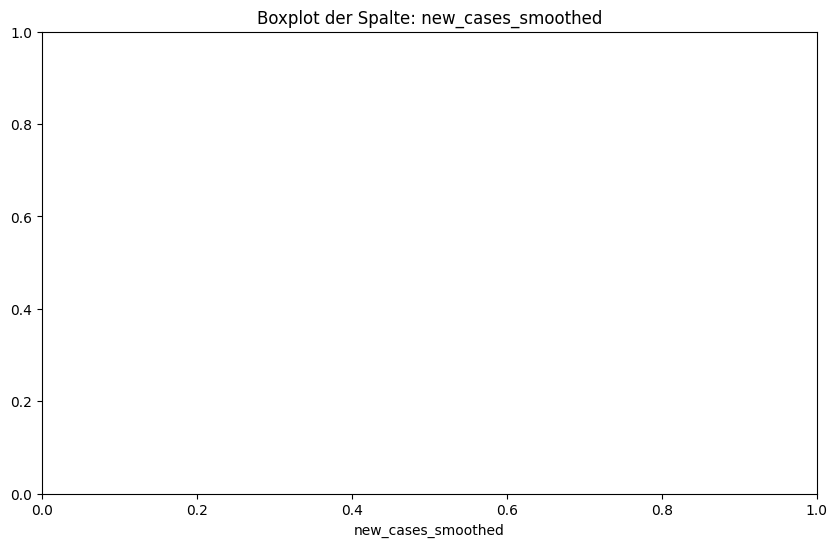

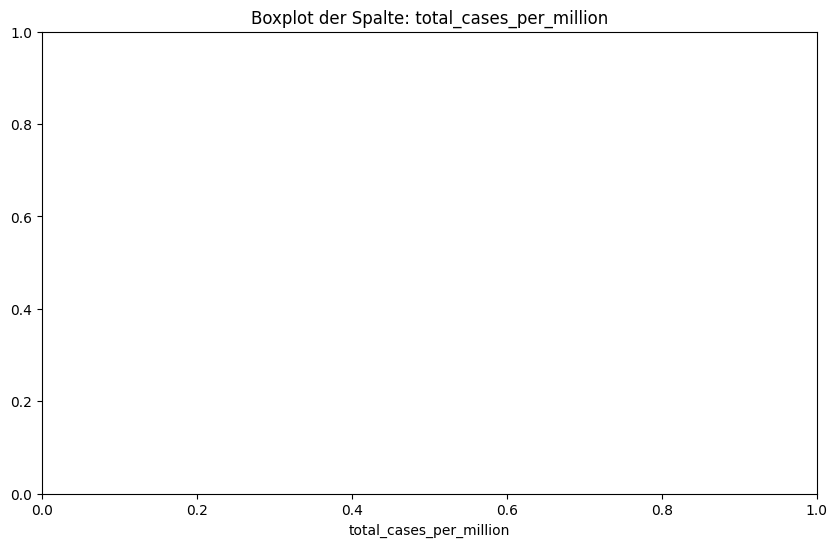

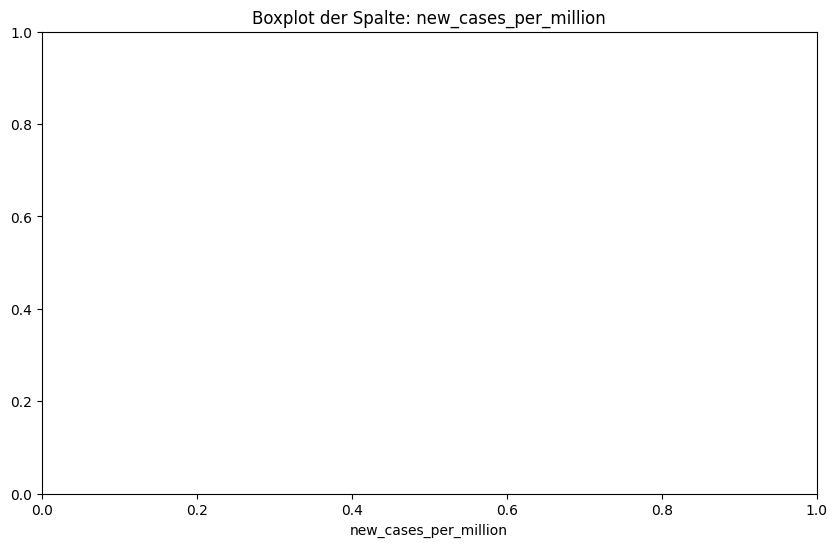

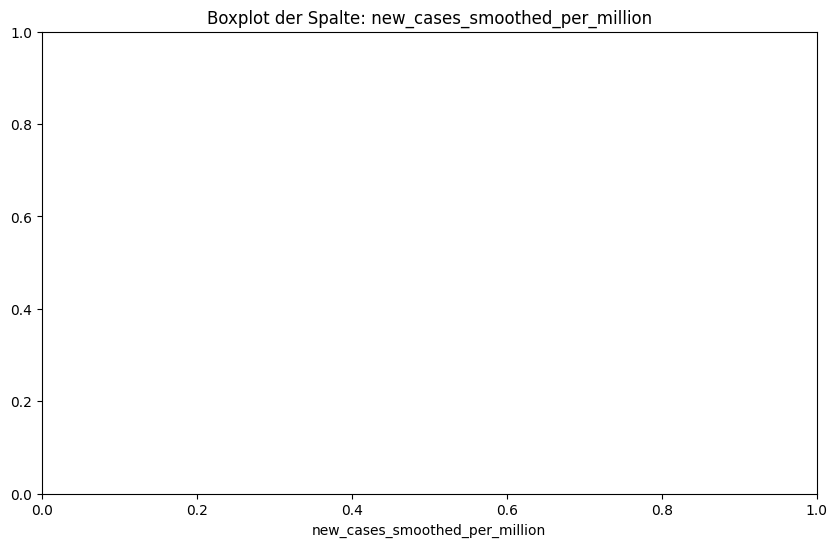

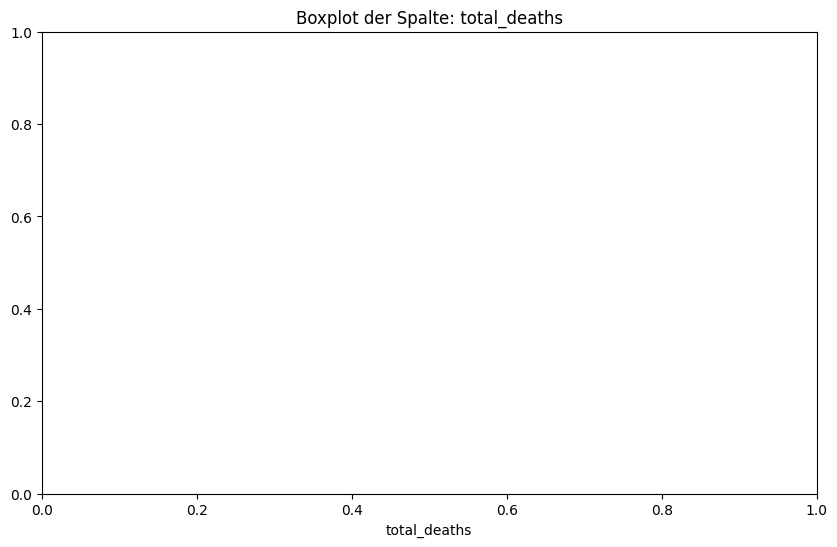

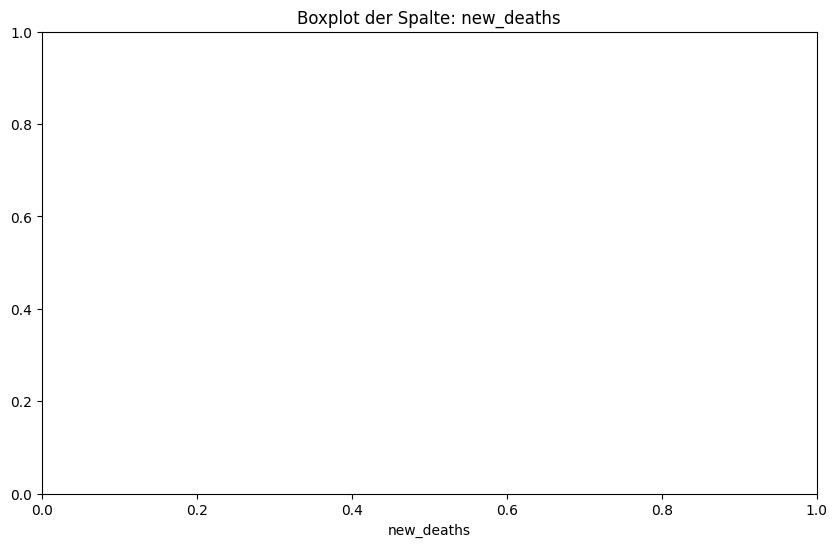

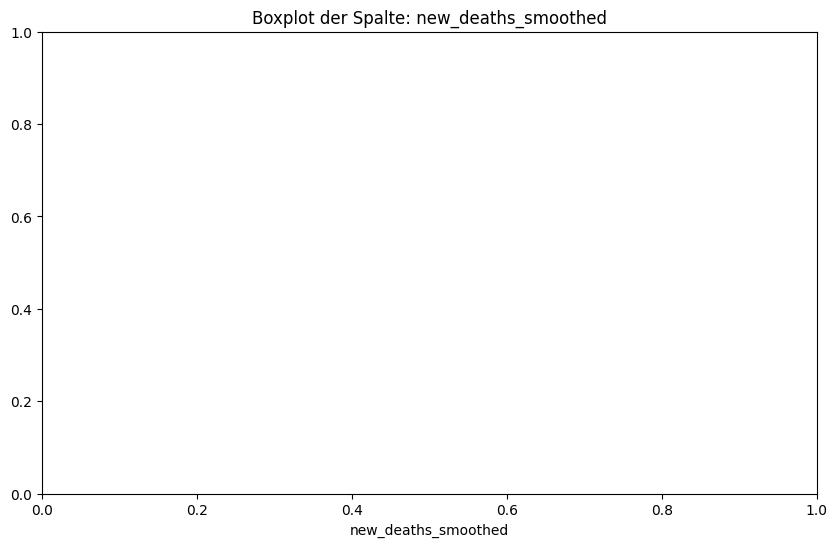

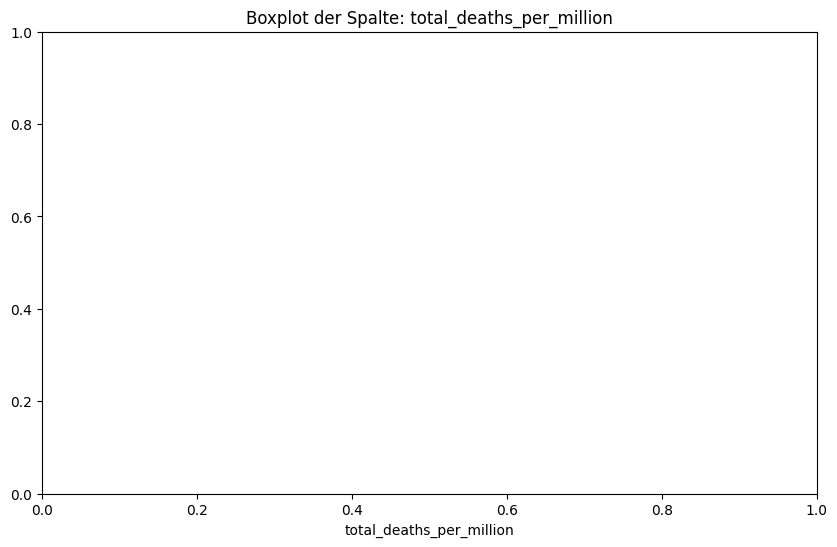

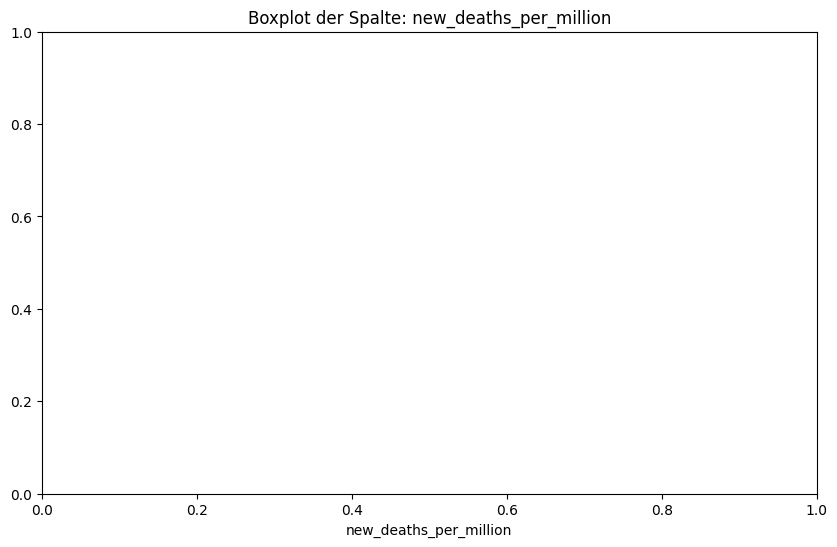

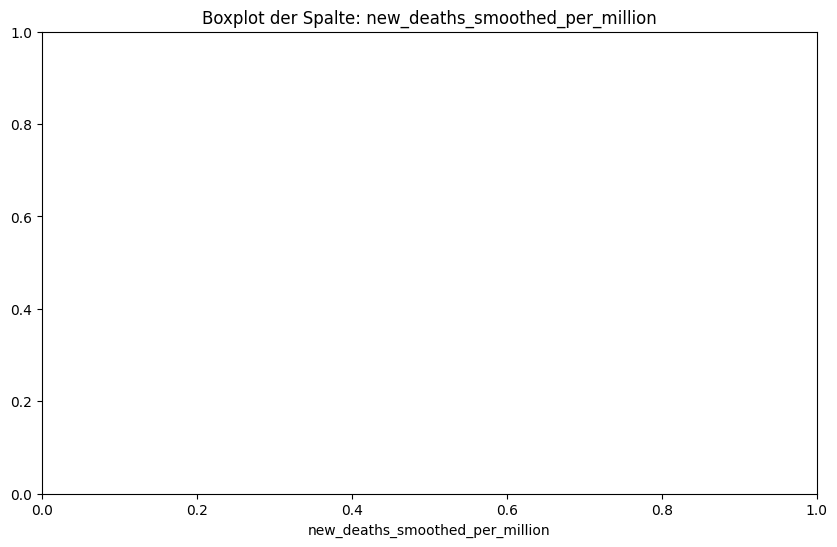

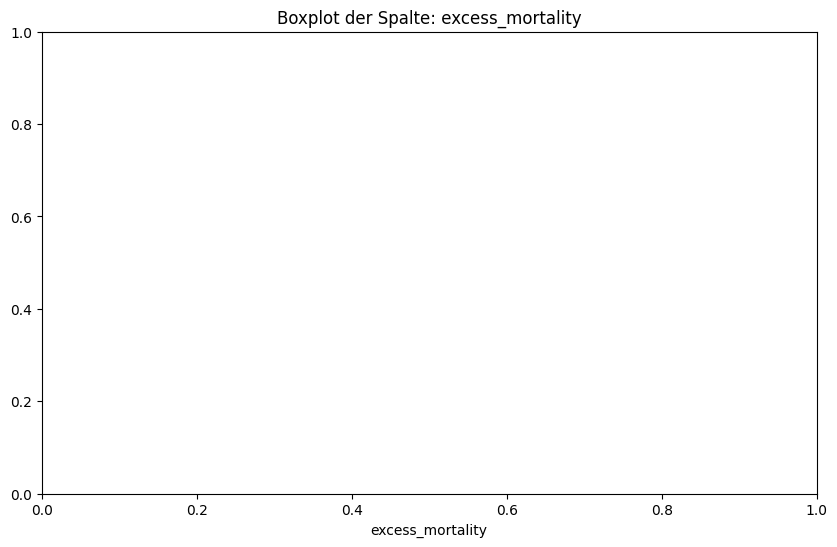

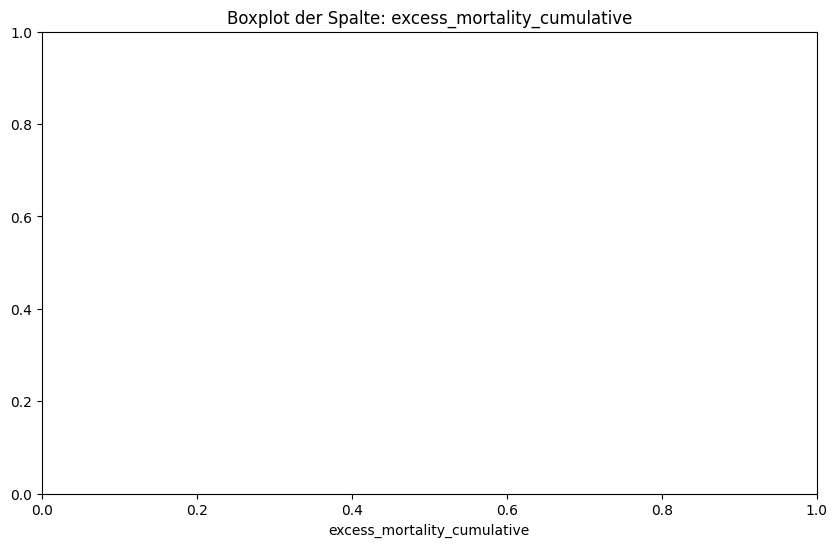

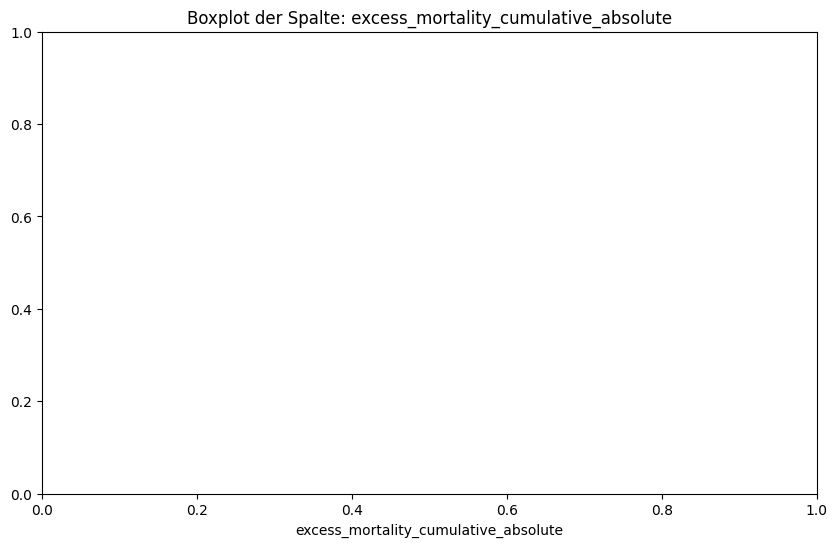

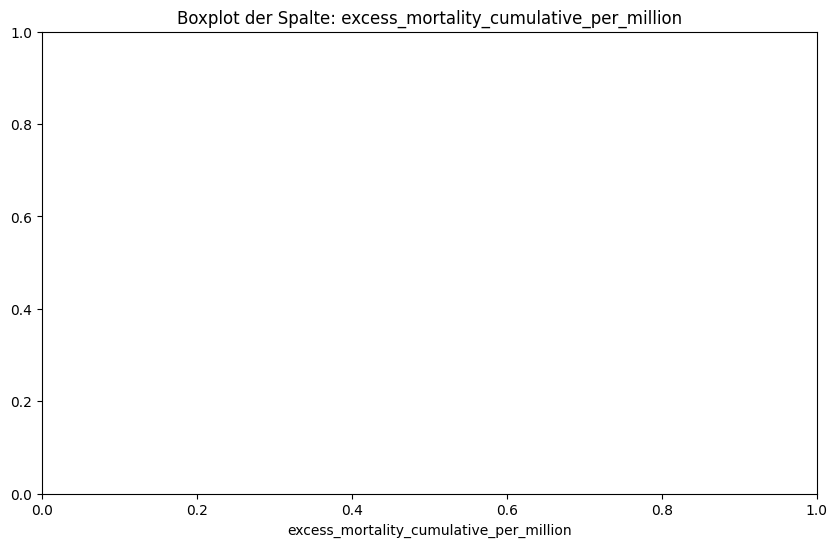

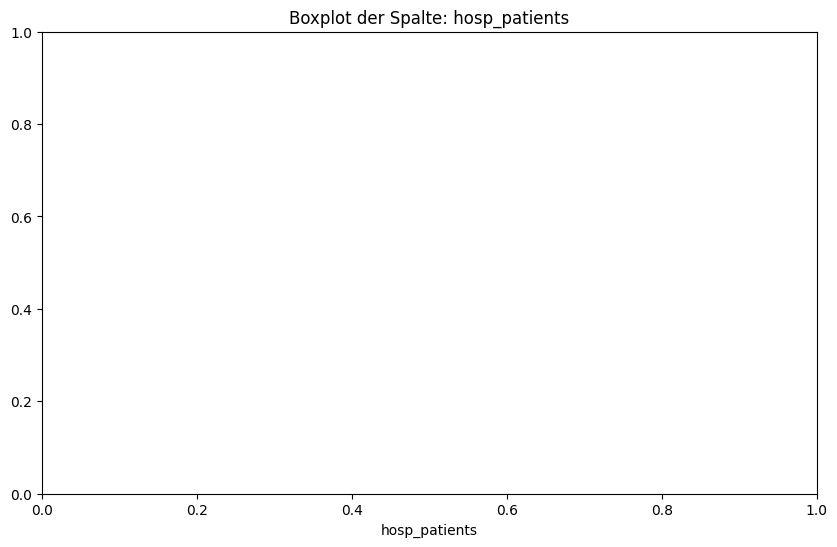

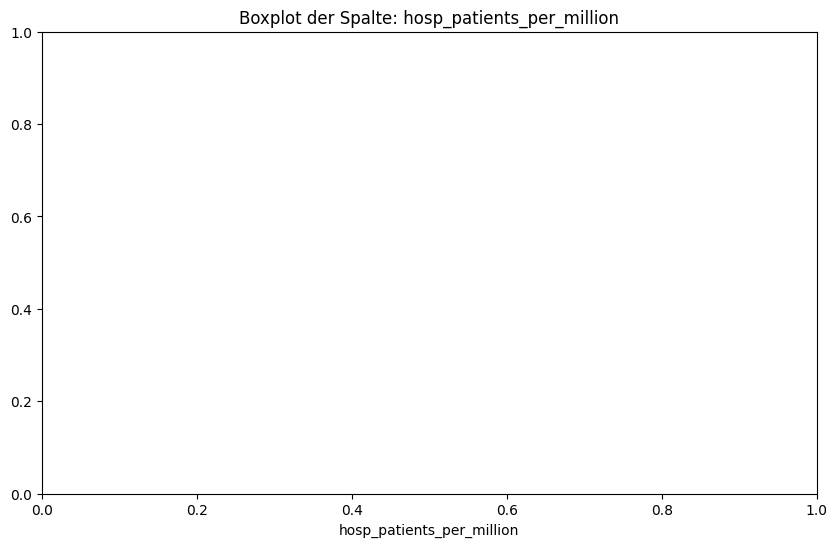

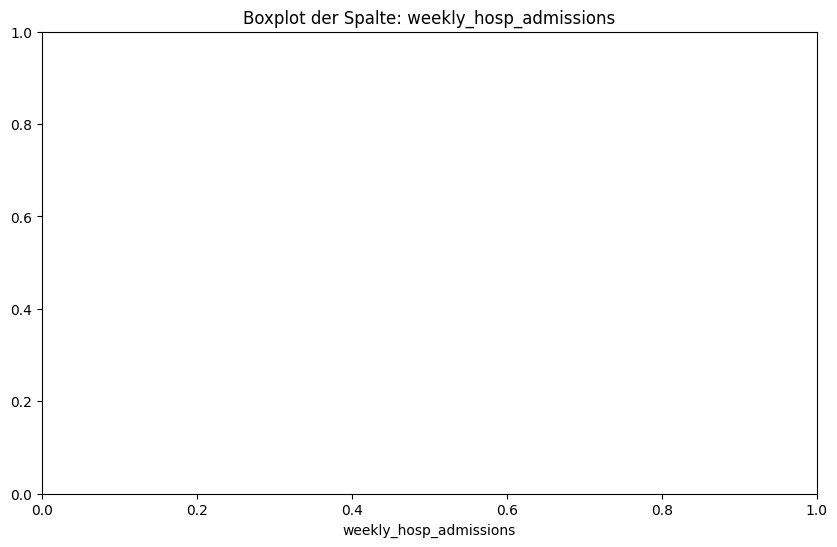

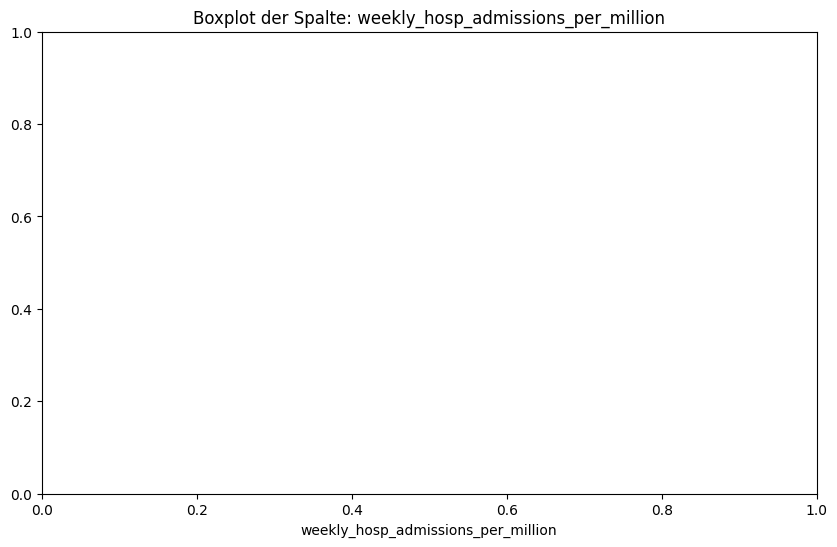

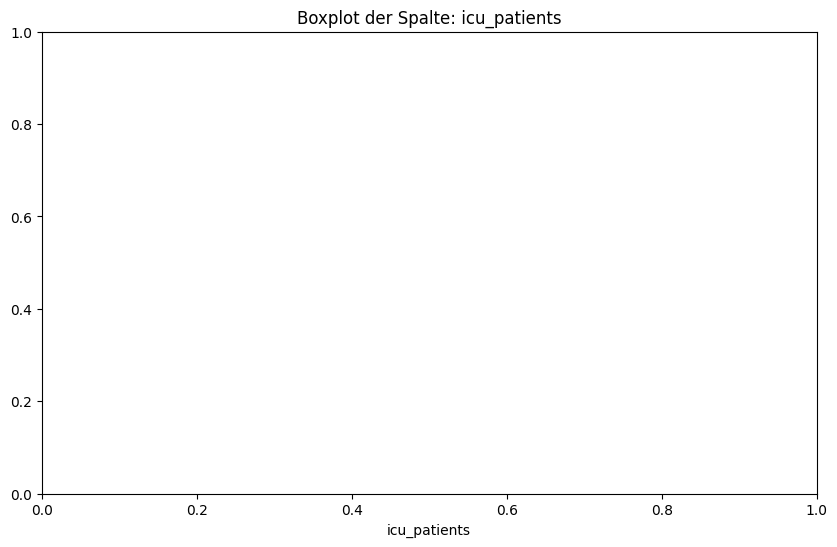

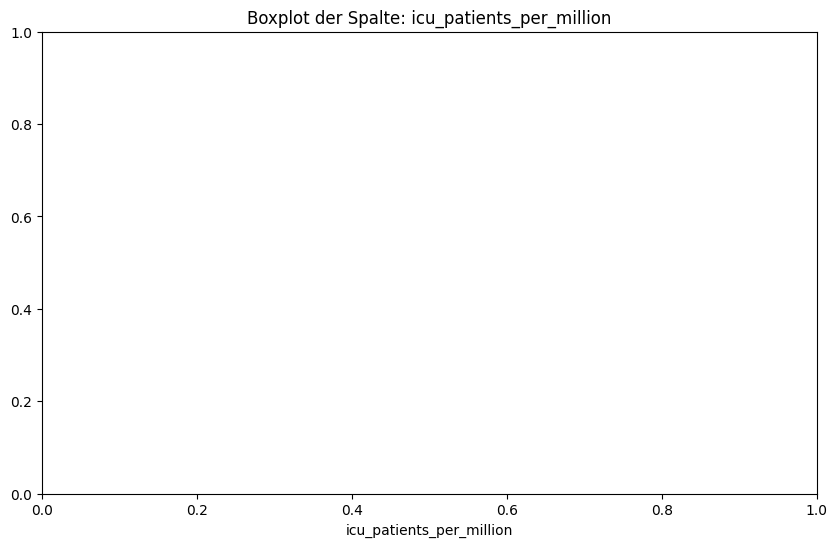

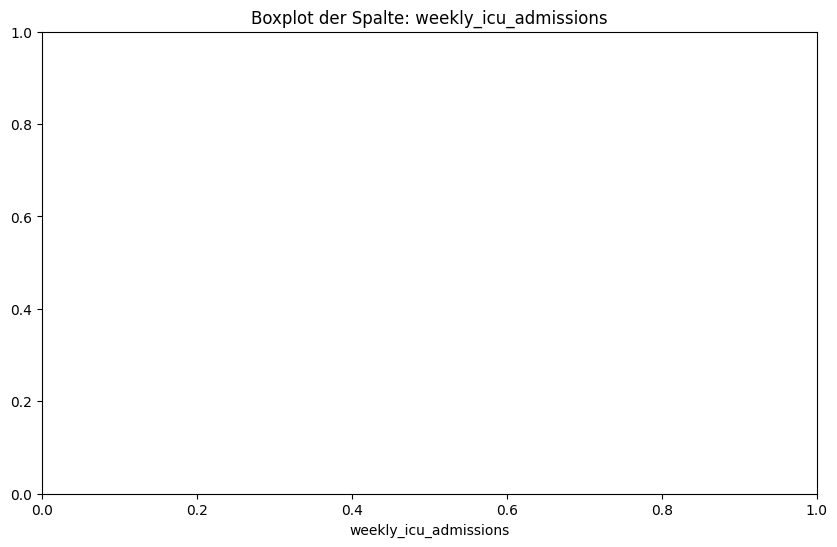

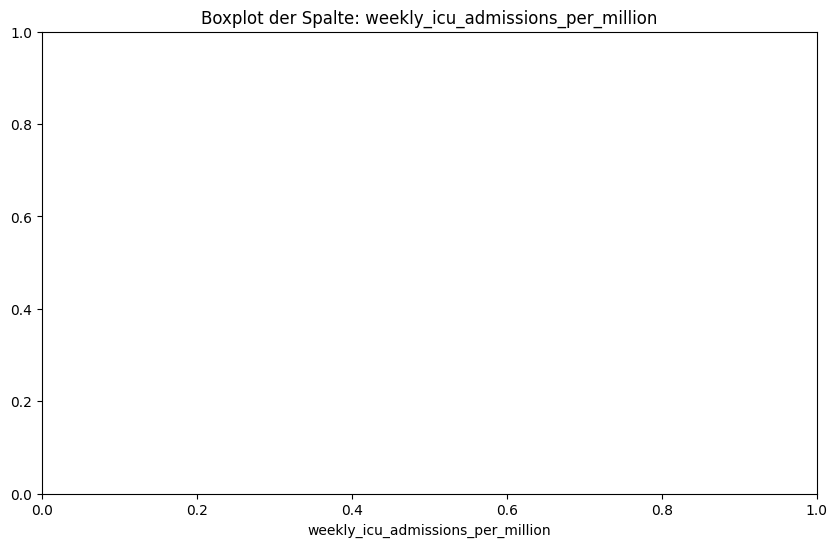

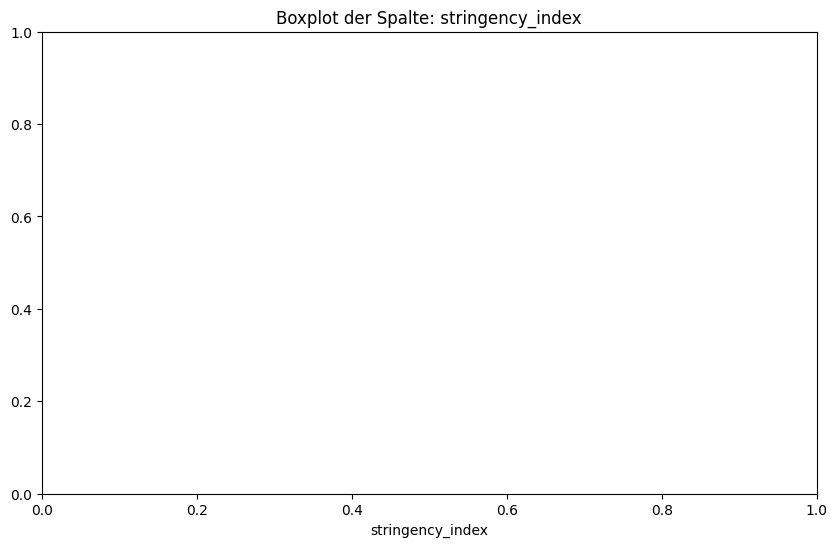

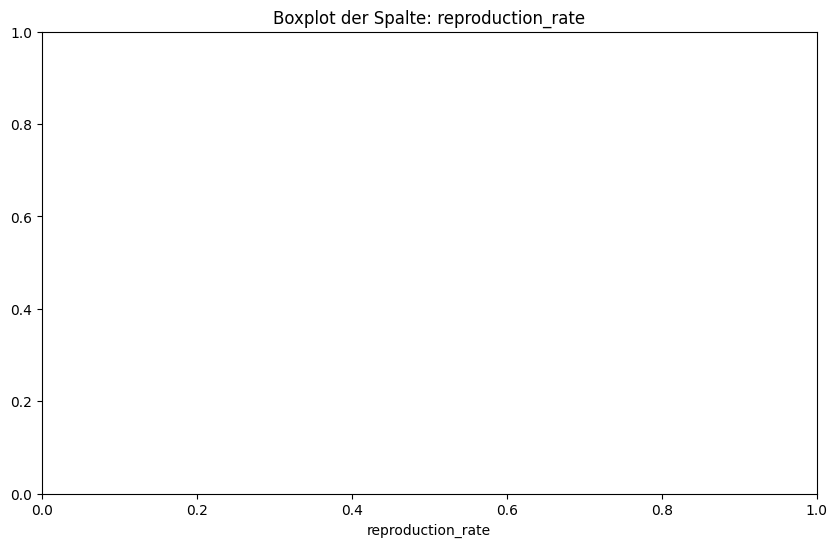

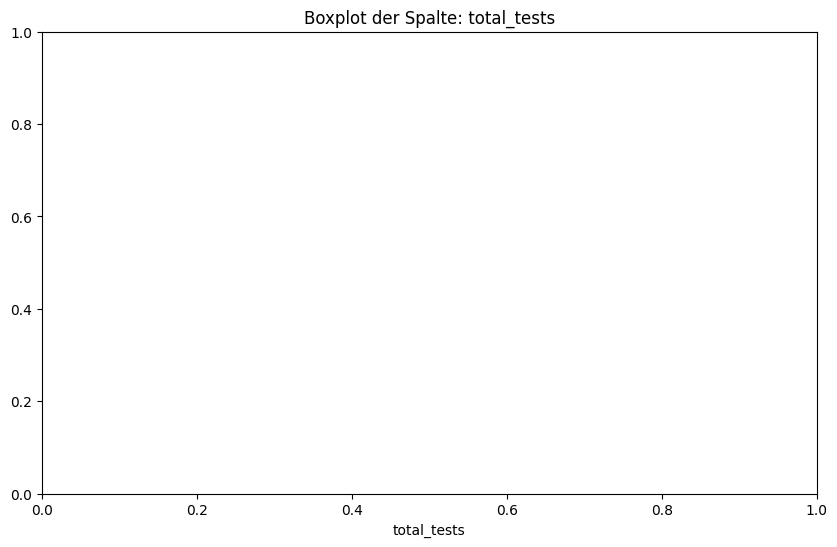

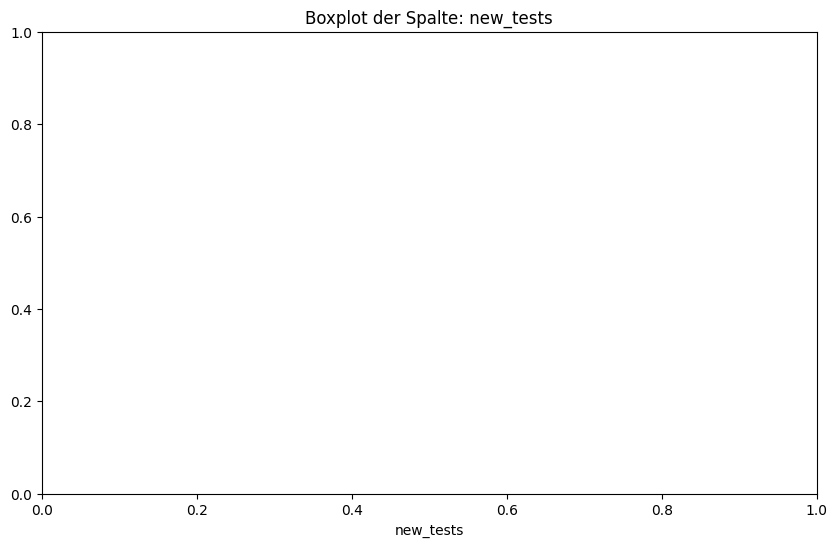

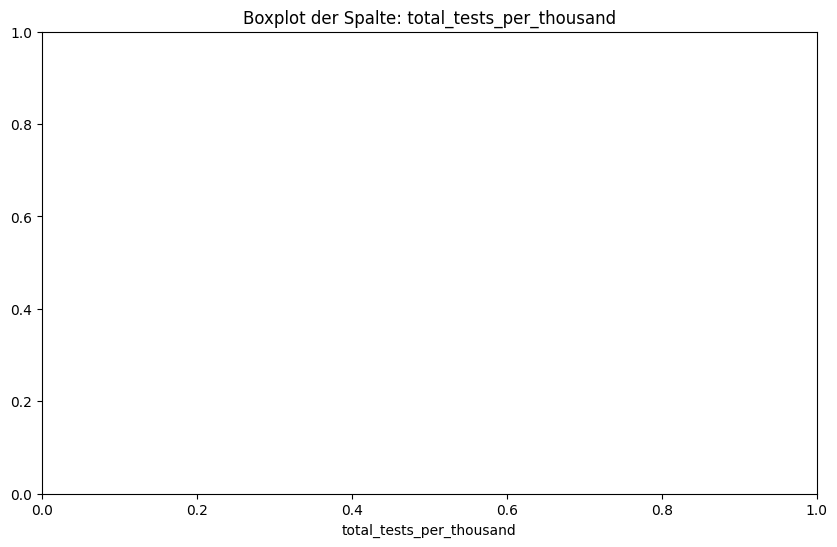

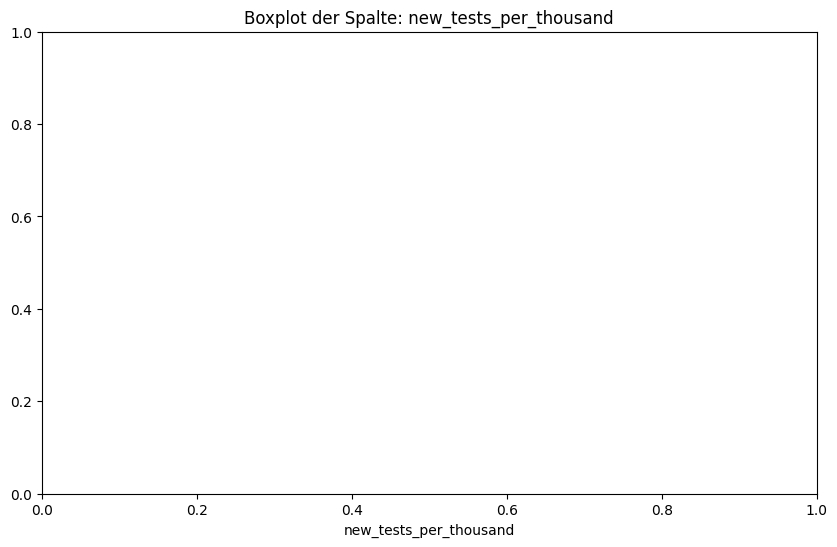

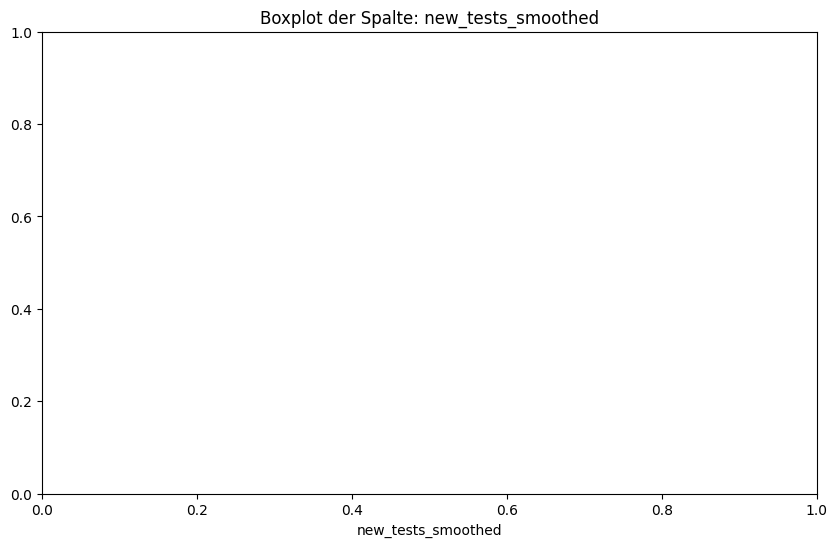

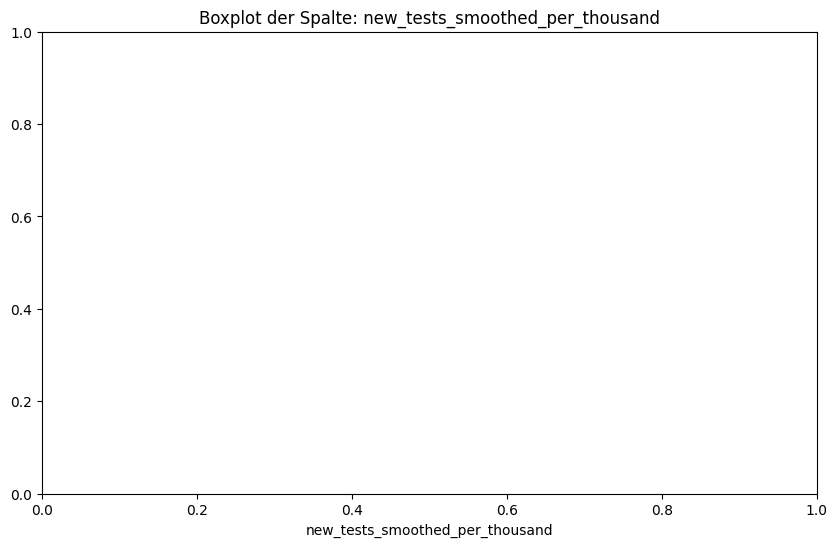

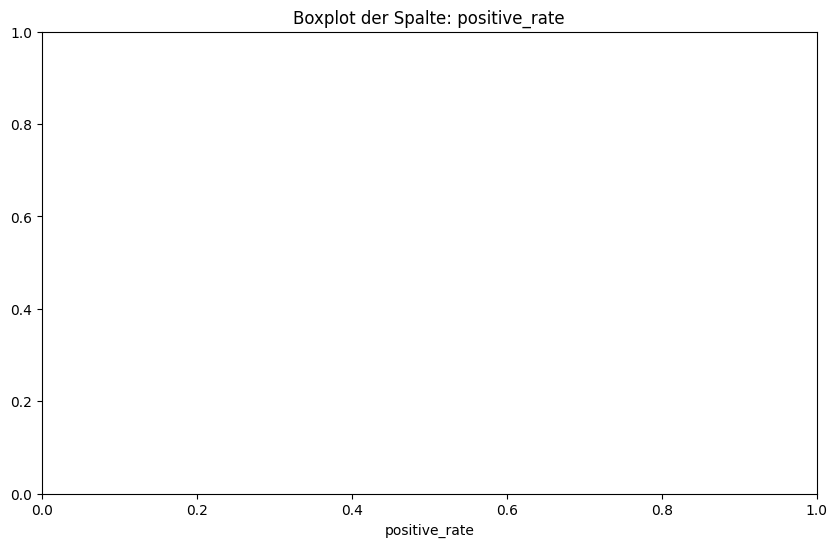

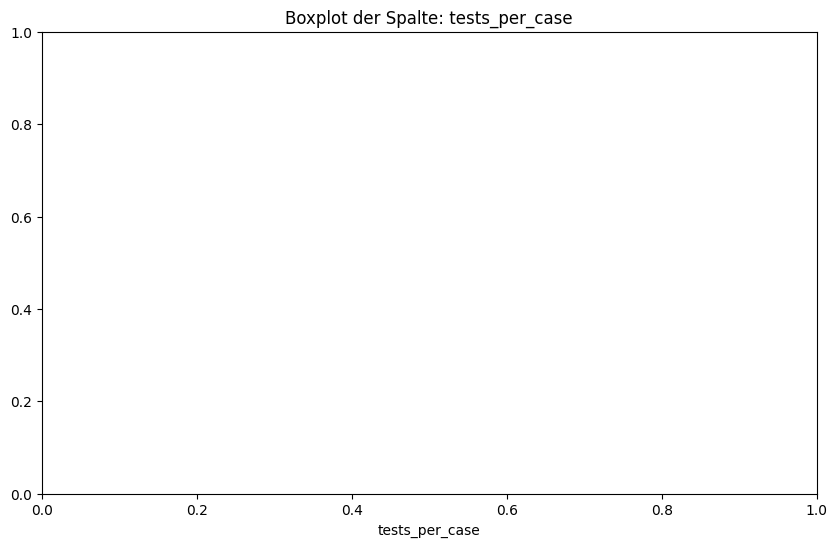

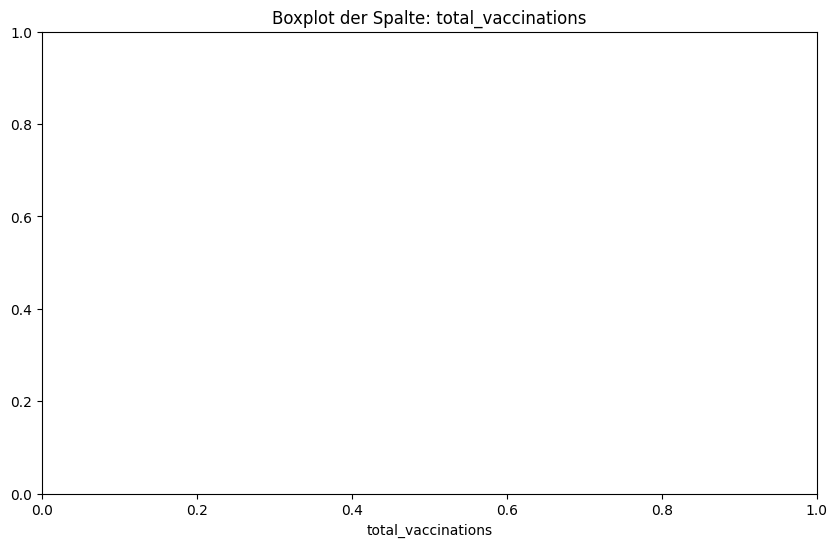

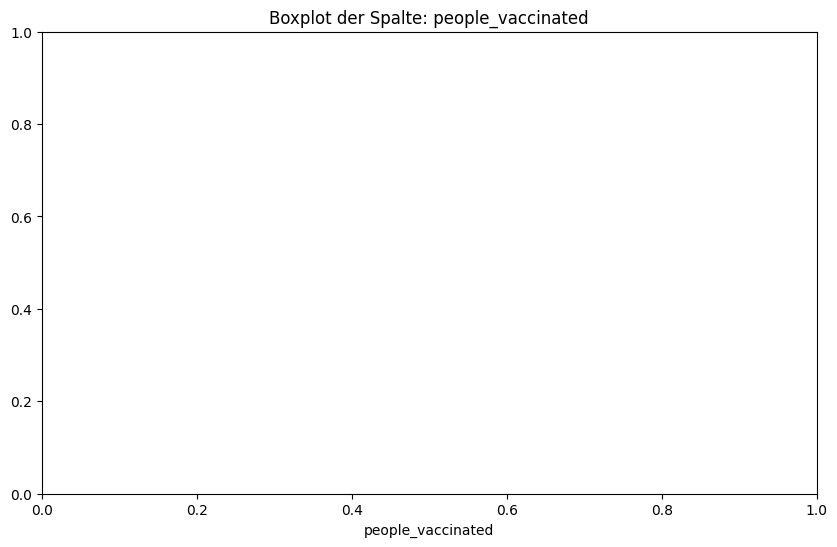

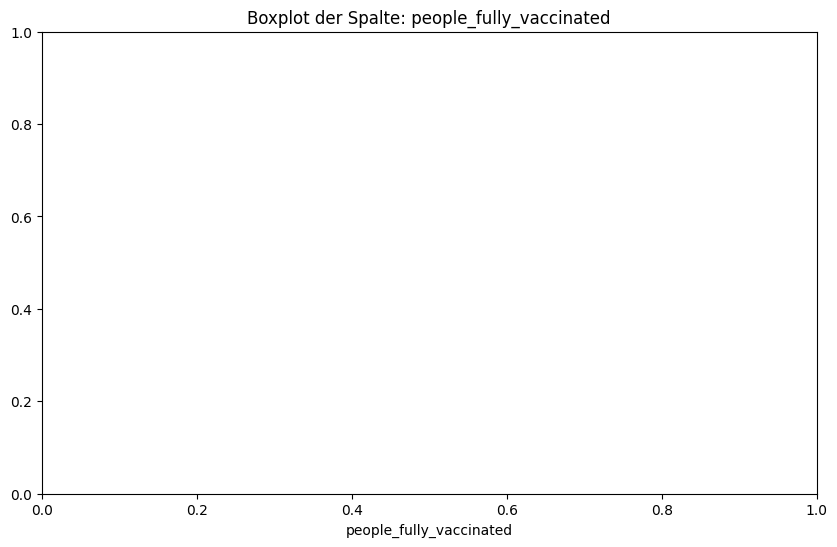

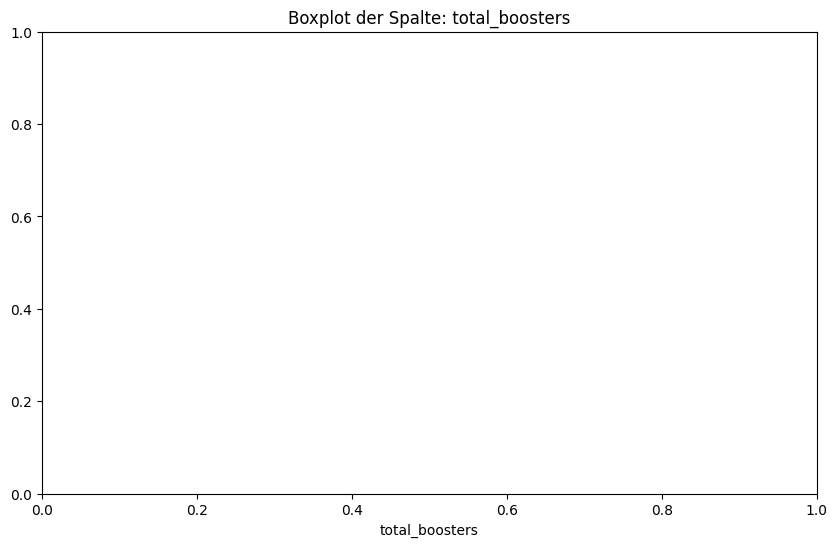

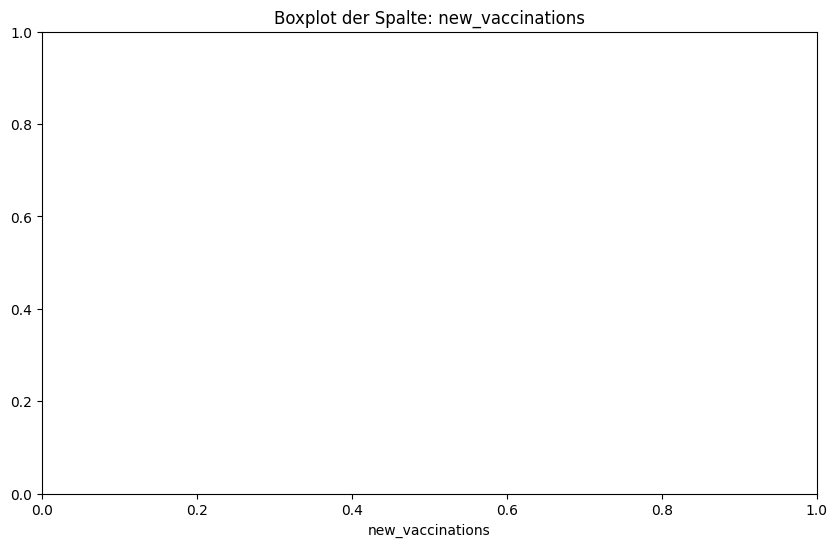

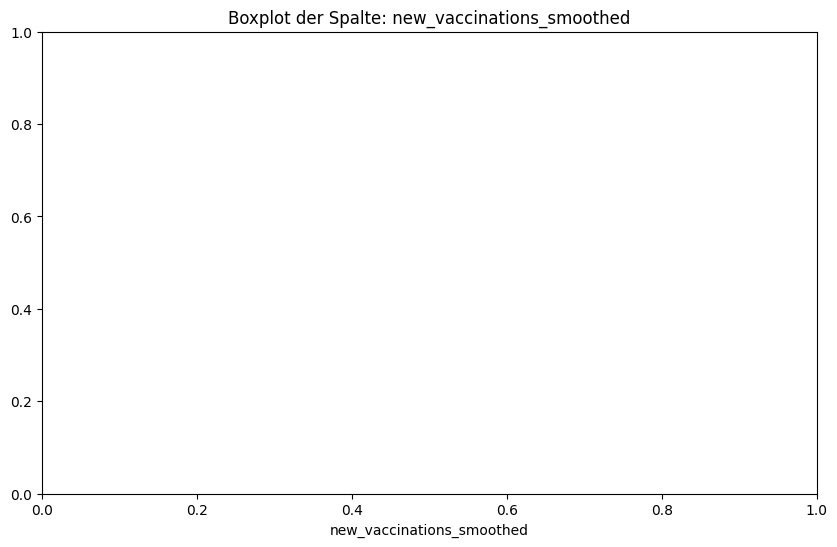

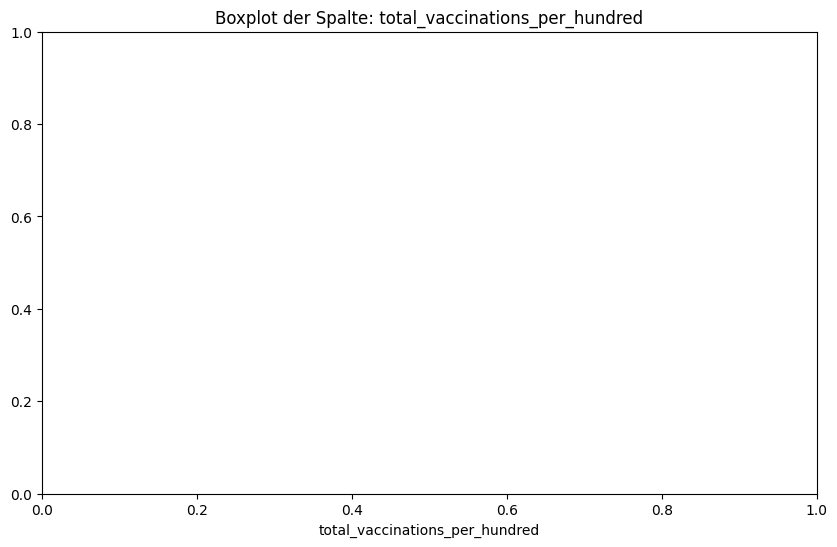

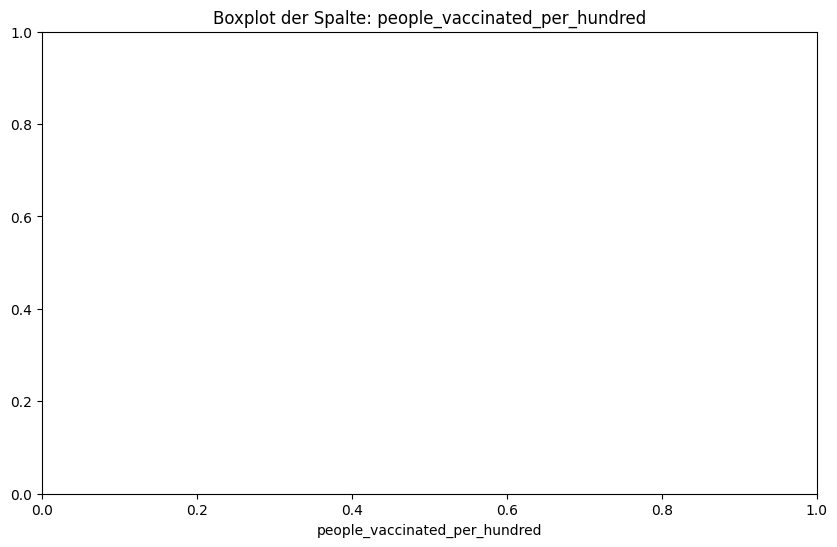

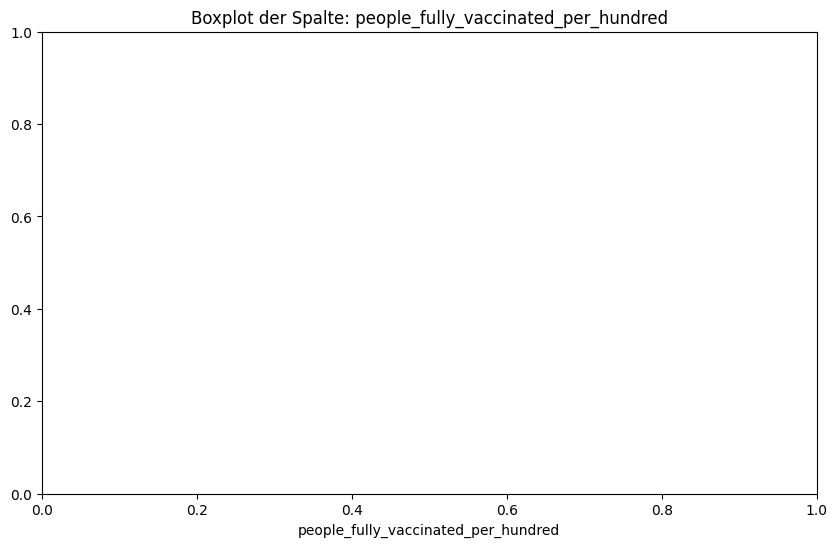

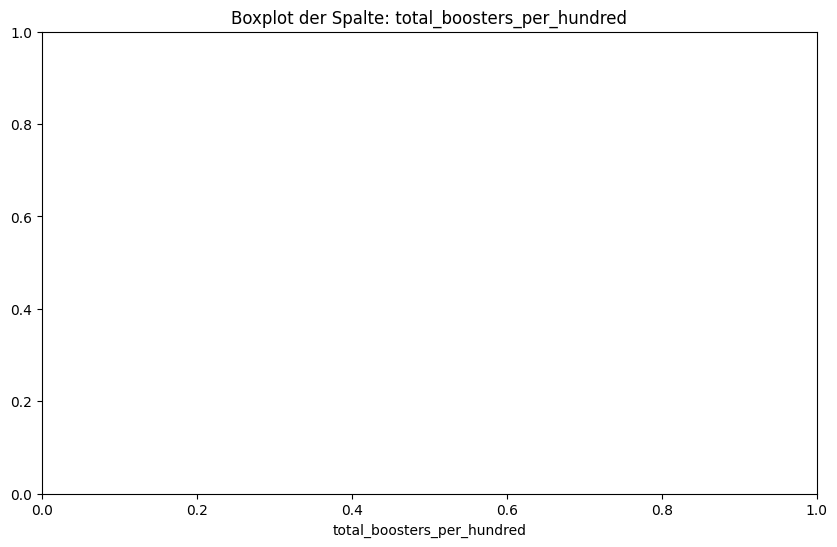

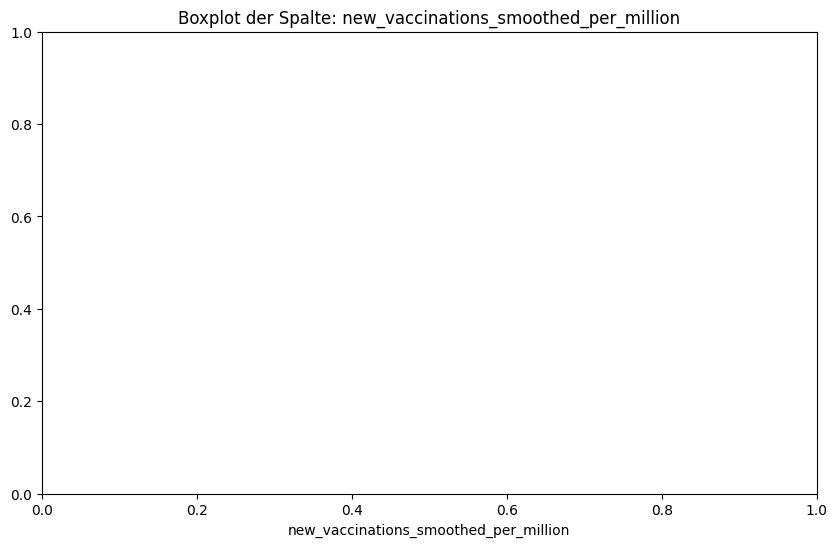

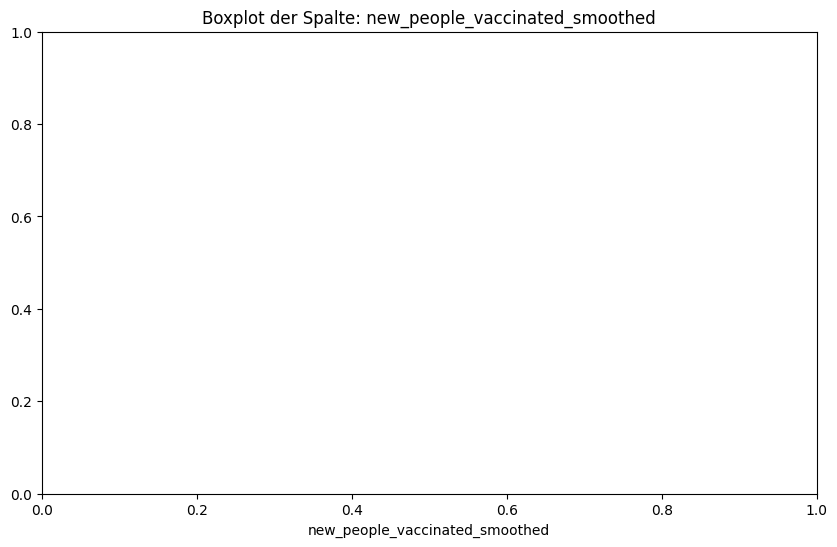

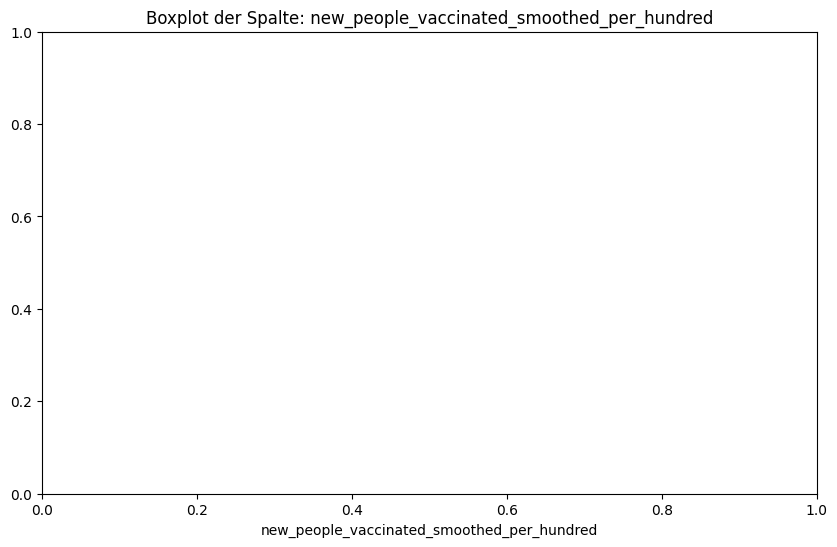

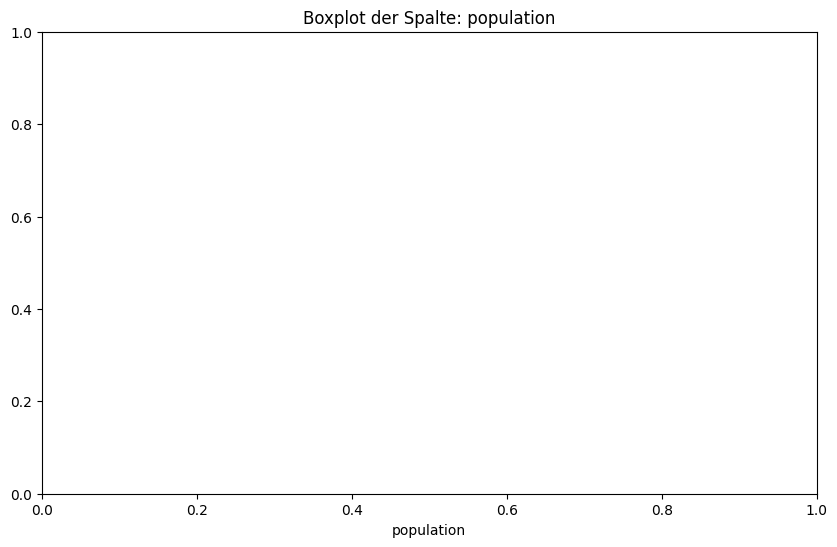

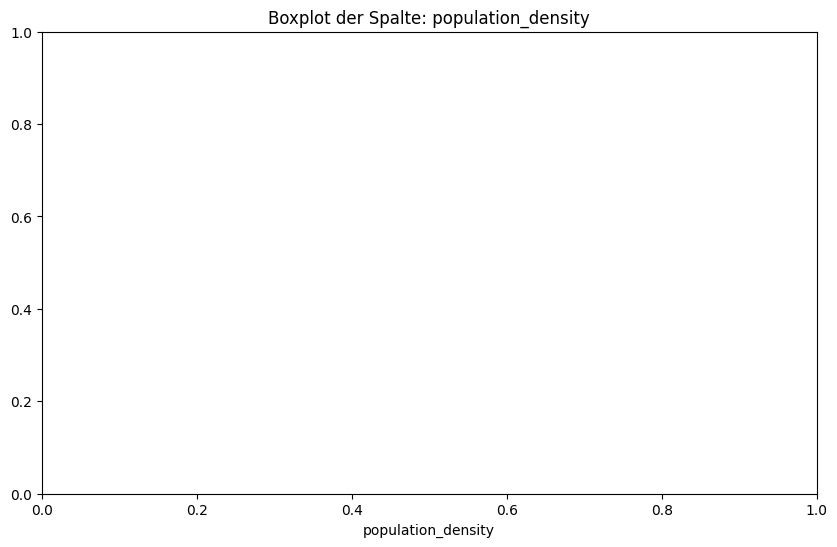

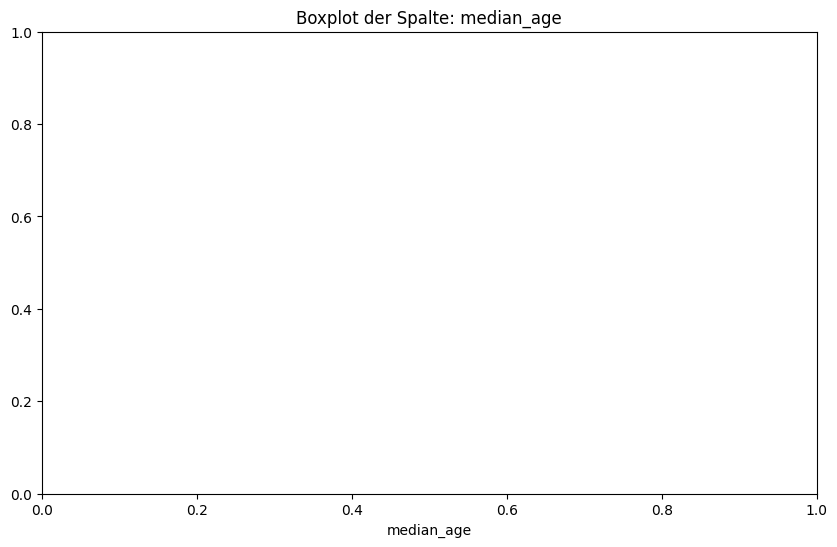

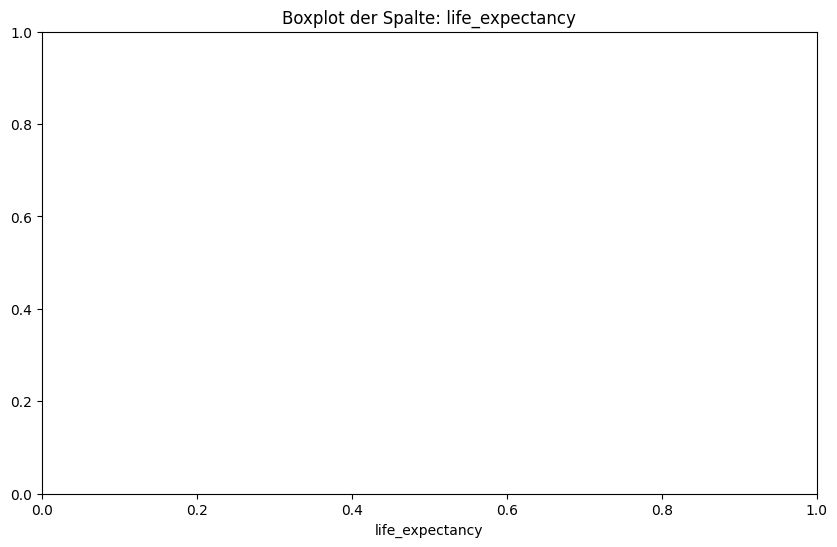

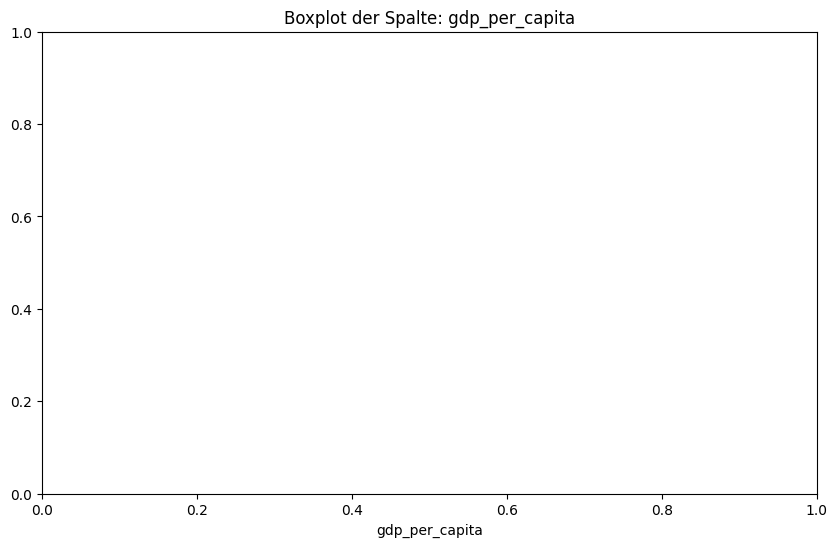

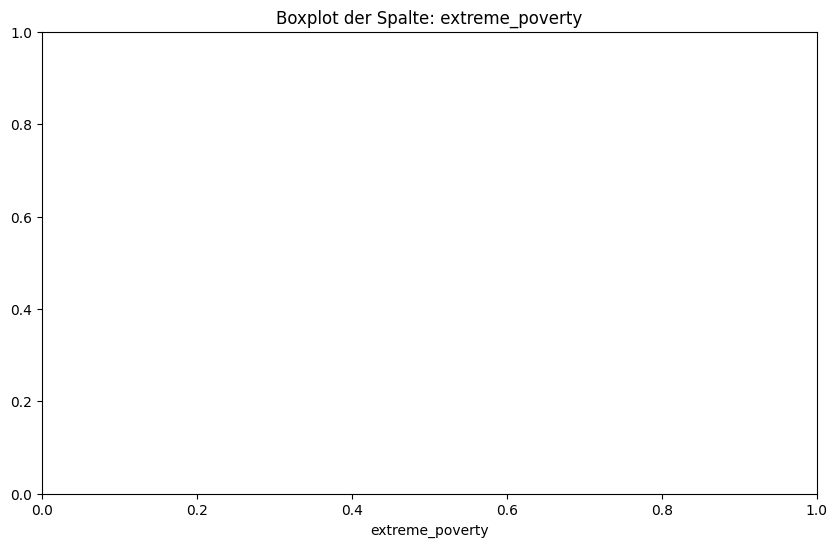

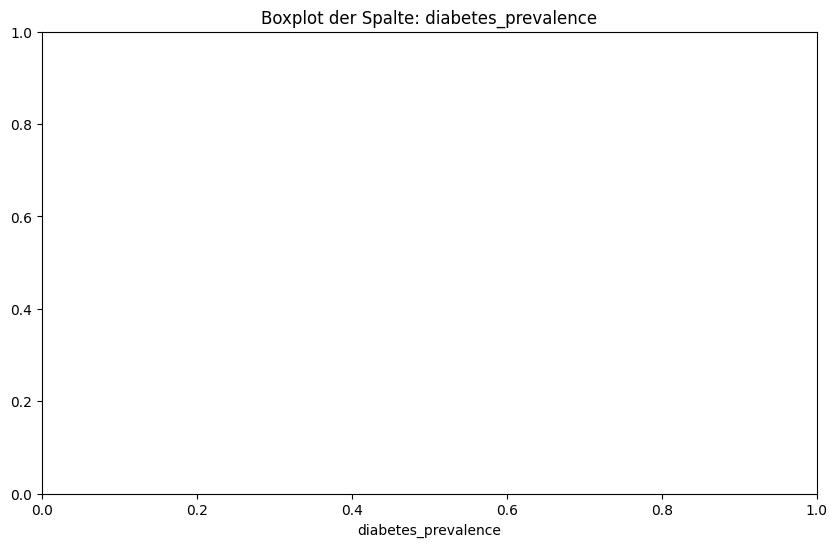

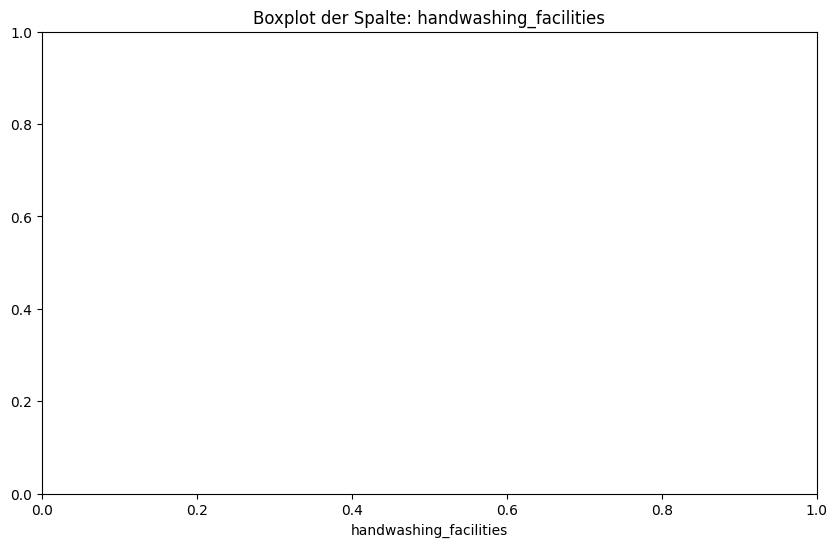

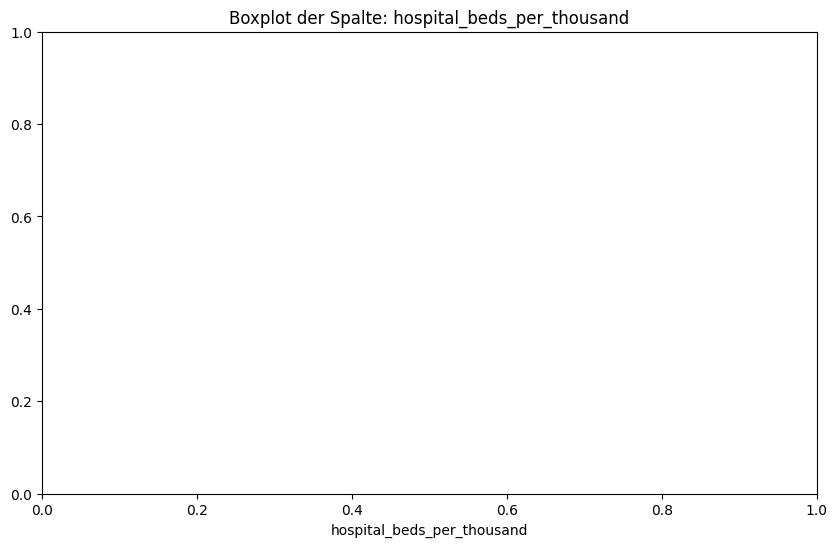

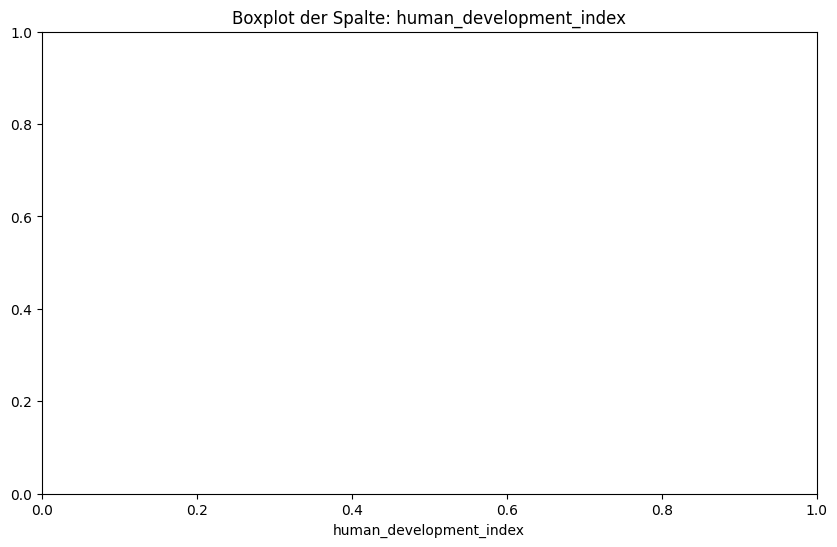

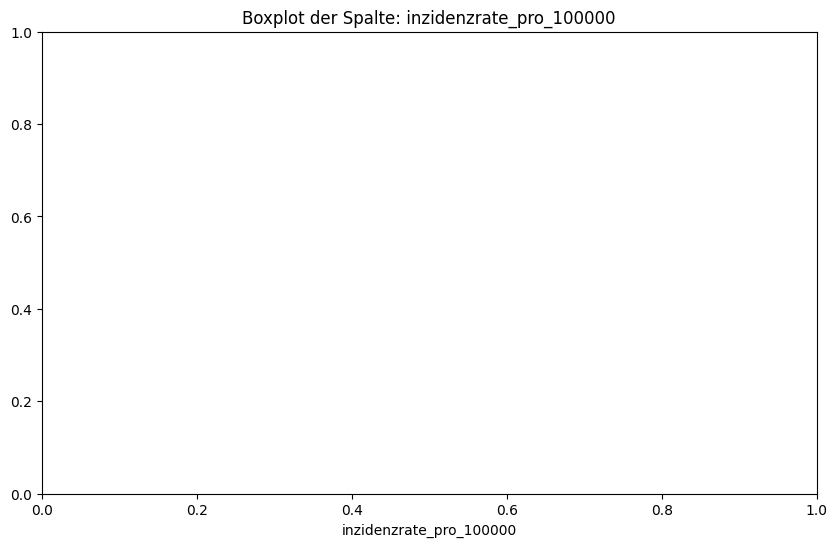

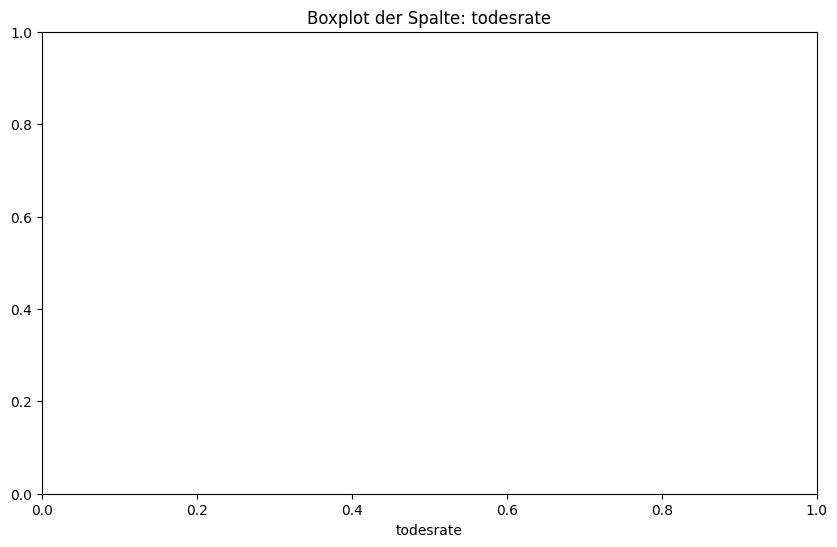

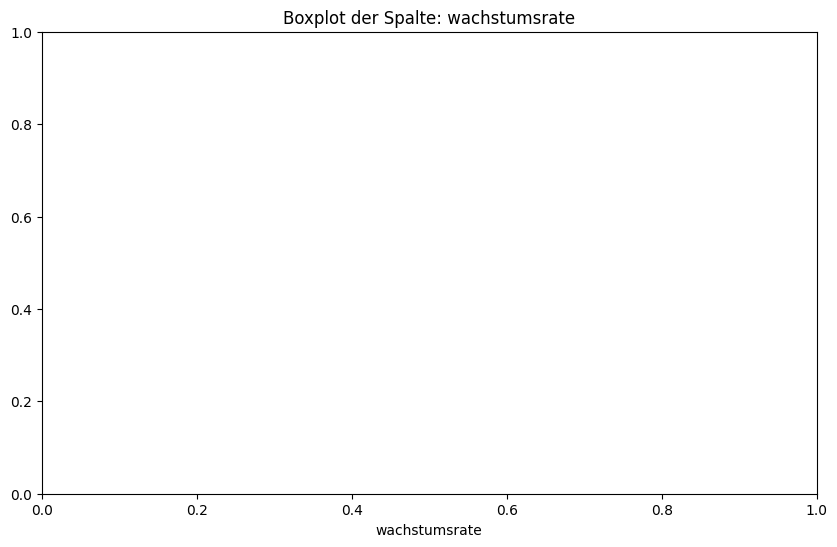

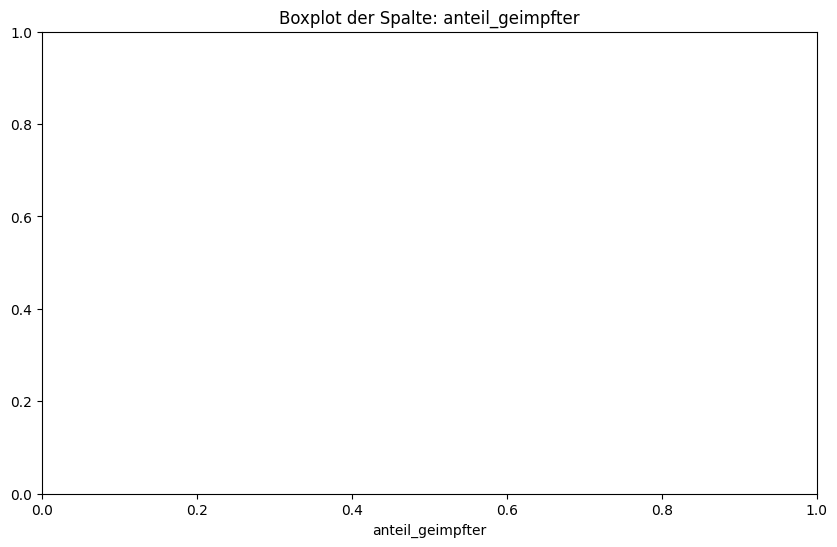

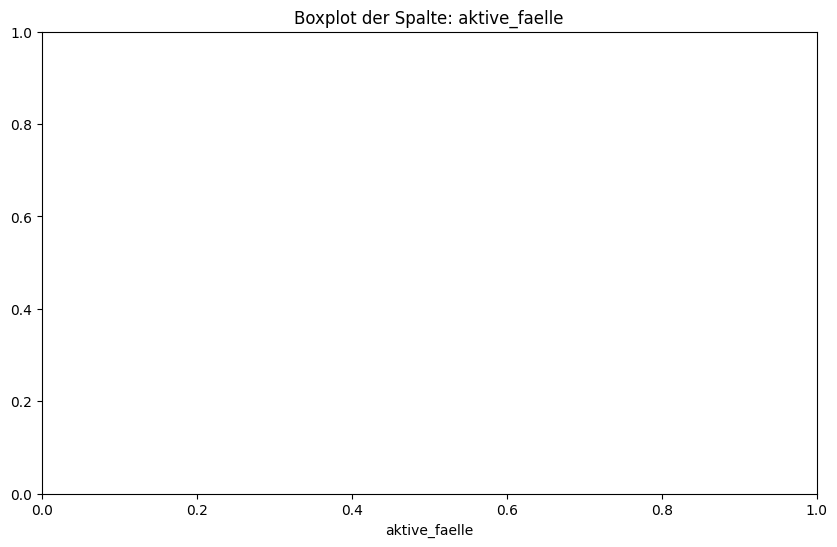

In [86]:
#Boxplots

# Boxplots für jede numerische Spalte erstellen
for column in df_no_outliers_iqr2.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_no_outliers_iqr2[column])
    plt.title(f'Boxplot der Spalte: {column}')
    plt.xlabel(column)
    plt.show()

